# SHAP Heatmamps in time


## Import libraries and data

In [44]:
import sys
sys.path.append('..')
import re

In [45]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils.load_data import load_dataset
import shap
import seaborn as sns
from scipy import stats
root_path="C://Users//noemi//Desktop//university//university//tesi/Thesis-XAI/"

In [46]:
with open(root_path+"data_shap/y_test_ordered_150.pkl", 'rb') as f:
    y_test_ascending = pickle.load(f)
with open(root_path+"data_shap/X_test_ordered_150.pkl", 'rb') as f:
    X_test = pickle.load(f)
with open(root_path+"data_shap/y_test_sess_2.pkl", 'rb') as f:
    y_test_sess_2 = pickle.load(f)


In case it's the first time we open a new file we need to change it in a pd Dataframe. use this code

    for patient in range(11):
        for i in range (1,11):
            X_test[patient] = X_test[patient].drop(["SE{}".format(i), "CCI_{}".format(i), "CCII_{}".format(i),"CCIII_{}".format(i), "CCIV_{}".format(i), "SKEW{}".format(i), "MAV{}".format(i), "WL{}".format(i), "IEMG{}".format(i), "HP_A{}".format(i)], axis=1)
    shap_extratrees_bg=[]
    for patient in range(num_pat):
        file_path = root_path+'resources/results_ordered/SHAP_no_correlated_features/shap_XRT_ordered_patient_{}_background_data.pkl'.format(patient)
        with open(file_path, 'rb') as f:
            shap_values = pickle.load(f)
        shap_extratrees_bg.append(shap_values)
        shap_list=[] 
        for i in range(len(shap_values)):
            shap_df = pd.DataFrame(data=shap_values[i], columns=X_test[i].columns.values)
            shap_list.append(shap_df)
        with open(
            root_path+'/resources/results_ordered/SHAP_no_correlated_features/shap_XRT_ordered_patient_{}_background_data.pkl'.format(patient),
            'wb') as f:
            pickle.dump(shap_list, f)

### INDEXES for separate shap values

To separate SHAP values we need to know where the label changes. so we create a list of 11 elements each of one it include the indexes of that specific matrix where the label is changing

In [49]:
indexes=[]
for patient in range(11):
    index=[0]
    for i in range(len(y_test_ascending[patient])-1):
        if y_test_ascending[patient][i]!=y_test_ascending[patient][i+1]:
            index.append(i+1)
    index.append(len(y_test_ascending[patient])) 
    indexes.append(index)

In [48]:
feature=shap_values_XRT_ordered[0][0].columns.values.copy()
channel=shap_values_XRT_ordered[0][0].columns.values.copy()
for index in range(len(feature)):
    feature[index]=''.join([i for i in feature[index] if not i.isdigit()])
    channel[index]=''.join([i for i in channel[index] if i.isdigit()])
print(feature)
print(channel)
num_features=len(feature)

['MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'ZC' 'ZC'
 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'SSC' 'SSC' 'SSC' 'SSC' 'SSC'
 'SSC' 'SSC' 'SSC' 'SSC' 'SSC' 'WL' 'WL' 'WL' 'WL' 'WL' 'WL' 'WL' 'WL'
 'WL' 'WL' 'HP_A' 'HP_A' 'HP_A' 'HP_A' 'HP_A' 'HP_A' 'HP_A' 'HP_A' 'HP_A'
 'HP_A' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M'
 'HP_M' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C'
 'HP_C' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'IEMG'
 'IEMG' 'IEMG' 'IEMG' 'IEMG' 'IEMG' 'IEMG' 'IEMG' 'IEMG' 'IEMG']
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '1' '2' '3' '4' '5' '6' '7' '8'
 '9' '10' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '1' '2' '3' '4' '5' '6'
 '7' '8' '9' '10' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '1' '2' '3' '4'
 '5' '6' '7' '8' '9' '10' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '1' '2'
 '3' '4' '5' '6' '7' '8' '9' '10' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10']


# XRT

In [47]:
#file_path = root_path+ "resources/SHAP/SHAP_EXTRA/shap_XRT_all_bk_ascending_indexed.pkl"
#with open(file_path, 'rb') as f:
#    shap_values_XRT_ordered = pickle.load(f)
num_pat=11
shap_values_XRT_ordered=[]

for patient in range(num_pat):
    file_path = root_path+'resources/results_ordered/SHAP_XRT/shap_XRT_ordered_patient_{}_background_data.pkl'.format(patient)
    with open(file_path, 'rb') as f:
        shap_values = pickle.load(f)
    shap_list=[] 
    shap_values_XRT_ordered.append(shap_values)

### DROP USELESS FEATURES SSC AND HPC


In [ ]:
print(shap_values_XRT_ordered[0][5][y_test_ascending[0]==6])

#for patient in range(11):
#    for cls in range (8):
#        for i in range(1, 11):
#            shap_values_XRT_ordered[patient][cls] = shap_values_XRT_ordered[patient][cls].drop(["SSC{}".format(i), "HP_C{}".format(i)], axis=1)#

            #shap_values_XRT_ordered[patient][cls] = shap_values_XRT_ordered[patient][cls].drop(["SSC{}".format(i), "HP_C{}".format(i)], axis=1)

### SHAP VALUES

for each patient, **8 different shap value matrices** have been computed (separately for each class), but for each class have been considered both the element of the same class and element from a different class.


In order to limit the dimension of the pltos, for each class have been selected *only* instances of that specific class, divided by round (in each round it is supposed to be 2 movements but we don't know when to separate)
then, the abs value is computed and all values are normalized for the maximum.


we obtain 8 plots of 2 different round with the importance of each feature over time


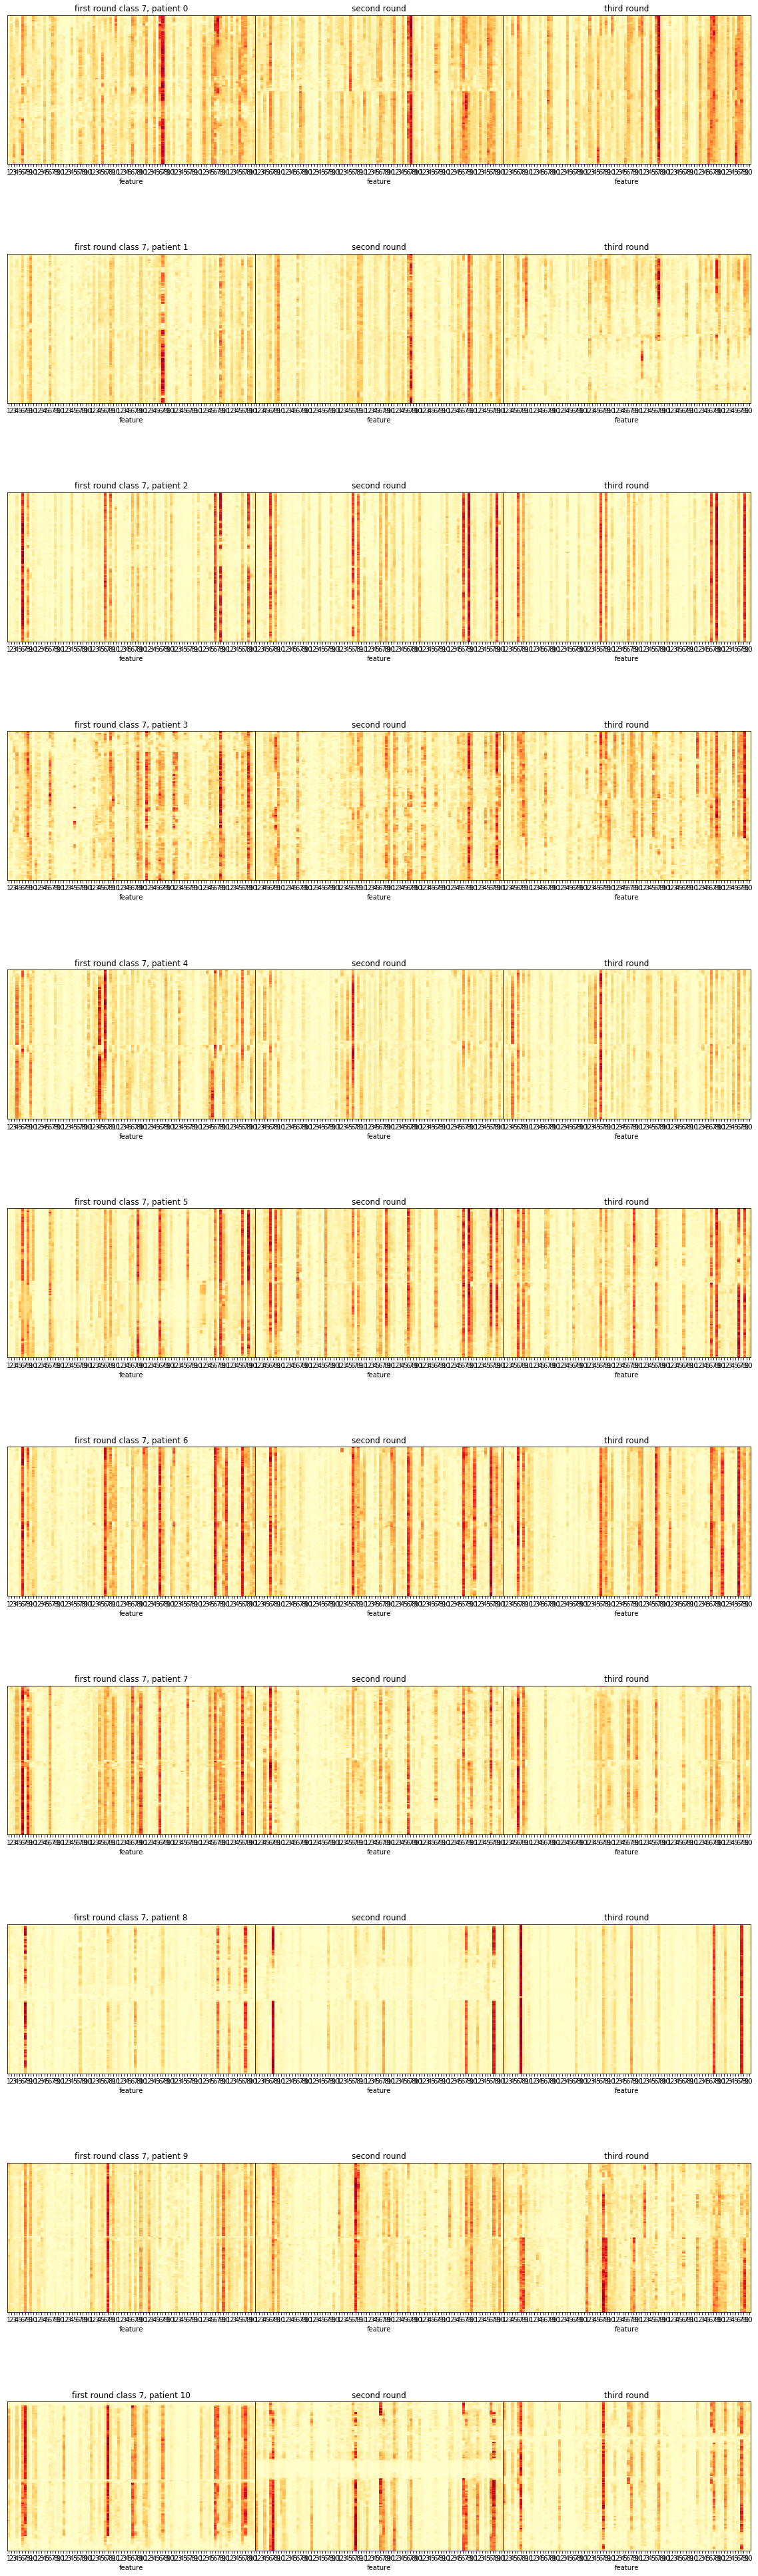

In [43]:
#patient=0
heigth=11;
width=3;
f, axes = plt.subplots(heigth, width,figsize=(20, 70))
f.subplots_adjust(hspace=0.6, wspace=0)
#i=0 #class
for i in range(8):
    for patient in range(11):

        value=(shap_values_XRT_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs())
        maximum=(value.max()).max()
        axes[patient,0].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient,0].set(xlabel='feature')
        axes[patient,0].set(title="first round class {}, patient {}".format(i, patient))
        axes[patient,0].set_xticks(list(range(0,num_features)))
        axes[patient,0].set_yticks([])
        axes[patient,0].set_xticklabels(channel)

        value=(shap_values_XRT_ordered[patient][i][indexes[patient][i+8]:indexes[patient][i+8+1]].abs())
        maximum=(value.max()).max()
        axes[patient,1].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient,1].set(xlabel='feature')
        axes[patient,1].set(title="second round")
        axes[patient,1].set_xticks(list(range(0,num_features)))
        axes[patient,1].set_yticks([])
        axes[patient,1].set_xticklabels(channel)

        value=(shap_values_XRT_ordered[patient][i][indexes[patient][i+16]:indexes[patient][i+16+1]].abs())
        maximum=(value.max()).max()
        axes[patient,2].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient,2].set(xlabel='feature')
        axes[patient,2].set(title="third round")
        axes[patient,2].set_xticks(list(range(0,num_features)))
        axes[patient,2].set_yticks([])
        axes[patient,2].set_xticklabels(channel)

    plt.savefig(root_path+"/resources/results_ordered/SHAP_matrices/class_{}_XRT_ordered.svg".format(i))

# XRT in different session

In [ ]:
shap_values_XRT_sess_1=[]
shap_values_XRT_sess_2=[]

for patient in range(6,8):
    file_path = root_path+'resources/results_ordered/SHAP_XRT/shap_XRT_ordered_patient_{}_sess_2.pkl'.format(patient)
    with open(file_path, 'rb') as f:
        shap_values = pickle.load(f)
    shap_values_XRT_sess_2.append(shap_values)

In [24]:
indexes_sess_2=[]
for patient in range(2):
    index=[0]
    for i in range(len(y_test_sess_2[patient])-1):
        if y_test_sess_2[patient][i]!=y_test_sess_2[patient][i+1]:
            index.append(i+1)
    index.append(len(y_test_sess_2[patient])) 
    indexes_sess_2.append(index)


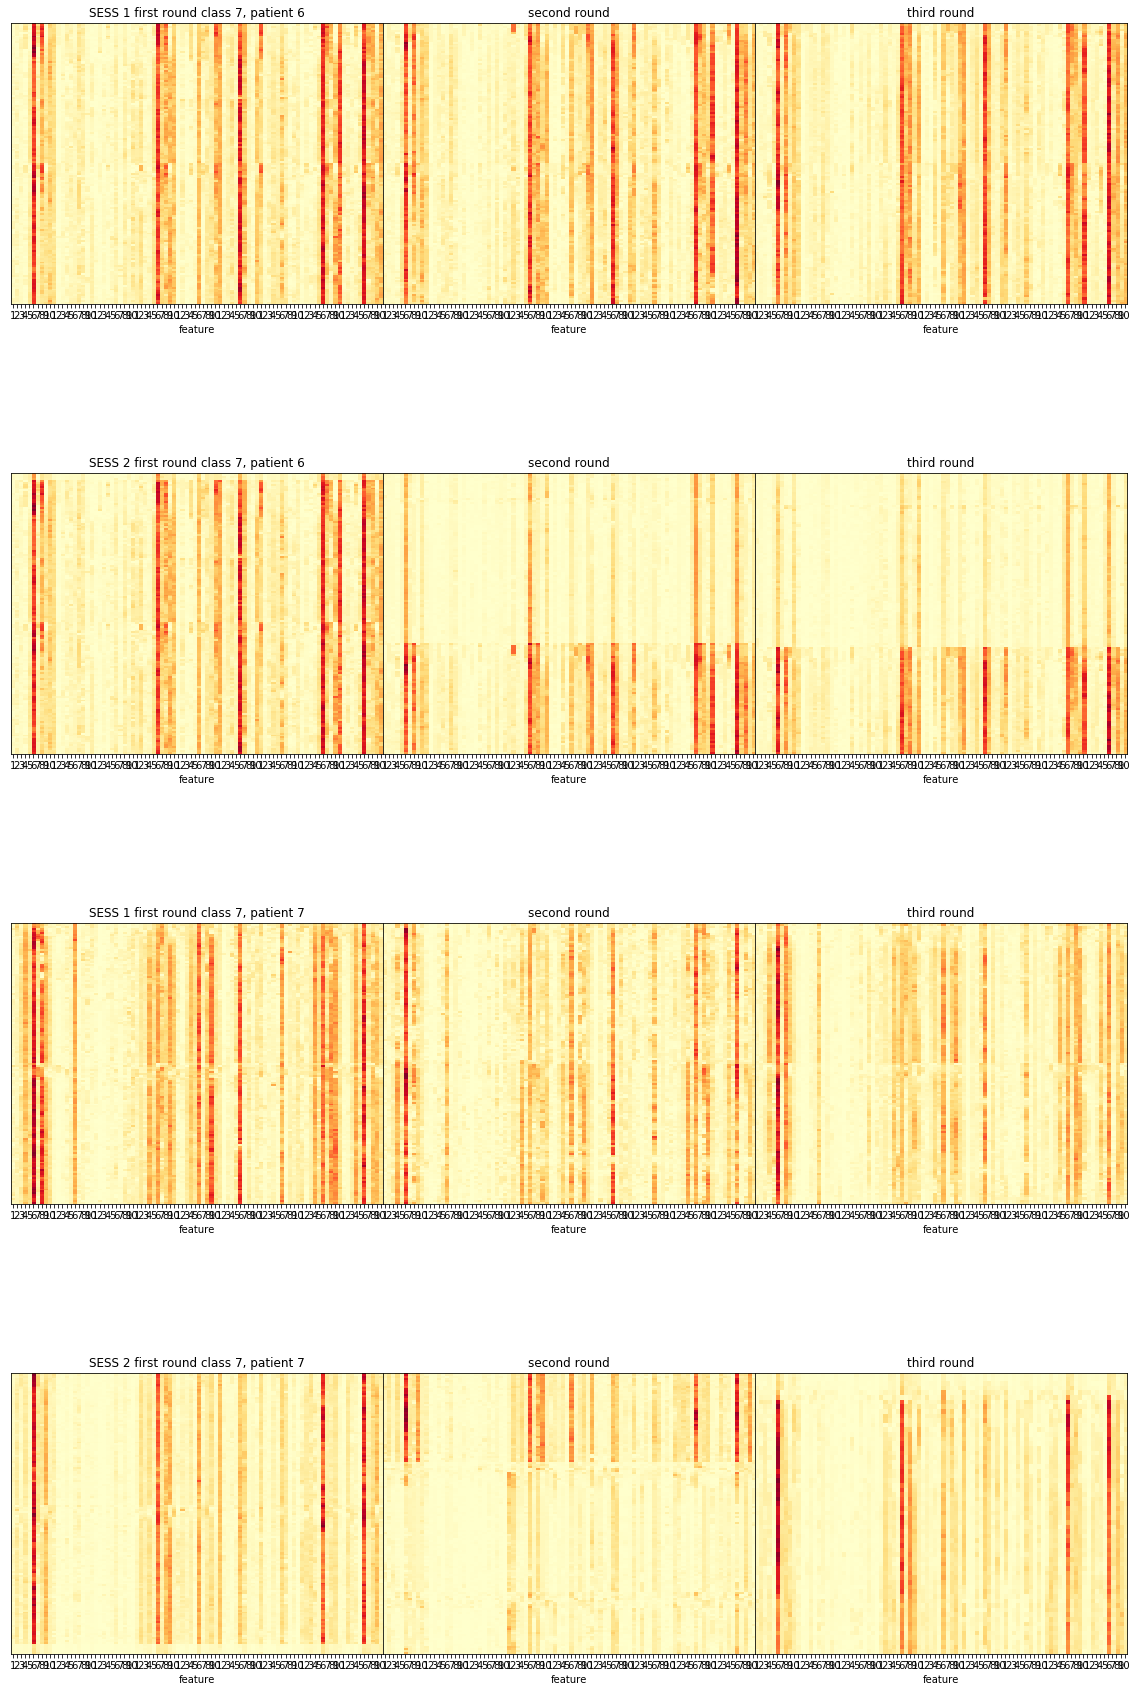

In [28]:
heigth=4;
width=3;
f, axes = plt.subplots(heigth, width,figsize=(20, 30))
f.subplots_adjust(hspace=0.6, wspace=0)
#i=0 #class

for i in range(8):
    for patient in range(2):

        value=(shap_values_XRT_ordered[patient+6][i][indexes[patient+6][i]:indexes[patient+6][i+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2,0].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2,0].set(xlabel='feature')
        axes[patient*2,0].set(title="SESS 1 first round class {}, patient {}".format(i, patient+6))
        axes[patient*2,0].set_xticks(list(range(0,num_features)))
        axes[patient*2,0].set_yticks([])
        axes[patient*2,0].set_xticklabels(channel)

        value=(shap_values_XRT_ordered[patient+6][i][indexes[patient+6][i+8]:indexes[patient+6][i+8+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2,1].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2,1].set(xlabel='feature')
        axes[patient*2,1].set(title="second round")
        axes[patient*2,1].set_xticks(list(range(0,num_features)))
        axes[patient*2,1].set_yticks([])
        axes[patient*2,1].set_xticklabels(channel)

        value=(shap_values_XRT_ordered[patient+6][i][indexes[patient+6][i+16]:indexes[patient+6][i+16+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2,2].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2,2].set(xlabel='feature')
        axes[patient*2,2].set(title="third round")
        axes[patient*2,2].set_xticks(list(range(0,num_features)))
        axes[patient*2,2].set_yticks([])
        axes[patient*2,2].set_xticklabels(channel)

        value=(shap_values_XRT_sess_2[patient][i][indexes_sess_2[patient][i]:indexes_sess_2[patient][i+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2+1,0].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2+1,0].set(xlabel='feature')
        axes[patient*2+1,0].set(title="SESS 2 first round class {}, patient {}".format(i, patient+6))
        axes[patient*2+1,0].set_xticks(list(range(0,num_features)))
        axes[patient*2+1,0].set_yticks([])
        axes[patient*2+1,0].set_xticklabels(channel)

        value=(shap_values_XRT_sess_2[patient][i][indexes_sess_2[patient][i+8]:indexes_sess_2[patient][i+8+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2+1,1].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2+1,1].set(xlabel='feature')
        axes[patient*2+1,1].set(title="second round")
        axes[patient*2+1,1].set_xticks(list(range(0,num_features)))
        axes[patient*2+1,1].set_yticks([])
        axes[patient*2+1,1].set_xticklabels(channel)

        value=(shap_values_XRT_sess_2[patient][i][indexes_sess_2[patient][i+16]:indexes_sess_2[patient][i+16+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2+1,2].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2+1,2].set(xlabel='feature')
        axes[patient*2+1,2].set(title="third round")
        axes[patient*2+1,2].set_xticks(list(range(0,num_features)))
        axes[patient*2+1,2].set_yticks([])
        axes[patient*2+1,2].set_xticklabels(channel)
    plt.savefig(root_path+"/resources/results_ordered/SHAP_matrices/class_{}_XRT_ordered_sess12.svg".format(i))

## LDA

In [187]:
#file_path = root_path+ "resources/class_{}_XRT_ordered.svg".format(i).pkl"
#with open(file_path, 'rb') as f:
#    shap_values_LDA_ordered = pickle.load(f)

shap_values_LDA_ordered=[]

for patient in range(num_pat):
    file_path = root_path+'resources/results_ordered/SHAP_LDA/shap_LDA_ordered_patient_{}_1600.pkl'.format(patient)
    with open(file_path, 'rb') as f:
        shap_values = pickle.load(f)
    shap_values_LDA_ordered.append(shap_values)

In [54]:
shap_values_LDA_ordered[patient][7].shape
shap_values_LDA_ordered[patient][0].shape[1]

90

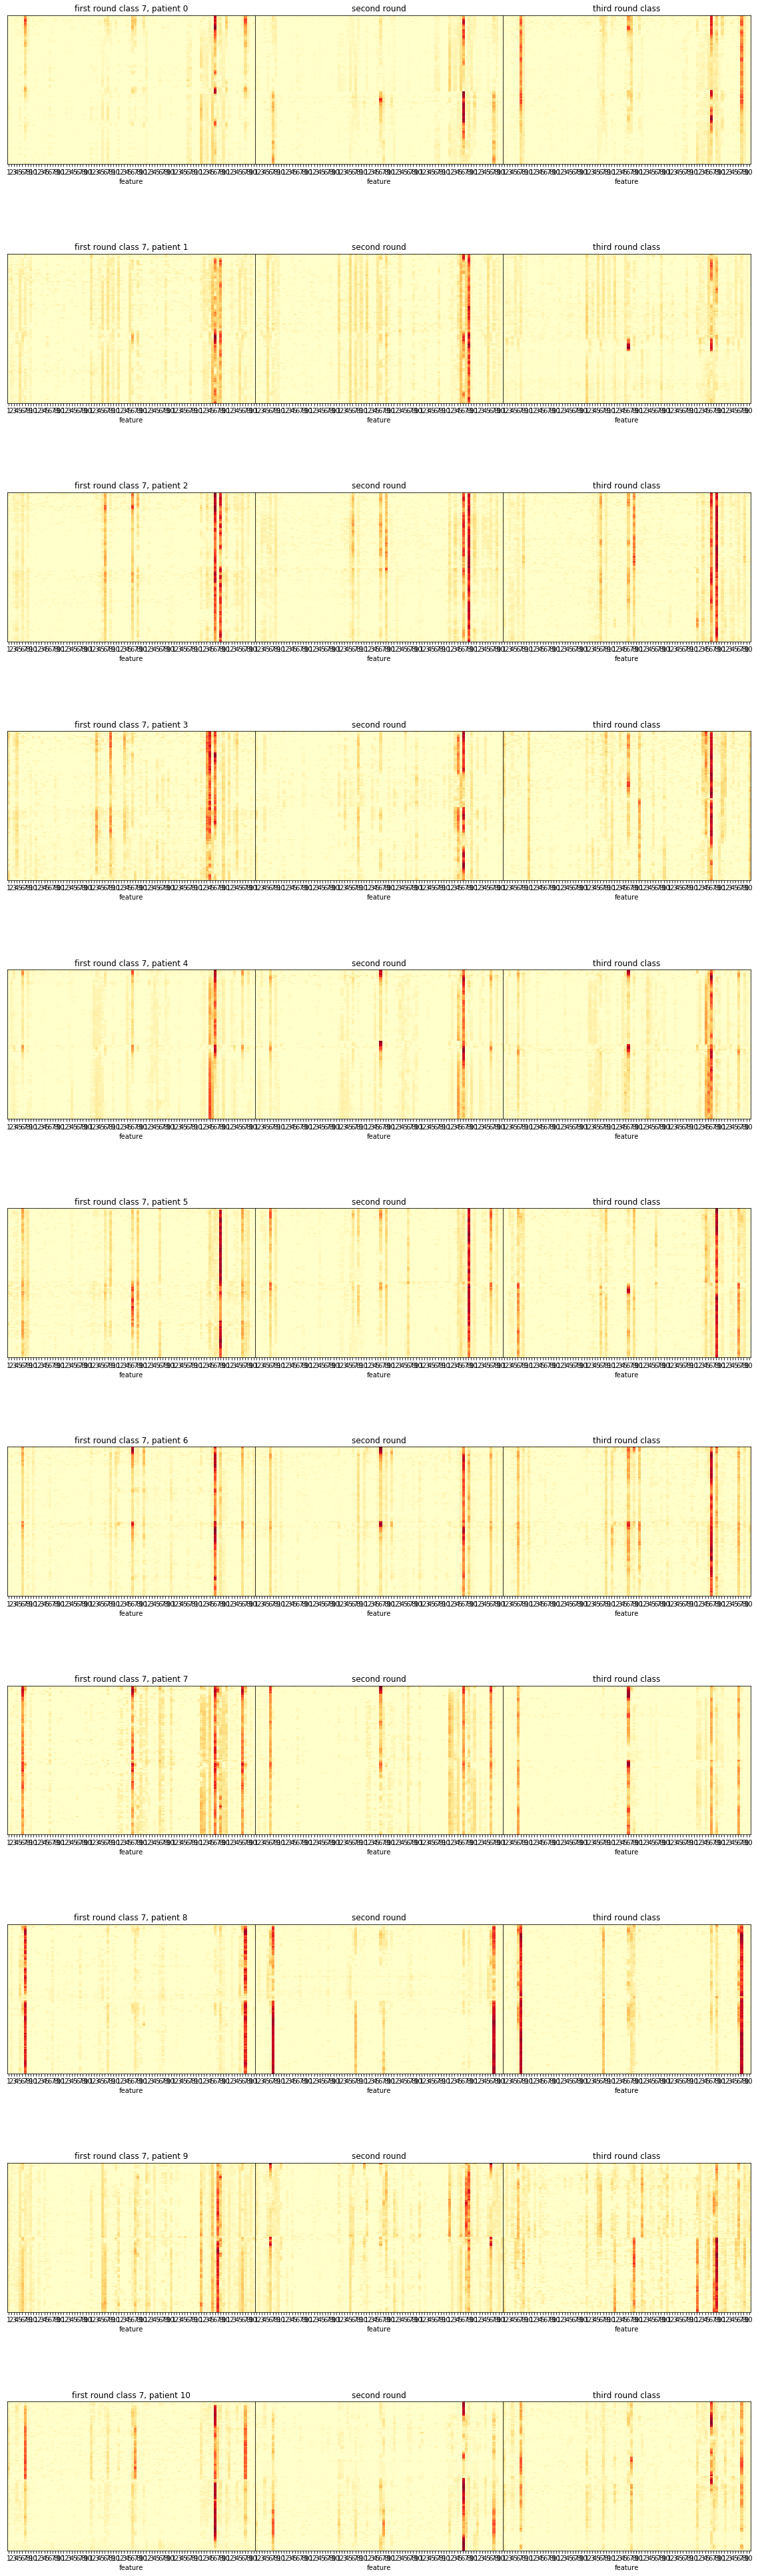

In [38]:
#patient=0
heigth=11;
width=3;
f, axes = plt.subplots(heigth, width,figsize=(20, 70))
f.subplots_adjust(hspace=0.6, wspace=0)
i=0#class
for i in range (8):
    for patient in range(11):

        value=(shap_values_LDA_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs())
        maximum=(value.max()).max()
        
        axes[patient,0].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient,0].set(xlabel='feature')
        axes[patient,0].set(title="first round class {}, patient {}".format(i, patient))
        axes[patient,0].set_xticks(list(range(0,90)))
        axes[patient,0].set_yticks([])
        axes[patient,0].set_xticklabels(channel)

        value=(shap_values_LDA_ordered[patient][i][indexes[patient][i+8]:indexes[patient][i+8+1]].abs())
        maximum=(value.max()).max()
        axes[patient,1].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient,1].set(xlabel='feature')
        axes[patient,1].set(title="second round")
        axes[patient,1].set_xticks(list(range(0,90)))
        axes[patient,1].set_yticks([])
        axes[patient,1].set_xticklabels(channel)

        value=(shap_values_LDA_ordered[patient][i][indexes[patient][i+16]:indexes[patient][i+16+1]].abs())
        maximum=(value.max()).max()
        axes[patient,2].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient,2].set(xlabel='feature')
        axes[patient,2].set(title="third round class")
        axes[patient,2].set_xticks(list(range(0,90)))
        axes[patient,2].set_yticks([])
        axes[patient,2].set_xticklabels(channel)

    plt.savefig(root_path+"resources/results_ordered/SHAP_matrices/class_{}_LDA_ordered.svg".format(i))


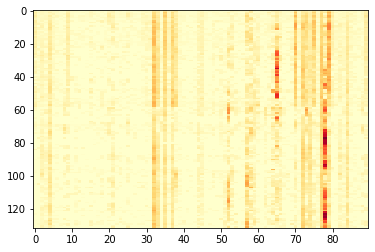

F_onewayResult(statistic=1.3139977212467484, pvalue=0.00965584432063877)

In [141]:
patient=2
i=6
value=(shap_values_LDA_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs())
from scipy.stats import friedmanchisquare
list_value=[]
plt.imshow(value, cmap='YlOrRd', aspect='auto', alpha=1)
plt.show()
value.shape


    

In [131]:
avg=-(np.mean(value, axis=0)[70:80])
print(avg)
print(avg.argsort(axis=0))


RMS1    -0.034719
RMS2    -0.008695
RMS3    -0.054713
RMS4    -0.019853
RMS5    -0.016240
RMS6    -0.359668
RMS7    -0.017206
RMS8    -0.326347
RMS9    -0.016584
RMS10   -0.062600
dtype: float64
RMS1     5
RMS2     7
RMS3     9
RMS4     2
RMS5     0
RMS6     3
RMS7     6
RMS8     8
RMS9     4
RMS10    1
dtype: int64


In [116]:
q_95=np.quantile(value, 0.95, axis=0)[70:80]
q_05=np.quantile(value, 0.05, axis=0)[70:80]
pd.Data
tmp=((avg-q_95).abs())/avg
print(tmp)
print(q_05)


RMS1     1.135693
RMS2     2.234808
RMS3     0.979912
RMS4     1.520268
RMS5     2.181604
RMS6     0.434831
RMS7     1.252769
RMS8     0.404540
RMS9     2.586734
RMS10    1.069598
dtype: float64
[0.         0.         0.00827596 0.         0.         0.23800763
 0.         0.10724187 0.         0.        ]


In [106]:
list_value=[]
from random import sample
for instance in range(value.shape[0]):
    list_value.append(pd.array(value.iloc[instance,:]))
    
full_stats=[]
for i, el in enumerate(list_value):
    j=i+1
    while j < len(list_value):
        full_stats.append((stats.ttest_rel(list_value[i], list_value[j])[1]))
        j=j+1
np.mean(full_stats)

0.17169091256517535

In [105]:
list_value=[]
from random import sample
for instance in range(value.shape[0]):
    list_value.append(pd.array(value.iloc[instance,:]))
    if instance >2:
        print(friedmanchisquare(*list_value))
#stats.ttest_rel(list_value[1], list_value[3])

FriedmanchisquareResult(statistic=9.225239616613528, pvalue=0.02644136083877615)
FriedmanchisquareResult(statistic=8.905132192846104, pvalue=0.06351496349966937)
FriedmanchisquareResult(statistic=10.927167113494235, pvalue=0.05284332155758309)
FriedmanchisquareResult(statistic=9.866411168902374, pvalue=0.13039163876338736)
FriedmanchisquareResult(statistic=9.85734818541128, pvalue=0.19680258770181305)
FriedmanchisquareResult(statistic=11.278542208999518, pvalue=0.18641055811699803)
FriedmanchisquareResult(statistic=20.869971593512524, pvalue=0.013240446323138116)
FriedmanchisquareResult(statistic=26.120735607675947, pvalue=0.003581152094645136)
FriedmanchisquareResult(statistic=25.451135140675202, pvalue=0.007826170550671935)
FriedmanchisquareResult(statistic=28.58837656099923, pvalue=0.004533451554816373)
FriedmanchisquareResult(statistic=36.16788807461711, pvalue=0.000558762900431161)
FriedmanchisquareResult(statistic=36.20955816050522, pvalue=0.0009706370258306509)
Friedmanchisquare

FriedmanchisquareResult(statistic=1207.4816884676025, pvalue=8.584310887998721e-188)
FriedmanchisquareResult(statistic=1210.8529428703544, pvalue=6.298782233141146e-188)
FriedmanchisquareResult(statistic=1215.295974671488, pvalue=2.8229315985789863e-188)
FriedmanchisquareResult(statistic=1216.1661980690526, pvalue=6.472024684829045e-188)
FriedmanchisquareResult(statistic=1219.5228568246057, pvalue=4.7439428443486916e-188)
FriedmanchisquareResult(statistic=1226.1474988982545, pvalue=7.796469384241737e-189)
FriedmanchisquareResult(statistic=1227.6930996112321, pvalue=1.3015012142090462e-188)
FriedmanchisquareResult(statistic=1230.596040084422, pvalue=1.1656897095820072e-188)
FriedmanchisquareResult(statistic=1233.2907631205594, pvalue=1.1451100191335483e-188)
FriedmanchisquareResult(statistic=1247.4875642563284, pvalue=5.931919046708493e-191)
FriedmanchisquareResult(statistic=1275.798798873172, pvalue=4.900187481632314e-196)
FriedmanchisquareResult(statistic=1289.498095961698, pvalue=3.1

In [151]:
print("Statistical test in time the same patient")
p_val_tot=[]
count=0
for patient in range(11):
    for i in range(8):
        p_val=[]
        value_r1=(shap_values_LDA_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs())

        list_value=[]
        for instance in range(value_r1.shape[0]):
            list_value.append(pd.array(value_r1.iloc[instance,:]))
        if stats.f_oneway(*list_value)[1]<0.05:
            #print(stats.f_oneway(*list_value))
            count=count+1
        p_val.append(stats.f_oneway(*list_value)[1])        
        
        value_r2=(shap_values_LDA_ordered[patient][i][indexes[patient][i+8]:indexes[patient][i+8+1]].abs())

        list_value=[]
        for instance in range(value_r2.shape[0]):
            list_value.append(pd.array(value_r2.iloc[instance,:]))
        if stats.f_oneway(*list_value)[1]<0.05:
            #print(stats.f_oneway(*list_value))
            count=count+1
        p_val.append(stats.f_oneway(*list_value)[1])        
        value_r3=(shap_values_LDA_ordered[patient][i][indexes[patient][i+16]:indexes[patient][i+16+1]].abs())
        list_value=[]
        for instance in range(value_r3.shape[0]):
            list_value.append(pd.array(value_r3.iloc[instance,:]))
        if stats.f_oneway(*list_value)[1]<0.05:
            #print(stats.f_oneway(*list_value))
            count=count+1
        p_val.append(stats.f_oneway(*list_value)[1])
        
        print("p value mean PATIENT {},  class {}: {}  var {}, dev {}".format(patient, i, np.mean(p_val), np.var(p_val), np.std(p_val)))
        p_val_tot.append(np.mean(p_val))
print(np.mean(p_val_tot))
print(count)


Statistical test in time the same patient
p value mean PATIENT 0,  class 0: 0.66666073917966  var 0.22221827063448799, dev 0.47140032948067395
p value mean PATIENT 0,  class 1: 0.6007099185905178  var 0.1842485994247327, dev 0.429241889177574
p value mean PATIENT 0,  class 2: 0.7503074031794666  var 0.12469278581396237, dev 0.35311865684775473
p value mean PATIENT 0,  class 3: 0.6673655473403919  var 0.22129135819231407, dev 0.470416154263769
p value mean PATIENT 0,  class 4: 0.9972524956537177  var 1.509756026567997e-05, dev 0.003885557909191416
p value mean PATIENT 0,  class 5: 0.6666666666666666  var 0.22222222222222218, dev 0.4714045207910316
p value mean PATIENT 0,  class 6: 6.542371095008878e-33  var 8.560523908961533e-65, dev 9.252309932639272e-33
p value mean PATIENT 0,  class 7: 0.8338809951138874  var 0.02747297141737379, dev 0.16574972524071885
p value mean PATIENT 1,  class 0: 0.15651019117194498  var 0.0483709164777825, dev 0.21993389115318834
p value mean PATIENT 1,  clas

p value mean PATIENT 10,  class 0: 0.08582673453062913  var 0.01473245581691661, dev 0.1213773282656881
p value mean PATIENT 10,  class 1: 0.3333334247187365  var 0.2222221612986367, dev 0.4714044561718066
p value mean PATIENT 10,  class 2: 0.6664645075650838  var 0.22207052585637974, dev 0.47124359502955554
p value mean PATIENT 10,  class 3: 0.3322481559579325  var 0.22076523485827146, dev 0.46985661095516307
p value mean PATIENT 10,  class 4: 0.3333333318334429  var 0.22222222022192276, dev 0.4714045186693937
p value mean PATIENT 10,  class 5: 1.6523805877945594e-08  var 5.460363201874715e-16, dev 2.3367420058437592e-08
p value mean PATIENT 10,  class 6: 1.6184944549042972e-32  var 5.239048601111916e-64, dev 2.2888968087513066e-32
p value mean PATIENT 10,  class 7: 8.458417954464779e-35  var 1.4308966848062422e-68, dev 1.1962009383068725e-34
0.45070960791096953
133


In [146]:
print("Statistical test comparing Round of the same patient averaged over time")
p_val_tot=[]
for patient in range(11):
    for i in range(8):
        p_val=[]
        value_r1=(shap_values_LDA_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs())

        value_r2=(shap_values_LDA_ordered[patient][i][indexes[patient][i+8]:indexes[patient][i+8+1]].abs())

        value_r3=(shap_values_LDA_ordered[patient][i][indexes[patient][i+16]:indexes[patient][i+16+1]].abs())
        min_val=min(len(value_r1), len(value_r2), len(value_r3))
        for feature in range(value_r1.shape[1]):
            p_val12=stats.ttest_rel(value_r1.iloc[:min_val,feature], value_r2.iloc[:min_val,feature])

            if np.isnan(p_val12[1]):
                p_val_tmp=1
                p_val.append(p_val_tmp)
            else:
                p_val.append(p_val12[1])
            p_val23=stats.ttest_rel(value_r2.iloc[:min_val,feature], value_r3.iloc[:min_val,feature])

            if np.isnan(p_val23[1]):
                p_val_tmp=1
                p_val.append(p_val_tmp)
            else:
                p_val.append(p_val23[1])
            p_val13=stats.ttest_rel(value_r1.iloc[:min_val,feature], value_r3.iloc[:min_val,feature])

            if np.isnan(p_val13[1]):
                p_val_tmp=1
                p_val.append(p_val_tmp)
            else:
                p_val.append(p_val13[1])
    
        print("p value mean PATIENT {},  class {}: {}  var {}, dev {}".format(patient, i, np.mean(p_val), np.var(p_val), np.std(p_val)))
        p_val_tot.append(np.mean(p_val))
print(np.mean(p_val_tot))

Statistical test comparing Round of the same patient averaged over time
Ttest_relResult(statistic=-22.90250424820934, pvalue=2.7629742851254735e-47)
Ttest_relResult(statistic=9.813259834592712, pvalue=2.5466383859763208e-17)
Ttest_relResult(statistic=-9.795683771518537, pvalue=2.81372568641902e-17)
Ttest_relResult(statistic=6.773849369766595, pvalue=4.008311333020988e-10)
Ttest_relResult(statistic=-5.848036711535439, pvalue=3.8556366613811804e-08)
Ttest_relResult(statistic=-0.6367247944638138, pvalue=0.5254323885752549)
Ttest_relResult(statistic=-0.47014535769828414, pvalue=0.6390450282468139)
Ttest_relResult(statistic=0.19882842202489404, pvalue=0.8427099919242953)
Ttest_relResult(statistic=-0.29023222778067614, pvalue=0.7721046138985042)
Ttest_relResult(statistic=-3.561737061934067, pvalue=0.0005168547242667635)
Ttest_relResult(statistic=0.3477621634060522, pvalue=0.7285856020517274)
Ttest_relResult(statistic=-3.5774175862480604, pvalue=0.0004894735680582806)
Ttest_relResult(statisti

Ttest_relResult(statistic=0.244205870681215, pvalue=0.8074593607212552)
Ttest_relResult(statistic=-0.5534889385861572, pvalue=0.5808866945869555)
Ttest_relResult(statistic=0.11614631529185335, pvalue=0.907717199187195)
Ttest_relResult(statistic=0.8427720735477314, pvalue=0.40091580692236706)
Ttest_relResult(statistic=1.1559680403065167, pvalue=0.24983065912435395)
Ttest_relResult(statistic=0.7628922511729015, pvalue=0.44692048098077275)
Ttest_relResult(statistic=-0.5107329104776367, pvalue=0.6104110137439325)
Ttest_relResult(statistic=0.1163337551314702, pvalue=0.9075689461192757)
Ttest_relResult(statistic=-2.3471473184047573, pvalue=0.02044006877482657)
Ttest_relResult(statistic=-0.9341114994383245, pvalue=0.3519915889504037)
Ttest_relResult(statistic=-3.754478096144848, pvalue=0.0002616784661057374)
Ttest_relResult(statistic=-1.3360398036615433, pvalue=0.183888386552962)
Ttest_relResult(statistic=1.1151347703476358, pvalue=0.26686580343221933)
Ttest_relResult(statistic=-0.12715637956

Ttest_relResult(statistic=-2.361490618941442, pvalue=0.019698483832411202)
Ttest_relResult(statistic=2.385233472820404, pvalue=0.018523072056556657)
Ttest_relResult(statistic=-0.07523395532095903, pvalue=0.9401451150879483)
Ttest_relResult(statistic=-5.703631213038098, pvalue=7.619991509027627e-08)
Ttest_relResult(statistic=-4.649421297478623, pvalue=8.119703267740096e-06)
Ttest_relResult(statistic=-8.135058096443741, pvalue=2.981919338153741e-13)
Ttest_relResult(statistic=-0.44723787181684643, pvalue=0.6554533565548397)
Ttest_relResult(statistic=-0.8534678039978685, pvalue=0.39498192238788554)
Ttest_relResult(statistic=-1.4621583298572252, pvalue=0.14612974157217748)
Ttest_relResult(statistic=8.995722657973165, pvalue=2.5575455339708236e-15)
Ttest_relResult(statistic=1.552234982265378, pvalue=0.12305595672330716)
Ttest_relResult(statistic=10.65795657271752, pvalue=2.067184401628564e-19)
Ttest_relResult(statistic=1.3639613563497275, pvalue=0.17495488538422085)
Ttest_relResult(statistic

Ttest_relResult(statistic=2.855377134878027, pvalue=0.005028606622512651)
Ttest_relResult(statistic=1.6907334274675114, pvalue=0.09336002660986273)
Ttest_relResult(statistic=-1.7298005489789043, pvalue=0.0861146560382835)
Ttest_relResult(statistic=0.2126363025162133, pvalue=0.8319542784312318)
Ttest_relResult(statistic=-0.6795910207233463, pvalue=0.49801005801751586)
Ttest_relResult(statistic=-2.693627075129796, pvalue=0.008030755406545638)
Ttest_relResult(statistic=-3.110211509202748, pvalue=0.0023124260427730367)
Ttest_relResult(statistic=-0.931080356799948, pvalue=0.353592540513068)
Ttest_relResult(statistic=-1.4749839993873388, pvalue=0.14271123996856436)
Ttest_relResult(statistic=-1.9704482077645118, pvalue=0.05097972274577446)
Ttest_relResult(statistic=3.6099324645489577, pvalue=0.00044048132731931407)
Ttest_relResult(statistic=-3.756927128867955, pvalue=0.0002617623729708957)
Ttest_relResult(statistic=-0.5699199270966333, pvalue=0.5697467876261548)
Ttest_relResult(statistic=-0.6

Ttest_relResult(statistic=-13.4551371542873, pvalue=3.919859671220291e-26)
Ttest_relResult(statistic=9.610520017886813, pvalue=9.73641275134401e-17)
Ttest_relResult(statistic=-1.7041814869150835, pvalue=0.09081201562938523)
Ttest_relResult(statistic=3.1883235704312303, pvalue=0.001805285139628449)
Ttest_relResult(statistic=-4.651393910714284, pvalue=8.209403924997984e-06)
Ttest_relResult(statistic=-1.9197951990551088, pvalue=0.057144279535234474)
Ttest_relResult(statistic=1.5507922523616309, pvalue=0.12345964633830347)
Ttest_relResult(statistic=-2.4446675174039707, pvalue=0.015881409311235568)
Ttest_relResult(statistic=-1.0380173094112464, pvalue=0.30124989914891914)
Ttest_relResult(statistic=2.260983023867424, pvalue=0.02547529197930897)
Ttest_relResult(statistic=-3.73750042696936, pvalue=0.0002806316484755777)
Ttest_relResult(statistic=-2.110933464046922, pvalue=0.03675425301700116)
Ttest_relResult(statistic=2.170227764618905, pvalue=0.03186513532609847)
Ttest_relResult(statistic=-3.

Ttest_relResult(statistic=-5.560872484352215, pvalue=1.4806763463103525e-07)
Ttest_relResult(statistic=3.2639719225981323, pvalue=0.0014066345059775712)
Ttest_relResult(statistic=-2.312842973208294, pvalue=0.02231441891546998)
Ttest_relResult(statistic=0.03240194669943019, pvalue=0.9742015900037143)
Ttest_relResult(statistic=0.42771333430014136, pvalue=0.6695730009074965)
Ttest_relResult(statistic=0.45250994603933736, pvalue=0.6516617272024454)
Ttest_relResult(statistic=6.931997201258154, pvalue=1.7821543340083384e-10)
Ttest_relResult(statistic=-2.76087722296571, pvalue=0.006605492725318521)
Ttest_relResult(statistic=3.738338922132701, pvalue=0.0002772918647923612)
Ttest_relResult(statistic=1.5753241333510648, pvalue=0.11763095928365191)
Ttest_relResult(statistic=1.0331642019776939, pvalue=0.3034600985603851)
Ttest_relResult(statistic=2.410407446389575, pvalue=0.017345037452812684)
Ttest_relResult(statistic=2.045764585972797, pvalue=0.04281209668417303)
Ttest_relResult(statistic=-2.575

Ttest_relResult(statistic=-0.9582656170866236, pvalue=0.3397213704183959)
Ttest_relResult(statistic=-1.3765678077266357, pvalue=0.17103048206352128)
Ttest_relResult(statistic=-1.6696190802136086, pvalue=0.09741969974056305)
Ttest_relResult(statistic=-2.7208271010952387, pvalue=0.007410957727970173)
Ttest_relResult(statistic=0.999077562370204, pvalue=0.3196274962871887)
Ttest_relResult(statistic=-1.0726224156894366, pvalue=0.2854430491569297)
Ttest_relResult(statistic=-0.04520934986444402, pvalue=0.9640103512043031)
Ttest_relResult(statistic=0.05380874997329284, pvalue=0.9571707804859294)
Ttest_relResult(statistic=-8.961074984297086, pvalue=3.1042749466499666e-15)
Ttest_relResult(statistic=-8.550796545373249, pvalue=3.038820150806825e-14)
Ttest_relResult(statistic=0.05491327654588517, pvalue=0.9562925107915461)
Ttest_relResult(statistic=-13.659748117010466, pvalue=7.895144030796013e-27)
Ttest_relResult(statistic=-12.33495087736921, pvalue=1.421664817929791e-23)
Ttest_relResult(statistic

Ttest_relResult(statistic=0.03429966660990235, pvalue=0.9726912070917584)
Ttest_relResult(statistic=-2.3266907488577036, pvalue=0.021540321407381727)
Ttest_relResult(statistic=-2.4266038242362837, pvalue=0.016622714924419503)
Ttest_relResult(statistic=-2.3960694648970744, pvalue=0.018007575636480238)
Ttest_relResult(statistic=-3.433770782581193, pvalue=0.000800814712897029)
Ttest_relResult(statistic=-5.200581559666912, pvalue=7.585994006591854e-07)
Ttest_relResult(statistic=-1.5603647580209414, pvalue=0.12112367574631658)
Ttest_relResult(statistic=-1.5285467956850733, pvalue=0.12882521214719742)
Ttest_relResult(statistic=-3.0799237829711847, pvalue=0.002530833745541998)
Ttest_relResult(statistic=-0.7663110969884281, pvalue=0.44489123321446644)
Ttest_relResult(statistic=-4.049858547783519, pvalue=8.790009950625893e-05)
Ttest_relResult(statistic=-4.94647070173752, pvalue=2.309220052812717e-06)
Ttest_relResult(statistic=0.3762011096449518, pvalue=0.7073853909719856)
Ttest_relResult(statis

Ttest_relResult(statistic=-0.34475555849949835, pvalue=0.7308621952231769)
Ttest_relResult(statistic=-4.181977621455888, pvalue=5.4194090278938496e-05)
Ttest_relResult(statistic=1.962139584168967, pvalue=0.05198614046545)
Ttest_relResult(statistic=-1.6044324344362928, pvalue=0.11116275937159087)
Ttest_relResult(statistic=2.0119534546941926, pvalue=0.04639205378483156)
Ttest_relResult(statistic=-6.011314710130144, pvalue=1.9069884409352294e-08)
Ttest_relResult(statistic=-4.303082745946088, pvalue=3.383493511754211e-05)
Ttest_relResult(statistic=-1.5400997520196047, pvalue=0.1260840901900104)
Ttest_relResult(statistic=0.8898333145071099, pvalue=0.3752785095239569)
Ttest_relResult(statistic=-1.8131320867892915, pvalue=0.07223021273212028)
Ttest_relResult(statistic=-4.885322348962252, pvalue=3.1207380382989003e-06)
Ttest_relResult(statistic=0.37619563476705487, pvalue=0.7074143412502022)
Ttest_relResult(statistic=-1.9329274059080528, pvalue=0.05552495690070113)
Ttest_relResult(statistic=7.

Ttest_relResult(statistic=1.2971628737492087, pvalue=0.19698345657248292)
Ttest_relResult(statistic=-0.365366490356967, pvalue=0.7154603334589915)
Ttest_relResult(statistic=-0.2718640577339133, pvalue=0.7861786764413996)
Ttest_relResult(statistic=-3.5238600020297612, pvalue=0.0005963911174076657)
Ttest_relResult(statistic=-2.8315765910697195, pvalue=0.005406562373260965)
Ttest_relResult(statistic=-2.6560229719945188, pvalue=0.008945832293554931)
Ttest_relResult(statistic=-6.429849649862433, pvalue=2.499088871998457e-09)
Ttest_relResult(statistic=-7.721011052597231, pvalue=3.3244234106405695e-12)
Ttest_relResult(statistic=nan, pvalue=nan)
Ttest_relResult(statistic=-2.656439417044103, pvalue=0.008935396847845454)
Ttest_relResult(statistic=-2.656439417044103, pvalue=0.008935396847845454)
Ttest_relResult(statistic=-3.6374564389428423, pvalue=0.0004022862943522422)
Ttest_relResult(statistic=1.5192955309663743, pvalue=0.13123379814649813)
Ttest_relResult(statistic=-2.0525136806696644, pvalue

invalid value encountered in greater
invalid value encountered in less
invalid value encountered in less_equal



Ttest_relResult(statistic=2.011010101486982, pvalue=0.046528715676887406)
Ttest_relResult(statistic=0.7060781103983191, pvalue=0.48148574242918585)
Ttest_relResult(statistic=5.042684353877538, pvalue=1.6162436010575902e-06)
Ttest_relResult(statistic=0.8390757748548971, pvalue=0.40306790776971846)
Ttest_relResult(statistic=5.252609522811492, pvalue=6.449653771638836e-07)
Ttest_relResult(statistic=-4.085381991010825, pvalue=7.909207638427732e-05)
Ttest_relResult(statistic=-0.17454870176567944, pvalue=0.8617235912573297)
Ttest_relResult(statistic=-5.625405494178192, pvalue=1.198585772763405e-07)
Ttest_relResult(statistic=0.13014916722937128, pvalue=0.8966627609836392)
Ttest_relResult(statistic=-2.8438158637627753, pvalue=0.005228469291842569)
Ttest_relResult(statistic=-2.9417574413477885, pvalue=0.0039064575449707945)
Ttest_relResult(statistic=-0.012505986433962519, pvalue=0.9900423544373166)
Ttest_relResult(statistic=2.0240628790206734, pvalue=0.04514778173909188)
Ttest_relResult(statis

Ttest_relResult(statistic=-0.5360643249254631, pvalue=0.5928901285244903)
Ttest_relResult(statistic=9.648212600579443, pvalue=1.0318497878589991e-16)
Ttest_relResult(statistic=10.856188432024753, pvalue=1.257440116059327e-19)
Ttest_relResult(statistic=0.2442810765419246, pvalue=0.8074234883789506)
Ttest_relResult(statistic=3.481485279113048, pvalue=0.0006926459643036793)
Ttest_relResult(statistic=4.7373321274152005, pvalue=5.908076493659699e-06)
Ttest_relResult(statistic=-1.5218060792043888, pvalue=0.13064540831909263)
Ttest_relResult(statistic=2.1464175798389378, pvalue=0.03381941564015842)
Ttest_relResult(statistic=0.5750755286998473, pvalue=0.5662992764860979)
Ttest_relResult(statistic=4.0205650512423885, pvalue=0.00010095965967031598)
Ttest_relResult(statistic=3.30428361675372, pvalue=0.0012502368984031724)
Ttest_relResult(statistic=6.659121695193134, pvalue=8.36231590597449e-10)
Ttest_relResult(statistic=2.6949778221926035, pvalue=0.008032484938387457)
Ttest_relResult(statistic=-1

Ttest_relResult(statistic=-21.67255804203875, pvalue=1.162606505389359e-44)
Ttest_relResult(statistic=0.21962283159833587, pvalue=0.8265147638099669)
Ttest_relResult(statistic=-1.2973329505257876, pvalue=0.1968500274203248)
Ttest_relResult(statistic=-1.11112229314504, pvalue=0.2685984869989233)
Ttest_relResult(statistic=0.12353940994506933, pvalue=0.9018737476913682)
Ttest_relResult(statistic=-1.4595446778865733, pvalue=0.14686511353334422)
Ttest_relResult(statistic=-1.3711628499627195, pvalue=0.17272336957010861)
Ttest_relResult(statistic=3.062919170225627, pvalue=0.0026725842262423777)
Ttest_relResult(statistic=-2.1169899603451077, pvalue=0.03619593911234936)
Ttest_relResult(statistic=0.6204178274437713, pvalue=0.5360858009352015)
Ttest_relResult(statistic=2.321189390858517, pvalue=0.021857365325356093)
Ttest_relResult(statistic=-1.4805378937682363, pvalue=0.14118702707733904)
Ttest_relResult(statistic=0.696508873198977, pvalue=0.4873731123691212)
Ttest_relResult(statistic=-0.8437043

Ttest_relResult(statistic=-0.6870994600401319, pvalue=0.4932630650715686)
Ttest_relResult(statistic=-1.9243256304545864, pvalue=0.05653317480000891)
Ttest_relResult(statistic=-1.6539846217474317, pvalue=0.10058097912918405)
Ttest_relResult(statistic=0.06454738355673291, pvalue=0.9486350769416105)
Ttest_relResult(statistic=-1.4830645445955406, pvalue=0.14051530533065268)
Ttest_relResult(statistic=0.4652250255086241, pvalue=0.6425608357160616)
Ttest_relResult(statistic=-0.7607987473013236, pvalue=0.4481765301852978)
Ttest_relResult(statistic=-0.491936818347481, pvalue=0.623606619843216)
Ttest_relResult(statistic=1.430726392913667, pvalue=0.1549454220688684)
Ttest_relResult(statistic=2.092503532304317, pvalue=0.03836855681243836)
Ttest_relResult(statistic=3.3598803986638694, pvalue=0.0010279262434506854)
Ttest_relResult(statistic=-0.7049841954572297, pvalue=0.48210092605572363)
Ttest_relResult(statistic=-1.9390144345916, pvalue=0.05470009159612245)
Ttest_relResult(statistic=-2.42722069604

Ttest_relResult(statistic=0.2751344952753283, pvalue=0.7836530989305617)
Ttest_relResult(statistic=-0.48244016984257054, pvalue=0.6303109106390705)
Ttest_relResult(statistic=-0.3383777695915036, pvalue=0.7356286276915541)
Ttest_relResult(statistic=-0.8448232937428568, pvalue=0.3997736312189809)
Ttest_relResult(statistic=-11.054727205882875, pvalue=2.137118355468872e-20)
Ttest_relResult(statistic=6.510227766896002, pvalue=1.5195933450374248e-09)
Ttest_relResult(statistic=-2.6913376142872876, pvalue=0.008059919203887699)
Ttest_relResult(statistic=-19.521266967607545, pvalue=2.5024947087238666e-40)
Ttest_relResult(statistic=-8.93077785117407, pvalue=3.676855360536316e-15)
Ttest_relResult(statistic=-23.3972722369115, pvalue=2.9822035861138336e-48)
Ttest_relResult(statistic=3.7407897414323306, pvalue=0.00027486530555168476)
Ttest_relResult(statistic=-0.016156517238001957, pvalue=0.9871344865864013)
Ttest_relResult(statistic=3.0894587530105153, pvalue=0.0024564627320843137)
Ttest_relResult(s

Ttest_relResult(statistic=-1.4900030734086644, pvalue=0.13866441470660584)
Ttest_relResult(statistic=2.107632910677372, pvalue=0.03699810517096558)
Ttest_relResult(statistic=1.0467524898277318, pvalue=0.29717109424658494)
Ttest_relResult(statistic=-1.307081619241009, pvalue=0.19351010955514794)
Ttest_relResult(statistic=0.4545583393613638, pvalue=0.6501909882585122)
Ttest_relResult(statistic=-0.9078332256841558, pvalue=0.365659154260941)
Ttest_relResult(statistic=5.64703387699973, pvalue=9.926937597720882e-08)
Ttest_relResult(statistic=1.3820930351746359, pvalue=0.16933164084707986)
Ttest_relResult(statistic=7.141570850752782, pvalue=6.015495729697151e-11)
Ttest_relResult(statistic=10.910420634375408, pvalue=4.87967216874212e-20)
Ttest_relResult(statistic=-5.101902673862057, pvalue=1.1734917528738022e-06)
Ttest_relResult(statistic=5.696099341928623, pvalue=7.893616528632453e-08)
Ttest_relResult(statistic=-30.578904930729816, pvalue=5.8463390261303e-61)
Ttest_relResult(statistic=-7.1460

Ttest_relResult(statistic=0.12050921173480525, pvalue=0.9042687411563144)
Ttest_relResult(statistic=-1.625398949909063, pvalue=0.10653730343085815)
Ttest_relResult(statistic=-1.6343260551500371, pvalue=0.10464754000793233)
Ttest_relResult(statistic=0.410104728360069, pvalue=0.6824147148139716)
Ttest_relResult(statistic=-1.2378202951133486, pvalue=0.218048392950733)
Ttest_relResult(statistic=-0.7732237899267573, pvalue=0.44081553653445094)
Ttest_relResult(statistic=0.4962506468185571, pvalue=0.6205686788788553)
Ttest_relResult(statistic=-8.432201697239917, pvalue=6.107399709863763e-14)
Ttest_relResult(statistic=-7.58966399040973, pvalue=5.8401050808360034e-12)
Ttest_relResult(statistic=2.1371446032202726, pvalue=0.03448808996821251)
Ttest_relResult(statistic=-2.570921775314777, pvalue=0.011286618020622127)
Ttest_relResult(statistic=-0.13873290480276176, pvalue=0.8898792448473998)
Ttest_relResult(statistic=1.7898602350732298, pvalue=0.07584065920511299)
Ttest_relResult(statistic=-2.32116

Ttest_relResult(statistic=-0.1285375697184099, pvalue=0.8979442565608451)
Ttest_relResult(statistic=0.3530818420543885, pvalue=0.7246624238045047)
Ttest_relResult(statistic=-3.5852616127407417, pvalue=0.0004923962302002327)
Ttest_relResult(statistic=-3.2809952713101698, pvalue=0.001363491914743989)
Ttest_relResult(statistic=0.46497388320852906, pvalue=0.6428143697699165)
Ttest_relResult(statistic=-6.0320522716405245, pvalue=1.9443241947968032e-08)
Ttest_relResult(statistic=-5.60052590966868, pvalue=1.437110216367379e-07)
Ttest_relResult(statistic=-3.7501015350491382, pvalue=0.0002763681284705361)
Ttest_relResult(statistic=1.2709872065911896, pvalue=0.2062543793622921)
Ttest_relResult(statistic=-3.2099901377612956, pvalue=0.001713632710823291)
Ttest_relResult(statistic=1.3461416614860362, pvalue=0.1808592388910397)
Ttest_relResult(statistic=0.9477739557697606, pvalue=0.34519800063512973)
Ttest_relResult(statistic=2.275007899272017, pvalue=0.024726577214218153)
Ttest_relResult(statistic=

Ttest_relResult(statistic=4.362411464807501, pvalue=2.7862060879752623e-05)
Ttest_relResult(statistic=-4.567259856548435, pvalue=1.2309162208328141e-05)
Ttest_relResult(statistic=-0.43527831633645875, pvalue=0.6641623283374769)
Ttest_relResult(statistic=-0.06605851945069567, pvalue=0.9474439800172)
Ttest_relResult(statistic=-1.195100170571438, pvalue=0.23446474772529663)
Ttest_relResult(statistic=-1.1294398279341031, pvalue=0.26102264297646505)
Ttest_relResult(statistic=-4.791616485534496, pvalue=4.538199382196319e-06)
Ttest_relResult(statistic=-2.512320645709681, pvalue=0.013247038881728089)
Ttest_relResult(statistic=-6.97769967462074, pvalue=1.47851790395296e-10)
Ttest_relResult(statistic=2.7843559743877053, pvalue=0.006184311860172209)
Ttest_relResult(statistic=-0.6221455624626773, pvalue=0.5349615171371258)
Ttest_relResult(statistic=1.141874703664636, pvalue=0.25565445791371777)
Ttest_relResult(statistic=2.2261884241138503, pvalue=0.027764675366677195)
Ttest_relResult(statistic=0.0

Ttest_relResult(statistic=-9.778432564605447, pvalue=3.546669074770601e-17)
Ttest_relResult(statistic=5.290232431951503, pvalue=5.183007778421451e-07)
Ttest_relResult(statistic=-1.6891669423334577, pvalue=0.09364110314860738)
Ttest_relResult(statistic=1.9517561748448287, pvalue=0.0531680985209436)
Ttest_relResult(statistic=8.993124281009212, pvalue=2.8837676645088966e-15)
Ttest_relResult(statistic=-1.7864412603714976, pvalue=0.0764137242856345)
Ttest_relResult(statistic=6.2160383016987995, pvalue=6.7529675366139774e-09)
Ttest_relResult(statistic=1.345425820764404, pvalue=0.18088505361474214)
Ttest_relResult(statistic=1.7898290947424458, pvalue=0.07586431989721905)
Ttest_relResult(statistic=3.058949964199194, pvalue=0.002709790771118605)
Ttest_relResult(statistic=14.573349516197311, pvalue=6.945973821840166e-29)
Ttest_relResult(statistic=-4.385315168361289, pvalue=2.4059222115152057e-05)
Ttest_relResult(statistic=10.10452708630073, pvalue=5.62801050749473e-18)
Ttest_relResult(statistic=

Ttest_relResult(statistic=4.309555822310579, pvalue=3.248918577136513e-05)
Ttest_relResult(statistic=-0.762049336612668, pvalue=0.4474434793881138)
Ttest_relResult(statistic=6.035052750275187, pvalue=1.6235031363543963e-08)
Ttest_relResult(statistic=5.778807567449365, pvalue=5.49463014948916e-08)
Ttest_relResult(statistic=13.12675802866184, pvalue=2.110158031771585e-25)
Ttest_relResult(statistic=-7.051203830975555, pvalue=1.0123292007938544e-10)
Ttest_relResult(statistic=5.155085204536274, pvalue=9.450902417414112e-07)
Ttest_relResult(statistic=6.614064201598979, pvalue=9.395234915334153e-10)
Ttest_relResult(statistic=5.526414693793107, pvalue=1.7758311899008814e-07)
Ttest_relResult(statistic=12.618871964387525, pvalue=3.6595885709109435e-24)
Ttest_relResult(statistic=0.34293456381407145, pvalue=0.7322146649205434)
Ttest_relResult(statistic=-5.19069806314579, pvalue=8.07438097616061e-07)
Ttest_relResult(statistic=-4.291761356808995, pvalue=3.4846856737312385e-05)
Ttest_relResult(statis

Ttest_relResult(statistic=-7.161090643456057, pvalue=5.433143197188032e-11)
Ttest_relResult(statistic=-5.947322510687105, pvalue=2.4010893959805354e-08)
Ttest_relResult(statistic=0.7374301521472792, pvalue=0.46220002206587574)
Ttest_relResult(statistic=-4.4465237996475295, pvalue=1.8624280193577372e-05)
Ttest_relResult(statistic=-3.8926267008773836, pvalue=0.00015821858601290238)
Ttest_relResult(statistic=-0.37260509470678904, pvalue=0.7100538540244302)
Ttest_relResult(statistic=-4.090399113526947, pvalue=7.534543677226544e-05)
Ttest_relResult(statistic=-4.213461252927674, pvalue=4.689580586172715e-05)
Ttest_relResult(statistic=1.916379787368648, pvalue=0.05752883437451185)
Ttest_relResult(statistic=-9.598362430219114, pvalue=8.606903097960041e-17)
Ttest_relResult(statistic=-8.57895837887672, pvalue=2.6004714560078715e-14)
Ttest_relResult(statistic=-2.766214620987606, pvalue=0.0065043852686850435)
Ttest_relResult(statistic=6.196093225700174, pvalue=7.198811992949691e-09)
Ttest_relResul

Ttest_relResult(statistic=-0.052314204791216165, pvalue=0.9584252458966357)
Ttest_relResult(statistic=1.3278394535260136, pvalue=0.18848439474346879)
Ttest_relResult(statistic=-2.3235676734452264, pvalue=0.023016638157465012)
Ttest_relResult(statistic=-0.8352333147863024, pvalue=0.406388191018927)
Ttest_relResult(statistic=0.9749773605658263, pvalue=0.3328816947810609)
Ttest_relResult(statistic=-2.5889612501293513, pvalue=0.011669973957436975)
Ttest_relResult(statistic=-2.169637028656346, pvalue=0.033382861523665174)
Ttest_relResult(statistic=-2.8912244844820245, pvalue=0.005088646310344615)
Ttest_relResult(statistic=0.6499387552638456, pvalue=0.5178292008054195)
Ttest_relResult(statistic=-1.5560767281883408, pvalue=0.12413642653965666)
Ttest_relResult(statistic=-0.7032535537998175, pvalue=0.4841975062919628)
Ttest_relResult(statistic=-3.019532257272572, pvalue=0.0035159170318581315)
Ttest_relResult(statistic=-3.5279430162372454, pvalue=0.000738864847903926)
Ttest_relResult(statistic=5

Ttest_relResult(statistic=-4.909018716749216, pvalue=5.6404413005431604e-06)
Ttest_relResult(statistic=-3.884340632825682, pvalue=0.0002278025642516679)
Ttest_relResult(statistic=6.220260614310242, pvalue=3.049656100823916e-08)
Ttest_relResult(statistic=-2.775465935900585, pvalue=0.0070412651775773084)
Ttest_relResult(statistic=0.49233132459385676, pvalue=0.6240041162779144)
Ttest_relResult(statistic=-0.951259353766763, pvalue=0.34469984050353586)
Ttest_relResult(statistic=-16.41016912031181, pvalue=7.292902425299353e-26)
Ttest_relResult(statistic=-15.448717261122287, pvalue=2.1022700788916557e-24)
Ttest_relResult(statistic=-7.111773651168651, pvalue=7.322190696981889e-10)
Ttest_relResult(statistic=3.7301080936231323, pvalue=0.00038204499252581013)
Ttest_relResult(statistic=-2.14658678515508, pvalue=0.03524391539317585)
Ttest_relResult(statistic=3.28596475580546, pvalue=0.001324568744516919)
Ttest_relResult(statistic=-2.792993119537254, pvalue=0.006058223839537868)
Ttest_relResult(stat

Ttest_relResult(statistic=3.061406522002155, pvalue=0.0027058782724332926)
Ttest_relResult(statistic=0.7105199575190421, pvalue=0.4787268044023836)
Ttest_relResult(statistic=-2.314738576461599, pvalue=0.02228499024582036)
Ttest_relResult(statistic=2.556282006199873, pvalue=0.011796550569435502)
Ttest_relResult(statistic=0.5022949978230291, pvalue=0.6163580859866948)
Ttest_relResult(statistic=-1.0483435849784493, pvalue=0.2965359190955523)
Ttest_relResult(statistic=3.7747170998296053, pvalue=0.00024793852776613023)
Ttest_relResult(statistic=2.9857331174746577, pvalue=0.0034143759021871725)
Ttest_relResult(statistic=-1.6181446883461956, pvalue=0.10819298282691933)
Ttest_relResult(statistic=2.9508128883666935, pvalue=0.0037958590903046418)
Ttest_relResult(statistic=1.339714641938065, pvalue=0.18280811344097642)
Ttest_relResult(statistic=1.8498098161349097, pvalue=0.0667411296797893)
Ttest_relResult(statistic=-11.535154355108089, pvalue=2.57790135149916e-21)
Ttest_relResult(statistic=-4.73

Ttest_relResult(statistic=13.57443002127328, pvalue=5.294226531641323e-26)
Ttest_relResult(statistic=2.1047549083539545, pvalue=0.03739901482781045)
Ttest_relResult(statistic=-1.8514674326836555, pvalue=0.06656070579778255)
Ttest_relResult(statistic=0.7994802497046513, pvalue=0.42559168630033595)
Ttest_relResult(statistic=-1.3852760907145107, pvalue=0.16853771132604192)
Ttest_relResult(statistic=-0.009061192569937596, pvalue=0.9927853600961567)
Ttest_relResult(statistic=-2.474243779616121, pvalue=0.014749727657836833)
Ttest_relResult(statistic=-2.4928429418907077, pvalue=0.014035890747949418)
Ttest_relResult(statistic=0.7023464900949967, pvalue=0.48382325688720995)
Ttest_relResult(statistic=-8.267643341507775, pvalue=2.1276568722481936e-13)
Ttest_relResult(statistic=-8.04715322679501, pvalue=6.880212430086954e-13)
Ttest_relResult(statistic=0.1157267637695089, pvalue=0.9080625318778364)
Ttest_relResult(statistic=-3.2162151685384646, pvalue=0.0016696608748217885)
Ttest_relResult(statisti

Ttest_relResult(statistic=-4.809360875696187, pvalue=4.440342722030845e-06)
Ttest_relResult(statistic=-6.504234696777637, pvalue=1.882725720668611e-09)
Ttest_relResult(statistic=-6.908749588295111, pvalue=2.5114092843694186e-10)
Ttest_relResult(statistic=7.864156444925082, pvalue=1.8104476359393742e-12)
Ttest_relResult(statistic=0.7655343547113685, pvalue=0.4454564991662532)
Ttest_relResult(statistic=-0.09769555964763399, pvalue=0.9223370335800384)
Ttest_relResult(statistic=10.496363815251252, pvalue=1.1096240949652007e-18)
Ttest_relResult(statistic=9.606353245170888, pvalue=1.4924874272220963e-16)
Ttest_relResult(statistic=0.42949276399366265, pvalue=0.6683348330257903)
Ttest_relResult(statistic=-4.437235070742034, pvalue=2.0348252562596988e-05)
Ttest_relResult(statistic=-3.7832372740683295, pvalue=0.0002429331937096598)
Ttest_relResult(statistic=-2.5228109375467436, pvalue=0.012857497650466664)
Ttest_relResult(statistic=0.017298064352537165, pvalue=0.9862255554066797)
Ttest_relResult

Ttest_relResult(statistic=-4.361068884648951, pvalue=2.622918052904646e-05)
Ttest_relResult(statistic=2.7914453079290347, pvalue=0.006045235192454999)
Ttest_relResult(statistic=-1.7155587536320827, pvalue=0.08864366534879381)
Ttest_relResult(statistic=-2.7806896004099255, pvalue=0.0062372312005790674)
Ttest_relResult(statistic=4.26049862193809, pvalue=3.902533408434153e-05)
Ttest_relResult(statistic=1.7121398091139488, pvalue=0.08927379941105525)
Ttest_relResult(statistic=0.19768160867652662, pvalue=0.8436053387417362)
Ttest_relResult(statistic=-9.134201852483573, pvalue=1.1773163402536614e-15)
Ttest_relResult(statistic=-8.935330155031666, pvalue=3.584542101975974e-15)
Ttest_relResult(statistic=-1.3729070993496701, pvalue=0.17216313130769637)
Ttest_relResult(statistic=-5.9695318323669095, pvalue=2.1584924769211825e-08)
Ttest_relResult(statistic=-6.403218925398372, pvalue=2.592005261304172e-09)
Ttest_relResult(statistic=-19.77795983365237, pvalue=7.05335317168301e-41)
Ttest_relResult(st

Ttest_relResult(statistic=2.767231405055551, pvalue=0.006485284556374077)
Ttest_relResult(statistic=-2.1867671724452435, pvalue=0.030563019329951105)
Ttest_relResult(statistic=-2.0716648277644616, pvalue=0.04028931552326203)
Ttest_relResult(statistic=0.09501365923682069, pvalue=0.9244514094033844)
Ttest_relResult(statistic=-1.6809940847377147, pvalue=0.09518376592169855)
Ttest_relResult(statistic=-1.080405008601885, pvalue=0.2819776240567356)
Ttest_relResult(statistic=-5.372161638295555, pvalue=3.5116605845592997e-07)
Ttest_relResult(statistic=-6.526807365751615, pvalue=1.3984150644543665e-09)
Ttest_relResult(statistic=-3.0172494600912354, pvalue=0.0030738994255448886)
Ttest_relResult(statistic=-2.0617946972514476, pvalue=0.041235251158920155)
Ttest_relResult(statistic=-5.316312453338946, pvalue=4.5194494050640657e-07)
Ttest_relResult(statistic=-20.83569442523364, pvalue=4.171450651576986e-43)
Ttest_relResult(statistic=5.985797880340598, pvalue=1.9962494129033825e-08)
Ttest_relResult(s

Ttest_relResult(statistic=-0.6210173177119088, pvalue=0.535683989839038)
Ttest_relResult(statistic=-1.438092413788997, pvalue=0.1528293903228616)
Ttest_relResult(statistic=-0.023743843074418586, pvalue=0.9810936233545153)
Ttest_relResult(statistic=0.3536605833038805, pvalue=0.724170603689874)
Ttest_relResult(statistic=0.3224950061579527, pvalue=0.7475998029471742)
Ttest_relResult(statistic=-4.2423387496648255, pvalue=4.190062136844097e-05)
Ttest_relResult(statistic=0.750299946431151, pvalue=0.4544403920867339)
Ttest_relResult(statistic=-3.4713676575722108, pvalue=0.0007049733451006615)
Ttest_relResult(statistic=-3.4342770701110275, pvalue=0.0007994464991737597)
Ttest_relResult(statistic=-2.9877683076513333, pvalue=0.003364881289583442)
Ttest_relResult(statistic=-5.9737432035476195, pvalue=2.115285395584831e-08)
Ttest_relResult(statistic=-9.851123386842454, pvalue=2.05410840368297e-17)
Ttest_relResult(statistic=-10.175573653636297, pvalue=3.2442729315326695e-18)
Ttest_relResult(statisti

Ttest_relResult(statistic=-5.143433248084592, pvalue=9.77244254301762e-07)
Ttest_relResult(statistic=6.079489156741696, pvalue=1.2700648693399293e-08)
Ttest_relResult(statistic=2.5076282310475295, pvalue=0.013395705252133794)
Ttest_relResult(statistic=-1.4066093383521328, pvalue=0.16194776624531595)
Ttest_relResult(statistic=4.257495982933735, pvalue=3.9487307268277326e-05)
Ttest_relResult(statistic=3.955593040132367, pvalue=0.00012527424403652266)
Ttest_relResult(statistic=-3.1327267799299974, pvalue=0.0021437233534319137)
Ttest_relResult(statistic=-0.7356312804820125, pvalue=0.4632905500760376)
Ttest_relResult(statistic=-4.083675806564952, pvalue=7.730158233512206e-05)
Ttest_relResult(statistic=3.1887785589149416, pvalue=0.0017934020812821728)
Ttest_relResult(statistic=-2.2947029850345255, pvalue=0.02336541471371997)
Ttest_relResult(statistic=1.127926452968074, pvalue=0.2614444421981022)
Ttest_relResult(statistic=-1.4343522648075595, pvalue=0.15389149939077432)
Ttest_relResult(statis

Ttest_relResult(statistic=-0.6341913135685098, pvalue=0.5270789908073341)
Ttest_relResult(statistic=-0.0495762352752326, pvalue=0.9605367627944952)
Ttest_relResult(statistic=-1.8689813937738282, pvalue=0.06389309034232325)
Ttest_relResult(statistic=-3.7874874109289336, pvalue=0.00023230312391595253)
Ttest_relResult(statistic=-7.699103732601402, pvalue=3.1517463351591294e-12)
Ttest_relResult(statistic=-2.272504081963187, pvalue=0.025286719895459914)
Ttest_relResult(statistic=-10.705694297336409, pvalue=4.57091628531392e-18)
Ttest_relResult(statistic=-12.367143113271576, pvalue=1.4082190681999178e-21)
Ttest_relResult(statistic=-0.9110518239741493, pvalue=0.36455004193070895)
Ttest_relResult(statistic=-14.587331807735838, pvalue=4.3024867429598597e-26)
Ttest_relResult(statistic=-15.314683261793347, pvalue=1.616879112430572e-27)
Ttest_relResult(statistic=1.1261127573412117, pvalue=0.2629250471673215)
Ttest_relResult(statistic=-10.795306817765066, pvalue=2.941563059209205e-18)
Ttest_relResu

Ttest_relResult(statistic=-0.8813992171602579, pvalue=0.3803032287937754)
Ttest_relResult(statistic=-7.056381455177459, pvalue=2.657779882337986e-10)
Ttest_relResult(statistic=-7.598505778820093, pvalue=1.9900597170268233e-11)
Ttest_relResult(statistic=-3.109520811591451, pvalue=0.002466714908740978)
Ttest_relResult(statistic=-12.12109197664538, pvalue=4.599616107913603e-21)
Ttest_relResult(statistic=-14.126173321420337, pvalue=3.561853323148845e-25)
Ttest_relResult(statistic=0.05250070965496175, pvalue=0.9582388228352849)
Ttest_relResult(statistic=-0.6573353459641421, pvalue=0.5125382600698953)
Ttest_relResult(statistic=-0.6454537374666858, pvalue=0.5201729157929028)
Ttest_relResult(statistic=-2.875428370337344, pvalue=0.004969975263259381)
Ttest_relResult(statistic=16.734652154468897, pvalue=3.232076922000465e-30)
Ttest_relResult(statistic=12.236440202411746, pvalue=2.638987574322094e-21)
Ttest_relResult(statistic=0.8765975242155145, pvalue=0.3828935764022505)
Ttest_relResult(statist

Ttest_relResult(statistic=-2.490804417757526, pvalue=0.014462394398670031)
Ttest_relResult(statistic=-9.426154955614761, pvalue=2.5439053723444654e-15)
Ttest_relResult(statistic=-10.349904748946368, pvalue=2.6397541691967063e-17)
Ttest_relResult(statistic=-0.9855099950536681, pvalue=0.3268509545815875)
Ttest_relResult(statistic=-16.19018805142153, pvalue=3.3989818685203795e-29)
Ttest_relResult(statistic=-16.402845282002673, pvalue=1.3498358552571465e-29)
Ttest_relResult(statistic=3.2522876291337024, pvalue=0.001580312318296482)
Ttest_relResult(statistic=-13.463372715759652, pvalue=7.760686140743053e-24)
Ttest_relResult(statistic=-11.038794349994454, pvalue=8.899996151212163e-19)
Ttest_relResult(statistic=-0.35591134565811244, pvalue=0.722687883447658)
Ttest_relResult(statistic=1.9795075170768202, pvalue=0.050622858106603025)
Ttest_relResult(statistic=1.7117295260904286, pvalue=0.09017544516921357)
Ttest_relResult(statistic=1.9028985967673384, pvalue=0.060050274588461836)
Ttest_relResul

Ttest_relResult(statistic=-3.806569918396115, pvalue=0.00021677878437929412)
Ttest_relResult(statistic=0.31510973336210274, pvalue=0.7531874889029812)
Ttest_relResult(statistic=0.9085807790378218, pvalue=0.3652657717547394)
Ttest_relResult(statistic=0.8837910022149195, pvalue=0.37845320500219204)
Ttest_relResult(statistic=2.1846375534244125, pvalue=0.03072256138138885)
Ttest_relResult(statistic=1.1298843396847098, pvalue=0.2606214969883935)
Ttest_relResult(statistic=-0.0051539585345799005, pvalue=0.9958957160763552)
Ttest_relResult(statistic=1.0924381515531354, pvalue=0.27667654620362025)
Ttest_relResult(statistic=-11.512772239292122, pvalue=1.5546531588368486e-21)
Ttest_relResult(statistic=10.728007071613561, pvalue=1.3850495334703718e-19)
Ttest_relResult(statistic=-0.43910459613631786, pvalue=0.6613203708325963)
Ttest_relResult(statistic=-3.013765797170593, pvalue=0.003107031649414754)
Ttest_relResult(statistic=-7.769877718824561, pvalue=2.1554764763458758e-12)
Ttest_relResult(statis

Ttest_relResult(statistic=-3.077051396903209, pvalue=0.0025536428908515523)
Ttest_relResult(statistic=-0.7182776084089931, pvalue=0.4738850315658132)
Ttest_relResult(statistic=0.3625285985890886, pvalue=0.7175503212495622)
Ttest_relResult(statistic=1.1791191932981848, pvalue=0.24052088488539725)
Ttest_relResult(statistic=1.613044596086968, pvalue=0.10917853967742933)
Ttest_relResult(statistic=-5.8478164826761, pvalue=3.859671231605415e-08)
Ttest_relResult(statistic=4.034077219703638, pvalue=9.330862035686144e-05)
Ttest_relResult(statistic=-1.7563209901689205, pvalue=0.08140668381997022)
Ttest_relResult(statistic=-1.0278472830211338, pvalue=0.305945087238132)
Ttest_relResult(statistic=1.431457333363823, pvalue=0.15471747763277216)
Ttest_relResult(statistic=0.7740684421808243, pvalue=0.44030664801901875)
Ttest_relResult(statistic=-1.7410017749696696, pvalue=0.08406745407680669)
Ttest_relResult(statistic=3.1790680013888775, pvalue=0.0018500053686392617)
Ttest_relResult(statistic=1.1304160

Ttest_relResult(statistic=1.1079244090685478, pvalue=0.26995593849374533)
Ttest_relResult(statistic=3.942400605082894, pvalue=0.00013158253776937706)
Ttest_relResult(statistic=-2.071944627613412, pvalue=0.04026277361207359)
Ttest_relResult(statistic=2.2807971290195814, pvalue=0.024200284585492792)
Ttest_relResult(statistic=2.7666427628844894, pvalue=0.006496336214027591)
Ttest_relResult(statistic=-1.1522093942406697, pvalue=0.25136583940251156)
Ttest_relResult(statistic=1.6778700368969808, pvalue=0.09579366395236781)
Ttest_relResult(statistic=1.1463780634270273, pvalue=0.2537607431664383)
Ttest_relResult(statistic=-2.7591202666455974, pvalue=0.0066390865891661965)
Ttest_relResult(statistic=-1.766444600652595, pvalue=0.0796865667163082)
Ttest_relResult(statistic=0.37450607904831357, pvalue=0.7086427567286443)
Ttest_relResult(statistic=1.7043748797006935, pvalue=0.09071848962742046)
Ttest_relResult(statistic=2.5255740034720255, pvalue=0.012761658950785515)
Ttest_relResult(statistic=3.152

Ttest_relResult(statistic=-0.03357045088077596, pvalue=0.9732715737179063)
Ttest_relResult(statistic=-0.9164106391458965, pvalue=0.3611615684992552)
Ttest_relResult(statistic=-1.0894518942695646, pvalue=0.2779856562770628)
Ttest_relResult(statistic=2.971453913098577, pvalue=0.0035366105719851)
Ttest_relResult(statistic=-1.823194761984543, pvalue=0.0705892239978318)
Ttest_relResult(statistic=0.9118954290346917, pvalue=0.3635247371497775)
Ttest_relResult(statistic=4.469635518634173, pvalue=1.696436284777292e-05)
Ttest_relResult(statistic=-1.9682803622206788, pvalue=0.05118030246954134)
Ttest_relResult(statistic=2.3449243862326674, pvalue=0.020557178369167577)
Ttest_relResult(statistic=2.509566859646048, pvalue=0.013325879532737082)
Ttest_relResult(statistic=-2.6495041401542556, pvalue=0.009068926894258764)
Ttest_relResult(statistic=0.25754715939318873, pvalue=0.797166797621131)
Ttest_relResult(statistic=-3.2933993793016896, pvalue=0.0012776634731914854)
Ttest_relResult(statistic=2.449617

Ttest_relResult(statistic=2.724142205308508, pvalue=0.007341049792933978)
Ttest_relResult(statistic=-0.4461452698676366, pvalue=0.6562402756909913)
Ttest_relResult(statistic=2.1879398859537846, pvalue=0.030475472314123585)
Ttest_relResult(statistic=1.6647607539636224, pvalue=0.09838753546681947)
Ttest_relResult(statistic=-1.351325487957605, pvalue=0.1789562937376359)
Ttest_relResult(statistic=3.209608747281179, pvalue=0.0016773716874950583)
Ttest_relResult(statistic=1.9874923065988335, pvalue=0.04898578065256874)
Ttest_relResult(statistic=-3.4145774622488174, pvalue=0.0008543346838582733)
Ttest_relResult(statistic=3.4503519616776805, pvalue=0.0007571289739624806)
Ttest_relResult(statistic=0.28043786907636026, pvalue=0.7795908256729727)
Ttest_relResult(statistic=-2.794022800096209, pvalue=0.006000032667141244)
Ttest_relResult(statistic=0.667410716455504, pvalue=0.5057019915684366)
Ttest_relResult(statistic=-1.4164613856154942, pvalue=0.1590507264244686)
Ttest_relResult(statistic=10.1972

Ttest_relResult(statistic=-3.665827144521271, pvalue=0.0003589913635426307)
Ttest_relResult(statistic=-5.374434356099286, pvalue=3.475678574467455e-07)
Ttest_relResult(statistic=1.5095379116267351, pvalue=0.13360685724434906)
Ttest_relResult(statistic=-7.359391543150081, pvalue=1.919413552932977e-11)
Ttest_relResult(statistic=-7.406009234962827, pvalue=1.5005779113797633e-11)
Ttest_relResult(statistic=2.657243391957312, pvalue=0.008874066904796571)
Ttest_relResult(statistic=3.6666847639101037, pvalue=0.00035790403034181666)
Ttest_relResult(statistic=4.917739825134155, pvalue=2.6133546160931215e-06)
Ttest_relResult(statistic=0.826068830292212, pvalue=0.410290240504779)
Ttest_relResult(statistic=3.8980188191576364, pvalue=0.00015510232599884205)
Ttest_relResult(statistic=4.3393482932546625, pvalue=2.859427567481852e-05)
Ttest_relResult(statistic=9.534563997606856, pvalue=1.2346367288906442e-16)
Ttest_relResult(statistic=2.472052612314594, pvalue=0.014736472491054614)
Ttest_relResult(stat

Ttest_relResult(statistic=-2.928246365668463, pvalue=0.004031132917449996)
Ttest_relResult(statistic=-2.3723791071529483, pvalue=0.01915149519046753)
Ttest_relResult(statistic=0.19841332757817653, pvalue=0.8430340431985357)
Ttest_relResult(statistic=-2.202045689233731, pvalue=0.02943938304137136)
Ttest_relResult(statistic=-0.37281940599406505, pvalue=0.7098947207151707)
Ttest_relResult(statistic=-0.8244347647176392, pvalue=0.4112143584948291)
Ttest_relResult(statistic=-1.2231263120714007, pvalue=0.22351168831355708)
Ttest_relResult(statistic=-0.984556641572818, pvalue=0.32668490558512275)
Ttest_relResult(statistic=-1.9992839519165004, pvalue=0.047678829653734496)
Ttest_relResult(statistic=-2.8483037107808014, pvalue=0.005116882509469471)
Ttest_relResult(statistic=-2.1201295706901644, pvalue=0.03591014357943251)
Ttest_relResult(statistic=0.1526813807111236, pvalue=0.8788881006326392)
Ttest_relResult(statistic=-1.9138198400964483, pvalue=0.05785840055177857)
Ttest_relResult(statistic=-1.

Ttest_relResult(statistic=-2.9517178648433955, pvalue=0.0037599821576554757)
Ttest_relResult(statistic=-0.8561298496830805, pvalue=0.39352581729601666)
Ttest_relResult(statistic=-2.802920734080874, pvalue=0.00585266229776719)
Ttest_relResult(statistic=-3.0070306641477944, pvalue=0.003176398672988614)
Ttest_relResult(statistic=-1.2169462406961642, pvalue=0.2258637050875852)
Ttest_relResult(statistic=-4.56698556050355, pvalue=1.1477409836170794e-05)
Ttest_relResult(statistic=-2.266485631022682, pvalue=0.025099848146363225)
Ttest_relResult(statistic=1.249644384755269, pvalue=0.21370961561006632)
Ttest_relResult(statistic=-0.6559109157273219, pvalue=0.5130587245089019)
Ttest_relResult(statistic=-2.7353790393298922, pvalue=0.007115582993589258)
Ttest_relResult(statistic=-1.5908520566780389, pvalue=0.1141096667982479)
Ttest_relResult(statistic=-3.8767572184067842, pvalue=0.00016830187415436092)
Ttest_relResult(statistic=-0.770746969282653, pvalue=0.4422772647453821)
Ttest_relResult(statistic

Ttest_relResult(statistic=2.223257834832518, pvalue=0.02795276835365853)
Ttest_relResult(statistic=0.5943317118088532, pvalue=0.553339305014422)
Ttest_relResult(statistic=-6.303800104160926, pvalue=4.315875967270281e-09)
Ttest_relResult(statistic=-10.858855567126891, pvalue=7.157573695486389e-20)
Ttest_relResult(statistic=-14.170713855292977, pvalue=5.364053029392827e-28)
Ttest_relResult(statistic=-2.439829035979621, pvalue=0.016063630701080037)
Ttest_relResult(statistic=5.477054388105616, pvalue=2.2015355229587688e-07)
Ttest_relResult(statistic=3.5387204466132074, pvalue=0.0005610364762404832)
Ttest_relResult(statistic=3.196225512359997, pvalue=0.0017540765944957762)
Ttest_relResult(statistic=-1.8280480970752941, pvalue=0.0698709780614336)
Ttest_relResult(statistic=1.600510295104756, pvalue=0.11195071672417574)
Ttest_relResult(statistic=0.5572529783270312, pvalue=0.5783277505232096)
Ttest_relResult(statistic=-1.1358220795255114, pvalue=0.25815323702915693)
Ttest_relResult(statistic=-0

Ttest_relResult(statistic=-13.195511986904881, pvalue=1.2431944055960272e-25)
Ttest_relResult(statistic=-19.528083883341726, pvalue=3.3252827050100324e-40)
Ttest_relResult(statistic=4.352327907610571, pvalue=2.9161604502111414e-05)
Ttest_relResult(statistic=-0.5515097454595129, pvalue=0.5823451198172842)
Ttest_relResult(statistic=3.1264171561331966, pvalue=0.0022367453314901015)
Ttest_relResult(statistic=-0.8327871486140114, pvalue=0.40667611564475037)
Ttest_relResult(statistic=-1.0518041832838432, pvalue=0.2950755475832197)
Ttest_relResult(statistic=-2.0133306828429203, pvalue=0.046394907562770926)
Ttest_relResult(statistic=-4.905893456809108, pvalue=3.0614877676794615e-06)
Ttest_relResult(statistic=2.2491791888010546, pvalue=0.026388462288466554)
Ttest_relResult(statistic=-2.628418243921911, pvalue=0.009739386853441239)
Ttest_relResult(statistic=5.751926488700808, pvalue=7.29548464273096e-08)
Ttest_relResult(statistic=2.8610238522669027, pvalue=0.005010245177352165)
Ttest_relResult(s

Ttest_relResult(statistic=-11.142933206238476, pvalue=4.7605839823157746e-20)
Ttest_relResult(statistic=-6.892838289439985, pvalue=3.029604331006555e-10)
Ttest_relResult(statistic=-3.0927332365075655, pvalue=0.0024847358554986407)
Ttest_relResult(statistic=-9.673127047433171, pvalue=1.383470282763623e-16)
Ttest_relResult(statistic=6.090082818942968, pvalue=1.505131644255187e-08)
Ttest_relResult(statistic=-13.243445960434931, pvalue=5.966799554057858e-25)
Ttest_relResult(statistic=-11.747282386599975, pvalue=1.805320128952102e-21)
Ttest_relResult(statistic=4.326389577873956, pvalue=3.227607867629169e-05)
Ttest_relResult(statistic=0.026320978376869638, pvalue=0.9790465497119293)
Ttest_relResult(statistic=3.8819769071376915, pvalue=0.00017262155393910558)
Ttest_relResult(statistic=-1.0348292122878309, pvalue=0.30290120384577507)
Ttest_relResult(statistic=1.3449116861387465, pvalue=0.18127739252222191)
Ttest_relResult(statistic=0.29370119081067936, pvalue=0.7695110826487962)
Ttest_relResul

Ttest_relResult(statistic=-3.8022437393146986, pvalue=0.0002311222502012862)
Ttest_relResult(statistic=-0.021002677500073105, pvalue=0.9832799176053646)
Ttest_relResult(statistic=-3.8052790935710754, pvalue=0.00022862107843295867)
Ttest_relResult(statistic=1.3983126417451017, pvalue=0.16471003529694953)
Ttest_relResult(statistic=-2.0934084903023997, pvalue=0.038510733042237504)
Ttest_relResult(statistic=-0.7214557759990212, pvalue=0.4720933969767088)
Ttest_relResult(statistic=-2.0663835834333155, pvalue=0.041037988109696846)
Ttest_relResult(statistic=-1.674942297531276, pvalue=0.09666284096663623)
Ttest_relResult(statistic=-3.5024732965661887, pvalue=0.0006573987339659626)
Ttest_relResult(statistic=0.04491397623098492, pvalue=0.9642537740410153)
Ttest_relResult(statistic=-3.045634968168958, pvalue=0.0028794565991482083)
Ttest_relResult(statistic=-2.711471909775631, pvalue=0.007726184985871901)
Ttest_relResult(statistic=-0.057191169826715425, pvalue=0.9544921644287363)
Ttest_relResult(s

Ttest_relResult(statistic=-3.1727732816723653, pvalue=0.0019368214427323885)
Ttest_relResult(statistic=-0.0464260021148627, pvalue=0.963051237476619)
Ttest_relResult(statistic=0.14133563110722566, pvalue=0.8878520900372725)
Ttest_relResult(statistic=0.09868141442664202, pvalue=0.9215630291395928)
Ttest_relResult(statistic=0.9538238589556626, pvalue=0.3421734168341344)
Ttest_relResult(statistic=1.4100620449848484, pvalue=0.16122029274708982)
Ttest_relResult(statistic=2.618588011659083, pvalue=0.010018528241665988)
Ttest_relResult(statistic=-0.5667137177508602, pvalue=0.5720131233307573)
Ttest_relResult(statistic=-0.94318719165496, pvalue=0.34756244077472476)
Ttest_relResult(statistic=-1.716329690702114, pvalue=0.08879422499505288)
Ttest_relResult(statistic=0.22009788886155124, pvalue=0.8261851568592263)
Ttest_relResult(statistic=-2.8817409375789484, pvalue=0.00472003384092781)
Ttest_relResult(statistic=-2.9569738601949234, pvalue=0.0037710412760618775)
Ttest_relResult(statistic=-2.04998

Ttest_relResult(statistic=0.9493084610095208, pvalue=0.3442955282127833)
Ttest_relResult(statistic=1.230885991603554, pvalue=0.22067655779150067)
Ttest_relResult(statistic=3.198069103442336, pvalue=0.0017529658884402443)
Ttest_relResult(statistic=5.648053332360773, pvalue=1.038423604262184e-07)
Ttest_relResult(statistic=1.9066520087786503, pvalue=0.058860950313733285)
Ttest_relResult(statistic=-0.5217568245861944, pvalue=0.6027629434703691)
Ttest_relResult(statistic=1.1093478965927424, pvalue=0.2694098184026631)
Ttest_relResult(statistic=4.177814650873299, pvalue=5.4817151425010274e-05)
Ttest_relResult(statistic=-1.9629529106418364, pvalue=0.05187244722676818)
Ttest_relResult(statistic=1.9590577530942754, pvalue=0.05233223361558463)
Ttest_relResult(statistic=-9.190785633354169, pvalue=1.0754577264662224e-15)
Ttest_relResult(statistic=3.808808223802922, pvalue=0.0002178081495368646)
Ttest_relResult(statistic=-4.016799766326011, pvalue=0.0001011485531322248)
Ttest_relResult(statistic=1.0

Ttest_relResult(statistic=-5.488052531541292, pvalue=2.2722489984016195e-07)
Ttest_relResult(statistic=-5.111111541859035, pvalue=1.2124713116798859e-06)
Ttest_relResult(statistic=0.373554796973583, pvalue=0.7093892598336078)
Ttest_relResult(statistic=-4.524407928580228, pvalue=1.4251170494156258e-05)
Ttest_relResult(statistic=-4.222782754973306, pvalue=4.6974533126395245e-05)
Ttest_relResult(statistic=-0.561630552000914, pvalue=0.575406544650322)
Ttest_relResult(statistic=-3.6781822344501136, pvalue=0.0003517893108877131)
Ttest_relResult(statistic=-3.675141547921508, pvalue=0.0003555767898854648)
Ttest_relResult(statistic=0.9424032716316414, pvalue=0.34786399723782313)
Ttest_relResult(statistic=-5.327783084455649, pvalue=4.668816664307426e-07)
Ttest_relResult(statistic=-4.695064604057934, pvalue=7.0925235754544975e-06)
Ttest_relResult(statistic=2.734760841864591, pvalue=0.0071810633496449975)
Ttest_relResult(statistic=-4.683509028434309, pvalue=7.439454258967226e-06)
Ttest_relResult(s

Ttest_relResult(statistic=0.9277994183725614, pvalue=0.3553586636358721)
Ttest_relResult(statistic=-1.0807187967495557, pvalue=0.2819715279300183)
Ttest_relResult(statistic=-1.8917457003413456, pvalue=0.06091509921031269)
Ttest_relResult(statistic=-2.8185479654076855, pvalue=0.00563726506055544)
Ttest_relResult(statistic=-2.5583553086309494, pvalue=0.011750541374590027)
Ttest_relResult(statistic=-4.989347743642408, pvalue=2.052104804180012e-06)
Ttest_relResult(statistic=-6.567181031287521, pvalue=1.3503366070401278e-09)
Ttest_relResult(statistic=-0.7709545000142222, pvalue=0.44223673409381026)
Ttest_relResult(statistic=-3.607705034220863, pvalue=0.0004501891705185214)
Ttest_relResult(statistic=-4.592284743071398, pvalue=1.0818232724635235e-05)
Ttest_relResult(statistic=0.276498604224146, pvalue=0.7826368695537332)
Ttest_relResult(statistic=1.5664358189842664, pvalue=0.11985818614848588)
Ttest_relResult(statistic=1.498101226722401, pvalue=0.13671124232160042)
Ttest_relResult(statistic=-

Ttest_relResult(statistic=2.4524342512988078, pvalue=0.015525940464882306)
Ttest_relResult(statistic=-4.246850468785193, pvalue=4.116785520002004e-05)
Ttest_relResult(statistic=-0.24213954227274262, pvalue=0.8090565653231904)
Ttest_relResult(statistic=1.7739533731814787, pvalue=0.07843013952588482)
Ttest_relResult(statistic=1.589171306704689, pvalue=0.11446963572462442)
Ttest_relResult(statistic=-2.9269213490380186, pvalue=0.004047256252314215)
Ttest_relResult(statistic=0.6319851522137457, pvalue=0.528515022962158)
Ttest_relResult(statistic=-2.153132759997268, pvalue=0.03316864093503358)
Ttest_relResult(statistic=4.759668712759521, pvalue=5.120870457326845e-06)
Ttest_relResult(statistic=0.15794682383378217, pvalue=0.87474567608429)
Ttest_relResult(statistic=5.113950775447791, pvalue=1.1129184113298341e-06)
Ttest_relResult(statistic=-2.535274382615712, pvalue=0.01243023910495768)
Ttest_relResult(statistic=-0.6427832605542491, pvalue=0.5215055922193712)
Ttest_relResult(statistic=-3.53405

Ttest_relResult(statistic=-2.053183600096975, pvalue=0.0441468119364361)
Ttest_relResult(statistic=1.9598469244428733, pvalue=0.054371137644103756)
Ttest_relResult(statistic=4.586651327022444, pvalue=2.1505297617997458e-05)
Ttest_relResult(statistic=-0.26446203813042496, pvalue=0.7922737293161095)
Ttest_relResult(statistic=4.190135002126453, pvalue=8.713962851245263e-05)
Ttest_relResult(statistic=2.2154143512325875, pvalue=0.030296427268232833)
Ttest_relResult(statistic=-1.8222841785484205, pvalue=0.07308435071223944)
Ttest_relResult(statistic=-0.20534293048174598, pvalue=0.8379559371465614)
Ttest_relResult(statistic=5.315830868434301, pvalue=1.4383848147552053e-06)
Ttest_relResult(statistic=-1.9421822192160383, pvalue=0.0565184972622247)
Ttest_relResult(statistic=2.1967625360389116, pvalue=0.03166575967318394)
Ttest_relResult(statistic=5.350176103798702, pvalue=1.2619174934446213e-06)
Ttest_relResult(statistic=-0.25119515937504167, pvalue=0.8024680077865777)
Ttest_relResult(statistic=

Ttest_relResult(statistic=2.1844019757966646, pvalue=0.032602875262306916)
Ttest_relResult(statistic=7.238479313360394, pvalue=7.0885841217001e-10)
Ttest_relResult(statistic=-2.0168014906366856, pvalue=0.04791588205188673)
Ttest_relResult(statistic=4.60878470020776, pvalue=1.9856882002876975e-05)
Ttest_relResult(statistic=0.8162801052363092, pvalue=0.4173678832488369)
Ttest_relResult(statistic=-0.759087026681005, pvalue=0.4505872826206335)
Ttest_relResult(statistic=-0.05984513781653226, pvalue=0.952465456932896)
Ttest_relResult(statistic=2.8017839396837187, pvalue=0.006715337275909914)
Ttest_relResult(statistic=0.48595836873831594, pvalue=0.6286564245494333)
Ttest_relResult(statistic=3.6945120886889966, pvalue=0.0004583735629639658)
Ttest_relResult(statistic=0.6759910112578933, pvalue=0.5014818909854394)
Ttest_relResult(statistic=-6.111387492737162, pvalue=6.52844372630721e-08)
Ttest_relResult(statistic=-6.119353490391091, pvalue=6.325941762473287e-08)
Ttest_relResult(statistic=2.08894

Ttest_relResult(statistic=1.4711975440641738, pvalue=0.14392220677863277)
Ttest_relResult(statistic=-0.0068293678161074275, pvalue=0.9945626261786736)
Ttest_relResult(statistic=1.7380670112545646, pvalue=0.08482996527653223)
Ttest_relResult(statistic=3.2330092512571307, pvalue=0.0015918568383619508)
Ttest_relResult(statistic=-1.6801482156429073, pvalue=0.09559666534144212)
Ttest_relResult(statistic=1.5235563754632275, pvalue=0.1303179727609749)
Ttest_relResult(statistic=2.549889947206882, pvalue=0.012068077323942052)
Ttest_relResult(statistic=-3.210922327170246, pvalue=0.00170853715474181)
Ttest_relResult(statistic=-0.2660602783397791, pvalue=0.7906610729295994)
Ttest_relResult(statistic=-1.2357771992804758, pvalue=0.21901682449867135)
Ttest_relResult(statistic=-0.09741716846191505, pvalue=0.922561797015189)
Ttest_relResult(statistic=-1.1677091002059536, pvalue=0.24529825412340664)
Ttest_relResult(statistic=2.7569634710227024, pvalue=0.0067703193002177885)
Ttest_relResult(statistic=-2.

Ttest_relResult(statistic=1.3703500052269713, pvalue=0.1732012560282687)
Ttest_relResult(statistic=-2.164078420231764, pvalue=0.03249069354726692)
Ttest_relResult(statistic=-1.192703266562452, pvalue=0.23539882236725368)
Ttest_relResult(statistic=0.679629270843624, pvalue=0.4980816592867936)
Ttest_relResult(statistic=3.91475315930699, pvalue=0.00015253406875393528)
Ttest_relResult(statistic=4.648934677911885, pvalue=8.82996429225277e-06)
Ttest_relResult(statistic=1.7066558901879922, pvalue=0.09053883860613529)
Ttest_relResult(statistic=-29.058766111789495, pvalue=2.4169093890783387e-55)
Ttest_relResult(statistic=-28.047662818011496, pvalue=9.093757499900376e-54)
Ttest_relResult(statistic=2.3601208248210734, pvalue=0.01992417458935279)
Ttest_relResult(statistic=1.9135994431812648, pvalue=0.05811459513265057)
Ttest_relResult(statistic=4.482109301626312, pvalue=1.7335814539552743e-05)
Ttest_relResult(statistic=0.6035462079155005, pvalue=0.547313714488909)
Ttest_relResult(statistic=1.20049

Ttest_relResult(statistic=2.1574566020409094, pvalue=0.03301472725855455)
Ttest_relResult(statistic=2.0699826850901517, pvalue=0.040654921017245105)
Ttest_relResult(statistic=4.599088850663598, pvalue=1.0819161347708068e-05)
Ttest_relResult(statistic=-0.025556463703888147, pvalue=0.9796546495316489)
Ttest_relResult(statistic=-48.26035184329114, pvalue=4.3743169540271956e-79)
Ttest_relResult(statistic=-48.532734886305, pvalue=2.335721593200695e-79)
Ttest_relResult(statistic=-11.635608018434494, pvalue=7.700891271343453e-22)
Ttest_relResult(statistic=-11.257934679539975, pvalue=6.680913004595398e-21)
Ttest_relResult(statistic=-22.674420886034493, pvalue=7.787213612208684e-47)
Ttest_relResult(statistic=5.013318613264428, pvalue=1.7286426405734664e-06)
Ttest_relResult(statistic=4.6422335042691465, pvalue=8.365439766313502e-06)
Ttest_relResult(statistic=10.295683512035039, pvalue=1.6359316947127366e-18)
Ttest_relResult(statistic=6.040602403255281, pvalue=1.5329461432827744e-08)
Ttest_relRes

Ttest_relResult(statistic=-11.71233589471439, pvalue=4.966255353789354e-22)
Ttest_relResult(statistic=-13.03279031328151, pvalue=2.703795649460315e-25)
Ttest_relResult(statistic=1.3348480296489533, pvalue=0.18427716369595445)
Ttest_relResult(statistic=-5.760808472742614, pvalue=5.8248579152232754e-08)
Ttest_relResult(statistic=-4.21180945736343, pvalue=4.719816408498776e-05)
Ttest_relResult(statistic=-5.22394349727238, pvalue=6.836628725339701e-07)
Ttest_relResult(statistic=0.777107952856564, pvalue=0.4385178006069539)
Ttest_relResult(statistic=-4.271595418310166, pvalue=3.7362643912058384e-05)
Ttest_relResult(statistic=-0.8526234492537634, pvalue=0.39544839988492897)
Ttest_relResult(statistic=-5.582097033239199, pvalue=1.3422173289377128e-07)
Ttest_relResult(statistic=-6.005251392426033, pvalue=1.8178854163335047e-08)
Ttest_relResult(statistic=-6.901366281281643, pvalue=2.08639146289905e-10)
Ttest_relResult(statistic=-9.478960950939532, pvalue=1.6903357872493294e-16)
Ttest_relResult(s

Ttest_relResult(statistic=-0.7948909582969107, pvalue=0.4281369799103101)
Ttest_relResult(statistic=-10.497766186288311, pvalue=5.162607961353619e-19)
Ttest_relResult(statistic=-9.700787029787481, pvalue=4.819153301743247e-17)
Ttest_relResult(statistic=1.9326010862703913, pvalue=0.05547701827151673)
Ttest_relResult(statistic=3.518184907061702, pvalue=0.0006006769381920169)
Ttest_relResult(statistic=4.869575050645263, pvalue=3.2125038650885883e-06)
Ttest_relResult(statistic=0.16918806183842525, pvalue=0.8659137329721397)
Ttest_relResult(statistic=-8.754932002497515, pvalue=9.797008009759613e-15)
Ttest_relResult(statistic=-9.168921999565596, pvalue=9.688556384904448e-16)
Ttest_relResult(statistic=-1.0636633938886042, pvalue=0.28946824188572295)
Ttest_relResult(statistic=0.22524929495652946, pvalue=0.8221417854018732)
Ttest_relResult(statistic=-0.7496238319070112, pvalue=0.45484618694223933)
Ttest_relResult(statistic=-1.4204117650319887, pvalue=0.1579003053591641)
Ttest_relResult(statisti

Ttest_relResult(statistic=-0.36427523311337195, pvalue=0.7162489050237424)
Ttest_relResult(statistic=1.1261642328819037, pvalue=0.2621866966152467)
Ttest_relResult(statistic=-0.8130632616723671, pvalue=0.4176798615632351)
Ttest_relResult(statistic=0.20227992119765262, pvalue=0.8400165627865036)
Ttest_relResult(statistic=-0.2931484405786835, pvalue=0.7698797430456112)
Ttest_relResult(statistic=0.334175568710625, pvalue=0.7387897404126135)
Ttest_relResult(statistic=0.04965408873826647, pvalue=0.9604748418364747)
Ttest_relResult(statistic=-1.175913720990304, pvalue=0.24179494860677123)
Ttest_relResult(statistic=1.129273896291054, pvalue=0.26087788577703114)
Ttest_relResult(statistic=-0.004529868001574208, pvalue=0.9963926983187023)
Ttest_relResult(statistic=3.8560219036252303, pvalue=0.00018100354779009996)
Ttest_relResult(statistic=1.4381030091249871, pvalue=0.15282638954616914)
Ttest_relResult(statistic=5.218565238008402, pvalue=7.002473633255054e-07)
Ttest_relResult(statistic=-1.306007

Ttest_relResult(statistic=-0.7217033379300559, pvalue=0.47178299655624056)
Ttest_relResult(statistic=-0.7361175879364807, pvalue=0.4629955934416784)
Ttest_relResult(statistic=-1.4647528018225677, pvalue=0.1454212647649295)
Ttest_relResult(statistic=-2.8632832265806396, pvalue=0.004895020817155728)
Ttest_relResult(statistic=-0.43478225394009173, pvalue=0.6644469479173921)
Ttest_relResult(statistic=-3.15522715343007, pvalue=0.001996092515590792)
Ttest_relResult(statistic=2.377253888088325, pvalue=0.018910991592047816)
Ttest_relResult(statistic=2.2139566681122993, pvalue=0.02858851284121177)
Ttest_relResult(statistic=4.093372593631717, pvalue=7.449548712109915e-05)
Ttest_relResult(statistic=2.705584015343986, pvalue=0.007740237624857666)
Ttest_relResult(statistic=-2.1588414617566825, pvalue=0.03271328646611646)
Ttest_relResult(statistic=0.4680028868229644, pvalue=0.6405722598053691)
Ttest_relResult(statistic=-0.23869235741298714, pvalue=0.8117229158836625)
Ttest_relResult(statistic=1.0071

Ttest_relResult(statistic=1.8857505012423843, pvalue=0.06157729534365659)
Ttest_relResult(statistic=-1.872300255354333, pvalue=0.0634290701539582)
Ttest_relResult(statistic=5.023660843987105, pvalue=1.6525582719445902e-06)
Ttest_relResult(statistic=3.419835922924746, pvalue=0.0008393471244773177)
Ttest_relResult(statistic=-0.5971684077687636, pvalue=0.5514416666961185)
Ttest_relResult(statistic=5.708423959159439, pvalue=7.450736727026294e-08)
Ttest_relResult(statistic=5.060213522988676, pvalue=1.4088707262884027e-06)
Ttest_relResult(statistic=8.726271549221373, pvalue=1.1488986897556695e-14)
Ttest_relResult(statistic=0.21624792503231255, pvalue=0.8291360818003761)
Ttest_relResult(statistic=10.518244849354302, pvalue=4.592752436831028e-19)
Ttest_relResult(statistic=17.6508628205003, pvalue=3.27214049422928e-36)
Ttest_relResult(statistic=-0.1452101328903208, pvalue=0.8847716074144921)
Ttest_relResult(statistic=14.783710647300515, pvalue=1.5183304336451762e-29)
Ttest_relResult(statistic=0

Ttest_relResult(statistic=3.931067193544201, pvalue=0.00013724262426171937)
Ttest_relResult(statistic=7.208473976984263, pvalue=4.2414138514019845e-11)
Ttest_relResult(statistic=9.395875762137434, pvalue=2.701486714306766e-16)
Ttest_relResult(statistic=20.65124381865308, pvalue=1.010238330185293e-42)
Ttest_relResult(statistic=-3.9371460355344574, pvalue=0.0001341785182393564)
Ttest_relResult(statistic=6.214283648303141, pvalue=6.585458851592385e-09)
Ttest_relResult(statistic=2.7539865599804214, pvalue=0.00673813787509717)
Ttest_relResult(statistic=-5.313602724245974, pvalue=4.574935670306954e-07)
Ttest_relResult(statistic=7.013317718191251, pvalue=1.1711332552429147e-10)
Ttest_relResult(statistic=1.9580691029170167, pvalue=0.05238021933527056)
Ttest_relResult(statistic=6.341383709242476, pvalue=3.522193863748851e-09)
Ttest_relResult(statistic=-33.55929113726828, pvalue=1.3628385385550615e-65)
Ttest_relResult(statistic=-20.911068642849198, pvalue=2.909688362251145e-43)
Ttest_relResult(s

Ttest_relResult(statistic=3.3664278662682436, pvalue=0.0010037324032624473)
Ttest_relResult(statistic=2.227553523707185, pvalue=0.027643474122305632)
Ttest_relResult(statistic=5.458297722309559, pvalue=2.3726439088284797e-07)
Ttest_relResult(statistic=8.019696166096704, pvalue=5.587206102573399e-13)
Ttest_relResult(statistic=0.5540100826471671, pvalue=0.5805310354647272)
Ttest_relResult(statistic=3.212185077676642, pvalue=0.001663516522430411)
Ttest_relResult(statistic=3.4571014510989415, pvalue=0.0007399957624385758)
Ttest_relResult(statistic=-4.647618194192717, pvalue=8.18068369917807e-06)
Ttest_relResult(statistic=7.592605233793933, pvalue=5.57027287111976e-12)
Ttest_relResult(statistic=2.4994844984078943, pvalue=0.013692613600917128)
Ttest_relResult(statistic=5.7896513537324195, pvalue=5.083865882257354e-08)
Ttest_relResult(statistic=-23.31513195441375, pvalue=4.30695665932839e-48)
Ttest_relResult(statistic=-13.141932642141088, pvalue=1.4586826849360515e-25)
Ttest_relResult(statist

Ttest_relResult(statistic=-10.224620870390682, pvalue=2.4531776262923534e-18)
Ttest_relResult(statistic=-2.2728939212244836, pvalue=0.02468633843959014)
Ttest_relResult(statistic=0.39935003905975547, pvalue=0.6902956807023687)
Ttest_relResult(statistic=-1.7141197087449471, pvalue=0.08890844749350436)
Ttest_relResult(statistic=-5.155028854509802, pvalue=9.28419007673353e-07)
Ttest_relResult(statistic=9.054205728304506, pvalue=1.8435502050796695e-15)
Ttest_relResult(statistic=4.29594002674188, pvalue=3.394999384045055e-05)
Ttest_relResult(statistic=2.8227624972713152, pvalue=0.00551647544647329)
Ttest_relResult(statistic=-2.0668363478637857, pvalue=0.040749716845302646)
Ttest_relResult(statistic=0.4994062270771468, pvalue=0.618343912861187)
Ttest_relResult(statistic=-2.342544977664756, pvalue=0.020683187032764568)
Ttest_relResult(statistic=-0.9081962694447173, pvalue=0.3654680775520348)
Ttest_relResult(statistic=-2.974151029543852, pvalue=0.003507674548667468)
Ttest_relResult(statistic=2

Ttest_relResult(statistic=-8.408217504798705, pvalue=6.673387281058763e-14)
Ttest_relResult(statistic=-8.307484442198668, pvalue=1.1609084091730802e-13)
Ttest_relResult(statistic=-0.32420001239409457, pvalue=0.7463116895992129)
Ttest_relResult(statistic=-1.7407437759763515, pvalue=0.08411286817241828)
Ttest_relResult(statistic=-1.9959624158365707, pvalue=0.048043944300070425)
Ttest_relResult(statistic=-2.1033271714870185, pvalue=0.03737948467977059)
Ttest_relResult(statistic=-2.5947232552866573, pvalue=0.010562349200545244)
Ttest_relResult(statistic=-4.095983699287437, pvalue=7.375669055560428e-05)
Ttest_relResult(statistic=1.7702013994032704, pvalue=0.07905589560865488)
Ttest_relResult(statistic=-2.107322580721896, pvalue=0.03702548002082143)
Ttest_relResult(statistic=0.14878785937546443, pvalue=0.8819533732665147)
Ttest_relResult(statistic=1.3093982954715164, pvalue=0.19272686052083374)
Ttest_relResult(statistic=-6.476196874417943, pvalue=1.8016643587559602e-09)
Ttest_relResult(stati

Ttest_relResult(statistic=-6.979048546444674, pvalue=1.3981482234303414e-10)
Ttest_relResult(statistic=-3.3417279992222144, pvalue=0.0010895483922416407)
Ttest_relResult(statistic=0.4056712074391902, pvalue=0.6856562614316829)
Ttest_relResult(statistic=-2.057708955290991, pvalue=0.04163235565223232)
Ttest_relResult(statistic=3.9410614215179094, pvalue=0.0001322395677488162)
Ttest_relResult(statistic=2.7244475679827853, pvalue=0.007334640594289051)
Ttest_relResult(statistic=6.869314906247956, pvalue=2.45970524837838e-10)
Ttest_relResult(statistic=0.23532682893818227, pvalue=0.8143282394981923)
Ttest_relResult(statistic=-0.14789872044295144, pvalue=0.8826536229337607)
Ttest_relResult(statistic=0.08255354663012904, pvalue=0.9343344979791006)
Ttest_relResult(statistic=1.3038018916955008, pvalue=0.19462299866241528)
Ttest_relResult(statistic=-3.7954658745235506, pvalue=0.0002256881138152)
Ttest_relResult(statistic=-2.1781222560996, pvalue=0.031215160337585673)
Ttest_relResult(statistic=-1.1

Ttest_relResult(statistic=-7.4852426410427215, pvalue=1.313870786038532e-11)
Ttest_relResult(statistic=-1.9804235201236977, pvalue=0.04994387445778153)
Ttest_relResult(statistic=-8.085682410646442, pvalue=5.607838063879459e-13)
Ttest_relResult(statistic=-1.184105719725996, pvalue=0.23871136216667985)
Ttest_relResult(statistic=-1.8746574950430897, pvalue=0.06327108949164092)
Ttest_relResult(statistic=-2.944991623657777, pvalue=0.0038797201998598966)
Ttest_relResult(statistic=-3.8355065036352753, pvalue=0.00020120939135964035)
Ttest_relResult(statistic=-0.0898311635007489, pvalue=0.9285711463231535)
Ttest_relResult(statistic=-3.65125338132829, pvalue=0.0003878894840629771)
Ttest_relResult(statistic=-17.366866228070045, pvalue=1.5456602234208881e-34)
Ttest_relResult(statistic=-8.364930492813366, pvalue=1.2644752186618832e-13)
Ttest_relResult(statistic=-19.60674958023539, pvalue=3.180025863106157e-39)
Ttest_relResult(statistic=-5.0346251733176075, pvalue=1.704607588118638e-06)
Ttest_relRes

Ttest_relResult(statistic=2.596086523783581, pvalue=0.010606619705628597)
Ttest_relResult(statistic=-0.6080692740348934, pvalue=0.5442906792733109)
Ttest_relResult(statistic=-0.2069135930682675, pvalue=0.836428032790679)
Ttest_relResult(statistic=-3.4986772897220146, pvalue=0.0006567551917042977)
Ttest_relResult(statistic=-2.8429353936782134, pvalue=0.005255389494629568)
Ttest_relResult(statistic=-2.046361939811957, pvalue=0.04290550588176483)
Ttest_relResult(statistic=-5.174262372246302, pvalue=9.296165603374508e-07)
Ttest_relResult(statistic=-6.5005231218940205, pvalue=1.9173899395279287e-09)
Ttest_relResult(statistic=-3.270308705851881, pvalue=0.0014024383699629778)
Ttest_relResult(statistic=-0.6558229978713646, pvalue=0.5131934662575568)
Ttest_relResult(statistic=-3.5678971005038407, pvalue=0.0005181887364154274)
Ttest_relResult(statistic=-3.791029684000345, pvalue=0.0002362297852887145)
Ttest_relResult(statistic=-0.24022471573870088, pvalue=0.8105659507942101)
Ttest_relResult(stat

Ttest_relResult(statistic=2.8303861357667675, pvalue=0.005394317782475344)
Ttest_relResult(statistic=-14.698108052707193, pvalue=2.4346061823038905e-29)
Ttest_relResult(statistic=-12.740145177162406, pvalue=1.4197101549336855e-24)
Ttest_relResult(statistic=-4.543503481356478, pvalue=1.2561643380822308e-05)
Ttest_relResult(statistic=1.7784844703641498, pvalue=0.07767988312665)
Ttest_relResult(statistic=-3.3471684372550694, pvalue=0.0010700768449721627)
Ttest_relResult(statistic=-0.11633665871050361, pvalue=0.9075666495973588)
Ttest_relResult(statistic=-1.3466596650557177, pvalue=0.18045110380067292)
Ttest_relResult(statistic=-1.1851437304784673, pvalue=0.23813930349840734)
Ttest_relResult(statistic=-5.975963486070034, pvalue=2.092849207385247e-08)
Ttest_relResult(statistic=-1.9361444010251192, pvalue=0.05503713271076493)
Ttest_relResult(statistic=-9.748623931846703, pvalue=3.674573757201638e-17)
Ttest_relResult(statistic=-2.024234635730479, pvalue=0.0450108815039349)
Ttest_relResult(sta

Ttest_relResult(statistic=2.6123834372180186, pvalue=0.010058336350501082)
Ttest_relResult(statistic=-3.495177990932337, pvalue=0.0006499689160416834)
Ttest_relResult(statistic=-0.8821466840515549, pvalue=0.3793383002406615)
Ttest_relResult(statistic=-0.5052275149365723, pvalue=0.6142611406807175)
Ttest_relResult(statistic=-2.8767059390694114, pvalue=0.004703732173451424)
Ttest_relResult(statistic=-3.3281674630977243, pvalue=0.0011395344999148892)
Ttest_relResult(statistic=1.4527980069539295, pvalue=0.14870800732481912)
Ttest_relResult(statistic=-2.787237921308254, pvalue=0.00611968901052263)
Ttest_relResult(statistic=-1.0598385645089927, pvalue=0.29119842147750385)
Ttest_relResult(statistic=-3.9758289323023215, pvalue=0.00011615527037641343)
Ttest_relResult(statistic=-11.173517852286782, pvalue=1.0829870893582145e-20)
Ttest_relResult(statistic=-17.211322617734044, pvalue=3.23361710568104e-35)
Ttest_relResult(statistic=-1.9478600455306059, pvalue=0.053603580484947504)
Ttest_relResult(s

Ttest_relResult(statistic=-0.5197903878783676, pvalue=0.6041144925945879)
Ttest_relResult(statistic=0.09568953059611113, pvalue=0.923917982207332)
Ttest_relResult(statistic=-0.40044346782357065, pvalue=0.6895027299951801)
Ttest_relResult(statistic=0.33238995155504575, pvalue=0.7401428177999121)
Ttest_relResult(statistic=-2.3807422102120666, pvalue=0.018763882149500016)
Ttest_relResult(statistic=-2.162807228894369, pvalue=0.032429398557983186)
Ttest_relResult(statistic=0.23343392762642912, pvalue=0.8158003090666287)
Ttest_relResult(statistic=-0.7556641795209604, pvalue=0.45124983627438575)
Ttest_relResult(statistic=-0.5075469096961395, pvalue=0.6126514133040175)
Ttest_relResult(statistic=0.5762099311819485, pvalue=0.565493052383791)
Ttest_relResult(statistic=-2.8980199596372724, pvalue=0.004424805062239706)
Ttest_relResult(statistic=-2.443270615350861, pvalue=0.015929073170091675)
Ttest_relResult(statistic=-0.030962198415056742, pvalue=0.9753482918418501)
Ttest_relResult(statistic=-1.06

Ttest_relResult(statistic=0.24669425780587675, pvalue=0.8055431653233458)
Ttest_relResult(statistic=1.7306543071783291, pvalue=0.08594232644731271)
Ttest_relResult(statistic=-0.6964290177334452, pvalue=0.4874328647727142)
Ttest_relResult(statistic=-0.16542746637202052, pvalue=0.868870579401929)
Ttest_relResult(statistic=-0.8796243229406178, pvalue=0.38072423731174565)
Ttest_relResult(statistic=0.8054888872180415, pvalue=0.4220431596339934)
Ttest_relResult(statistic=-2.9668801717372455, pvalue=0.003595701124839554)
Ttest_relResult(statistic=-2.101346907667855, pvalue=0.03758682699784204)
Ttest_relResult(statistic=2.106926278671416, pvalue=0.03709113296633608)
Ttest_relResult(statistic=-1.8862155995967094, pvalue=0.06154954575766559)
Ttest_relResult(statistic=-0.003264073469977829, pvalue=0.997400772410017)
Ttest_relResult(statistic=1.7026809647504921, pvalue=0.09107407670586698)
Ttest_relResult(statistic=-2.224946566464513, pvalue=0.027850128954059607)
Ttest_relResult(statistic=-0.34003

Ttest_relResult(statistic=1.1940612517934528, pvalue=0.2346621628046849)
Ttest_relResult(statistic=-1.746666431135858, pvalue=0.08309398310591691)
Ttest_relResult(statistic=-0.45788662755891446, pvalue=0.6478102395308314)
Ttest_relResult(statistic=1.4070165781747976, pvalue=0.16184597428263736)
Ttest_relResult(statistic=-1.8029983475789573, pvalue=0.07374102094054769)
Ttest_relResult(statistic=-0.20834856856907902, pvalue=0.8352879785131192)
Ttest_relResult(statistic=2.5461678583483334, pvalue=0.012076638527702565)
Ttest_relResult(statistic=4.0895183383336775, pvalue=7.590442246300343e-05)
Ttest_relResult(statistic=6.334386919423498, pvalue=3.7117474946697025e-09)
Ttest_relResult(statistic=-1.8135520425354223, pvalue=0.07208943889830377)
Ttest_relResult(statistic=-0.4008167168918364, pvalue=0.6892233302424908)
Ttest_relResult(statistic=-2.206617358681274, pvalue=0.029124165695695207)
Ttest_relResult(statistic=0.6225200936465672, pvalue=0.5347073727573044)
Ttest_relResult(statistic=-0.3

Ttest_relResult(statistic=-6.478773857222344, pvalue=1.8130219583626397e-09)
Ttest_relResult(statistic=-5.694082612360726, pvalue=8.068970343931999e-08)
Ttest_relResult(statistic=-0.769361561340043, pvalue=0.4430961036057953)
Ttest_relResult(statistic=2.2663092974665138, pvalue=0.02511094736757265)
Ttest_relResult(statistic=2.0733166169317907, pvalue=0.04014846658748599)
Ttest_relResult(statistic=9.965613740840595, pvalue=1.1495250822908552e-17)
Ttest_relResult(statistic=-4.057932523697982, pvalue=8.55854270351176e-05)
Ttest_relResult(statistic=7.449230177654876, pvalue=1.2299159836606608e-11)
Ttest_relResult(statistic=3.7632029647491128, pvalue=0.0002543548870734047)
Ttest_relResult(statistic=-3.52945643759519, pvalue=0.0005792277691839262)
Ttest_relResult(statistic=-0.738298880150386, pvalue=0.4616843540481206)
Ttest_relResult(statistic=10.439597351116463, pvalue=7.791195665372002e-19)
Ttest_relResult(statistic=-2.3176483653026843, pvalue=0.02205550710872873)
Ttest_relResult(statisti

Ttest_relResult(statistic=7.00032306490634, pvalue=1.283712131220931e-10)
Ttest_relResult(statistic=-10.368749064455962, pvalue=1.1657379207558437e-18)
Ttest_relResult(statistic=-2.9532882815492036, pvalue=0.0037421361393668233)
Ttest_relResult(statistic=6.899910226420219, pvalue=2.1519572970839965e-10)
Ttest_relResult(statistic=11.420833688294016, pvalue=2.9083775013746516e-21)
Ttest_relResult(statistic=12.023627315070089, pvalue=9.405121890369786e-23)
Ttest_relResult(statistic=14.021903012660287, pvalue=1.2250930803862515e-27)
Ttest_relResult(statistic=7.932600935966418, pvalue=9.289711216886543e-13)
Ttest_relResult(statistic=19.262610590673823, pvalue=1.2331566043206533e-39)
Ttest_relResult(statistic=-9.642274076807464, pvalue=7.155895966602774e-17)
Ttest_relResult(statistic=21.540608108945218, pvalue=2.149930073857951e-44)
Ttest_relResult(statistic=7.116806259598777, pvalue=7.023280146450815e-11)
Ttest_relResult(statistic=1.799801312255405, pvalue=0.07424746958470477)
Ttest_relResu

Ttest_relResult(statistic=2.444924297415035, pvalue=0.015837977971769536)
Ttest_relResult(statistic=-1.850233595244789, pvalue=0.06656783742565921)
Ttest_relResult(statistic=0.9350558721165455, pvalue=0.3515065806315181)
Ttest_relResult(statistic=-0.06919211469864202, pvalue=0.9449438404920261)
Ttest_relResult(statistic=-0.10442917578746605, pvalue=0.9169909612115125)
Ttest_relResult(statistic=-0.17674183762866655, pvalue=0.8599883622330629)
Ttest_relResult(statistic=1.5060802188511733, pvalue=0.1344913812228286)
Ttest_relResult(statistic=-1.2642112752759378, pvalue=0.20843369133607706)
Ttest_relResult(statistic=0.34563382433440615, pvalue=0.7301809230565497)
Ttest_relResult(statistic=-2.6680344200624875, pvalue=0.008608683499331962)
Ttest_relResult(statistic=-3.3269740777536696, pvalue=0.0011440346553728898)
Ttest_relResult(statistic=-5.07842368352948, pvalue=1.3008902917537434e-06)
Ttest_relResult(statistic=1.3268751033222461, pvalue=0.18689391692197346)
Ttest_relResult(statistic=-2.

Ttest_relResult(statistic=-4.970682093519028, pvalue=2.079868263293043e-06)
Ttest_relResult(statistic=3.3700935628775124, pvalue=0.0009915495052187384)
Ttest_relResult(statistic=-1.1116049665695034, pvalue=0.26837547802689055)
Ttest_relResult(statistic=-15.116783174846956, pvalue=2.4351706410054463e-30)
Ttest_relResult(statistic=-11.139198025174366, pvalue=1.3179924171128895e-20)
Ttest_relResult(statistic=-27.056018919756553, pvalue=5.068540771243662e-55)
Ttest_relResult(statistic=-4.10213653282292, pvalue=7.204340303322889e-05)
Ttest_relResult(statistic=3.849946422841233, pvalue=0.0001850751205769551)
Ttest_relResult(statistic=-0.1666469533583162, pvalue=0.8679087746358419)
Ttest_relResult(statistic=-1.6446197725578988, pvalue=0.10248300395705229)
Ttest_relResult(statistic=0.44556809275165143, pvalue=0.6566561289107997)
Ttest_relResult(statistic=-1.3267436100413494, pvalue=0.18693730521225374)
Ttest_relResult(statistic=-3.747553618777247, pvalue=0.0002682724038828867)
Ttest_relResult(

Ttest_relResult(statistic=-1.3059047083406674, pvalue=0.1939089181184577)
Ttest_relResult(statistic=-5.02637532313357, pvalue=1.6331344565141762e-06)
Ttest_relResult(statistic=-10.388243868909631, pvalue=9.64771651371268e-19)
Ttest_relResult(statistic=8.98736293829739, pvalue=2.6799697653689992e-15)
Ttest_relResult(statistic=-0.4942521434895469, pvalue=0.6219687221002923)
Ttest_relResult(statistic=-6.464007789249188, pvalue=1.9147665965491213e-09)
Ttest_relResult(statistic=6.445475937631976, pvalue=2.1002573373545557e-09)
Ttest_relResult(statistic=-1.0806490753846087, pvalue=0.2818694150977919)
Ttest_relResult(statistic=-6.643133057720978, pvalue=7.784546761405079e-10)
Ttest_relResult(statistic=7.2190774452001465, pvalue=4.012426830697573e-11)
Ttest_relResult(statistic=0.3279777173009394, pvalue=0.7434602335572823)
Ttest_relResult(statistic=-10.60735924160369, pvalue=2.760348980118214e-19)
Ttest_relResult(statistic=-9.244649317519606, pvalue=6.330783584851431e-16)
Ttest_relResult(stati

Ttest_relResult(statistic=1.8201003457415688, pvalue=0.07117522919731371)
Ttest_relResult(statistic=1.0482465769676816, pvalue=0.2965804196258399)
Ttest_relResult(statistic=-0.31898059426261965, pvalue=0.7502822878891318)
Ttest_relResult(statistic=0.7027263525408275, pvalue=0.4835541658096407)
Ttest_relResult(statistic=-3.014350913156663, pvalue=0.003128431920216534)
Ttest_relResult(statistic=5.593690602036563, pvalue=1.368794241551927e-07)
Ttest_relResult(statistic=1.731039879968916, pvalue=0.08595225189634255)
Ttest_relResult(statistic=-7.279330685450995, pvalue=3.4744510927320804e-11)
Ttest_relResult(statistic=11.101495132361633, pvalue=2.905810170861221e-20)
Ttest_relResult(statistic=3.5534087553416525, pvalue=0.0005402208544818875)
Ttest_relResult(statistic=8.033934411202864, pvalue=6.525939791888825e-13)
Ttest_relResult(statistic=-1.4965162066028475, pvalue=0.13708080157446279)
Ttest_relResult(statistic=6.7283522745003355, pvalue=5.779042693968809e-10)
Ttest_relResult(statistic=-

Ttest_relResult(statistic=-2.073880580892274, pvalue=0.04007953907296053)
Ttest_relResult(statistic=1.1623358529933712, pvalue=0.24724493810216142)
Ttest_relResult(statistic=3.5578676282920876, pvalue=0.0005238302934236065)
Ttest_relResult(statistic=-0.8186257506990217, pvalue=0.41450965348187285)
Ttest_relResult(statistic=2.834207107103831, pvalue=0.005334026413069929)
Ttest_relResult(statistic=0.6740572402898383, pvalue=0.5014809907521869)
Ttest_relResult(statistic=-2.29362856040698, pvalue=0.023429006604531923)
Ttest_relResult(statistic=-1.4591932184671275, pvalue=0.14694269838299562)
Ttest_relResult(statistic=3.141677402993722, pvalue=0.0020838228165269866)
Ttest_relResult(statistic=-1.7747657587572963, pvalue=0.07829518793968294)
Ttest_relResult(statistic=1.039203531814225, pvalue=0.3006539783930995)
Ttest_relResult(statistic=-0.4526013975056187, pvalue=0.6515960360807743)
Ttest_relResult(statistic=1.6242225618792656, pvalue=0.10676930665017652)
Ttest_relResult(statistic=1.2458050

Ttest_relResult(statistic=-0.21119406986727285, pvalue=0.8330691101883817)
Ttest_relResult(statistic=1.4889730028672303, pvalue=0.1389351850176158)
Ttest_relResult(statistic=3.993891868566786, pvalue=0.0001085535166703507)
Ttest_relResult(statistic=-1.5842044105563622, pvalue=0.1155957127647454)
Ttest_relResult(statistic=1.7368446720447142, pvalue=0.08480165440285797)
Ttest_relResult(statistic=0.058484919214318046, pvalue=0.9534528746196205)
Ttest_relResult(statistic=-1.1976772670740443, pvalue=0.23323870834622396)
Ttest_relResult(statistic=-0.9534744899014322, pvalue=0.3421329305008972)
Ttest_relResult(statistic=2.3256539908168077, pvalue=0.021597446632504555)
Ttest_relResult(statistic=-2.731022280420601, pvalue=0.007197871335009383)
Ttest_relResult(statistic=-0.949141999396416, pvalue=0.344323154573678)
Ttest_relResult(statistic=-1.2249745256496571, pvalue=0.2228168778102821)
Ttest_relResult(statistic=1.432100230177822, pvalue=0.15453375347204423)
Ttest_relResult(statistic=0.19927800

Ttest_relResult(statistic=-7.002347204240926, pvalue=1.2395272745538805e-10)
Ttest_relResult(statistic=-6.791416103423922, pvalue=3.6646546843153896e-10)
Ttest_relResult(statistic=-14.33977424608026, pvalue=1.7707711148804527e-28)
Ttest_relResult(statistic=5.934585031901111, pvalue=2.5520994291767568e-08)
Ttest_relResult(statistic=-4.0903998950827445, pvalue=7.534521215566926e-05)
Ttest_relResult(statistic=0.6739750591284476, pvalue=0.5015330659704855)
Ttest_relResult(statistic=-2.752879990542115, pvalue=0.006759663613564507)
Ttest_relResult(statistic=7.280673665152488, pvalue=2.9048040141515237e-11)
Ttest_relResult(statistic=1.9245686200335483, pvalue=0.05648519470699274)
Ttest_relResult(statistic=4.200859022357208, pvalue=4.925042039468117e-05)
Ttest_relResult(statistic=12.088279416653618, pvalue=5.80123716815063e-23)
Ttest_relResult(statistic=10.661723668826399, pvalue=2.0231494719400713e-19)
Ttest_relResult(statistic=-2.909925864585736, pvalue=0.0042593817950612525)
Ttest_relResult

Ttest_relResult(statistic=0.3026934347038053, pvalue=0.7626110466338399)
Ttest_relResult(statistic=8.412515603341076, pvalue=6.517324838475783e-14)
Ttest_relResult(statistic=0.41161443249788426, pvalue=0.6813051380034436)
Ttest_relResult(statistic=-2.731534426072734, pvalue=0.00718731534973061)
Ttest_relResult(statistic=-2.5319948564100216, pvalue=0.012541413317454331)
Ttest_relResult(statistic=-23.216518837140686, pvalue=6.703143867457221e-48)
Ttest_relResult(statistic=-18.895900047738294, pvalue=5.667790259137668e-39)
Ttest_relResult(statistic=-33.96974784838145, pvalue=3.327284363975529e-66)
Ttest_relResult(statistic=-17.59745770870345, pvalue=4.316769974214186e-36)
Ttest_relResult(statistic=-1.4622340367193358, pvalue=0.14610903038994483)
Ttest_relResult(statistic=-13.818512465594127, pvalue=3.2418991126365856e-27)
Ttest_relResult(statistic=5.636085256796658, pvalue=1.0446295151797344e-07)
Ttest_relResult(statistic=-1.7709105981997197, pvalue=0.07893730120692345)
Ttest_relResult(st

Ttest_relResult(statistic=-1.7693504521568924, pvalue=0.07919838707659935)
Ttest_relResult(statistic=2.0314408961541863, pvalue=0.044264437779536994)
Ttest_relResult(statistic=0.31333250467017254, pvalue=0.754534104769353)
Ttest_relResult(statistic=-1.2681268152093652, pvalue=0.20703659392411589)
Ttest_relResult(statistic=0.4598396634121988, pvalue=0.6464053815086652)
Ttest_relResult(statistic=-0.9081872805547606, pvalue=0.36547280781111713)
Ttest_relResult(statistic=-2.5384688266749325, pvalue=0.012322798866983719)
Ttest_relResult(statistic=1.9551767458195137, pvalue=0.052724392023878644)
Ttest_relResult(statistic=-0.5600728580886284, pvalue=0.5764010463746104)
Ttest_relResult(statistic=-2.171843000352404, pvalue=0.031696386711197275)
Ttest_relResult(statistic=-0.47551870966820864, pvalue=0.6352215231981663)
Ttest_relResult(statistic=-2.7606735303745955, pvalue=0.00660937948744653)
Ttest_relResult(statistic=-2.15869010322493, pvalue=0.032725289328815146)
Ttest_relResult(statistic=0.85

Ttest_relResult(statistic=8.675201471144485, pvalue=1.5083625902134e-13)
Ttest_relResult(statistic=-7.895571080115241, pvalue=6.297258399504128e-12)
Ttest_relResult(statistic=3.571795915644528, pvalue=0.0005691023930125397)
Ttest_relResult(statistic=-1.4635346847033606, pvalue=0.14676685593953945)
Ttest_relResult(statistic=-1.8048404472565374, pvalue=0.07440722974042921)
Ttest_relResult(statistic=-3.5245123070533015, pvalue=0.000666205232302519)
Ttest_relResult(statistic=-1.8947864103297487, pvalue=0.06129583081872678)
Ttest_relResult(statistic=-2.3181133712891637, pvalue=0.022684545210905842)
Ttest_relResult(statistic=-4.650757800956031, pvalue=1.1165817073537709e-05)
Ttest_relResult(statistic=-0.37142061720739855, pvalue=0.7111876447406271)
Ttest_relResult(statistic=-2.7243608526307006, pvalue=0.007725040226218656)
Ttest_relResult(statistic=-3.1069188297239037, pvalue=0.002521849263516654)
Ttest_relResult(statistic=1.9506569386309618, pvalue=0.05417478258854133)
Ttest_relResult(stati

Ttest_relResult(statistic=-1.131138439045169, pvalue=0.2609690431462622)
Ttest_relResult(statistic=-1.0392613607820615, pvalue=0.30143667577888184)
Ttest_relResult(statistic=-2.09700392357765, pvalue=0.03876715921955879)
Ttest_relResult(statistic=-0.18978313483733603, pvalue=0.8499017620231977)
Ttest_relResult(statistic=-0.9355576703252472, pvalue=0.3519770806967535)
Ttest_relResult(statistic=-1.2056415001100191, pvalue=0.2310813195265266)
Ttest_relResult(statistic=0.8289115640775124, pvalue=0.40932338934054413)
Ttest_relResult(statistic=-4.502870056015776, pvalue=1.9822442369093458e-05)
Ttest_relResult(statistic=-2.876352225566308, pvalue=0.005010678514648781)
Ttest_relResult(statistic=8.513570228050737, pvalue=3.279466889387756e-13)
Ttest_relResult(statistic=-6.892415115343904, pvalue=6.993644796912902e-10)
Ttest_relResult(statistic=3.8519452233462923, pvalue=0.00021782074757883895)
Ttest_relResult(statistic=0.5710768655440098, pvalue=0.5693552190018398)
Ttest_relResult(statistic=-1.

Ttest_relResult(statistic=-0.22923247547406858, pvalue=0.8190512741708045)
Ttest_relResult(statistic=-0.1524891657949375, pvalue=0.8790393839671802)
Ttest_relResult(statistic=-0.41166918493386045, pvalue=0.6812651024737653)
Ttest_relResult(statistic=-0.9443693716668002, pvalue=0.34674633802168164)
Ttest_relResult(statistic=0.5524289461257537, pvalue=0.5816104135173588)
Ttest_relResult(statistic=-0.40312336720419983, pvalue=0.6875248179717701)
Ttest_relResult(statistic=0.5261705477026712, pvalue=0.5996731633431811)
Ttest_relResult(statistic=1.049084684795367, pvalue=0.29610062252806907)
Ttest_relResult(statistic=1.4987252164170997, pvalue=0.13638811696354333)
Ttest_relResult(statistic=0.37736081741920846, pvalue=0.7065255898540083)
Ttest_relResult(statistic=0.5090198075221267, pvalue=0.6116078889076255)
Ttest_relResult(statistic=1.0700895795087952, pvalue=0.28657712441433)
Ttest_relResult(statistic=-13.11562609023379, pvalue=1.6925003462268926e-25)
Ttest_relResult(statistic=-3.316056089

Ttest_relResult(statistic=-3.8657029013448274, pvalue=0.00017469121630452652)
Ttest_relResult(statistic=3.552115408981962, pvalue=0.0005343642593527168)
Ttest_relResult(statistic=1.6396853465350005, pvalue=0.10350701923199679)
Ttest_relResult(statistic=5.019467394349599, pvalue=1.6830073300325457e-06)
Ttest_relResult(statistic=3.159409229889389, pvalue=0.001969715364262443)
Ttest_relResult(statistic=0.5758229501626719, pvalue=0.5657380429030245)
Ttest_relResult(statistic=3.701667975182164, pvalue=0.0003161144254354316)
Ttest_relResult(statistic=-0.4887851643769593, pvalue=0.6258237494204337)
Ttest_relResult(statistic=0.13768665644516362, pvalue=0.8907027453390767)
Ttest_relResult(statistic=-0.2941610753971123, pvalue=0.7691076189303151)
Ttest_relResult(statistic=2.0182786101334536, pvalue=0.04563590236175145)
Ttest_relResult(statistic=-0.6689848880984675, pvalue=0.5047005770369426)
Ttest_relResult(statistic=1.1807318788411798, pvalue=0.2398817107339453)
Ttest_relResult(statistic=0.4913

Ttest_relResult(statistic=1.639019085547145, pvalue=0.10364591315703293)
Ttest_relResult(statistic=-9.139218055085218, pvalue=1.144641336433201e-15)
Ttest_relResult(statistic=-7.020183251444406, pvalue=1.1302434334906905e-10)
Ttest_relResult(statistic=-8.354554180860701, pvalue=8.964776287820319e-14)
Ttest_relResult(statistic=-2.8627847568138627, pvalue=0.004902259773208048)
Ttest_relResult(statistic=-11.093123618826178, pvalue=1.7155859551323917e-20)
Ttest_relResult(statistic=6.276791042120504, pvalue=4.844669229632748e-09)
Ttest_relResult(statistic=6.5889975473746105, pvalue=1.023014318046954e-09)
Ttest_relResult(statistic=12.791455435485146, pvalue=1.0611109604845446e-24)
Ttest_relResult(statistic=-0.14234922869138605, pvalue=0.8870262523051946)
Ttest_relResult(statistic=12.153467852755893, pvalue=3.999658582983592e-23)
Ttest_relResult(statistic=10.494744712585156, pvalue=5.252465670877663e-19)
Ttest_relResult(statistic=2.322844486972957, pvalue=0.021752921077065408)
Ttest_relResult

Ttest_relResult(statistic=-1.7155312684216588, pvalue=0.08864871655795994)
Ttest_relResult(statistic=4.149664634645227, pvalue=6.0034304628279e-05)
Ttest_relResult(statistic=2.891487340686099, pvalue=0.0045010184676989844)
Ttest_relResult(statistic=-20.898378482075593, pvalue=3.0914590282866265e-43)
Ttest_relResult(statistic=-22.562982877540207, pvalue=1.2949164716082534e-46)
Ttest_relResult(statistic=-1.5201212566082913, pvalue=0.13092777770168865)
Ttest_relResult(statistic=-4.638246561645322, pvalue=8.50482997907894e-06)
Ttest_relResult(statistic=-6.152163189663531, pvalue=8.921305582154919e-09)
Ttest_relResult(statistic=4.540429650720318, pvalue=1.2720498040815545e-05)
Ttest_relResult(statistic=3.2548956644499194, pvalue=0.001448800517624528)
Ttest_relResult(statistic=7.356920780090543, pvalue=1.9445889030813667e-11)
Ttest_relResult(statistic=-7.068098418303853, pvalue=8.81622540907775e-11)
Ttest_relResult(statistic=16.334305161963577, pvalue=3.349894729086664e-33)
Ttest_relResult(s

Ttest_relResult(statistic=-6.255493702574862, pvalue=5.379756595584458e-09)
Ttest_relResult(statistic=1.8644813302577854, pvalue=0.06452678474488222)
Ttest_relResult(statistic=-4.369886721495445, pvalue=2.532375159926728e-05)
Ttest_relResult(statistic=-2.383019684365908, pvalue=0.018629980798132887)
Ttest_relResult(statistic=-1.9130058073904408, pvalue=0.05796353075542751)
Ttest_relResult(statistic=-2.5155941203212002, pvalue=0.013110863340770346)
Ttest_relResult(statistic=-5.091931077380017, pvalue=1.2260414822163122e-06)
Ttest_relResult(statistic=-2.871567732469543, pvalue=0.004776133809653654)
Ttest_relResult(statistic=-1.6181716935253676, pvalue=0.10806812949006878)
Ttest_relResult(statistic=-4.892355516143372, pvalue=2.914151254939765e-06)
Ttest_relResult(statistic=4.75713835245719, pvalue=5.1757323551939655e-06)
Ttest_relResult(statistic=-1.1069791639192785, pvalue=0.2703628744332837)
Ttest_relResult(statistic=3.4391656102760706, pvalue=0.0007863479204401871)
Ttest_relResult(stat

Ttest_relResult(statistic=1.516943247542442, pvalue=0.1317277973620575)
Ttest_relResult(statistic=7.8968083291614946, pvalue=1.087337400426699e-12)
Ttest_relResult(statistic=1.725549472020299, pvalue=0.08682306640508203)
Ttest_relResult(statistic=9.019818911391827, pvalue=2.234959673819905e-15)
Ttest_relResult(statistic=8.223669083087621, pvalue=1.8376189917219704e-13)
Ttest_relResult(statistic=-0.3910013546771534, pvalue=0.6964412573646541)
Ttest_relResult(statistic=7.253233311328592, pvalue=3.354836166809673e-11)
Ttest_relResult(statistic=9.325343427939568, pvalue=4.020067800678487e-16)
Ttest_relResult(statistic=0.39469646513783524, pvalue=0.6937187213192647)
Ttest_relResult(statistic=8.776604299306998, pvalue=8.68441110803667e-15)
Ttest_relResult(statistic=1.8023518839178407, pvalue=0.07382494433750994)
Ttest_relResult(statistic=-3.7316284871813843, pvalue=0.000284040225443657)
Ttest_relResult(statistic=-2.0169412632022423, pvalue=0.04577725518772289)
Ttest_relResult(statistic=-3.42

Ttest_relResult(statistic=2.222719644091296, pvalue=0.02797627965060606)
Ttest_relResult(statistic=-0.07440474771291862, pvalue=0.9408035861699966)
Ttest_relResult(statistic=2.147140168803064, pvalue=0.033652533536044506)
Ttest_relResult(statistic=-0.23201809369124782, pvalue=0.8168916254883006)
Ttest_relResult(statistic=-1.371604871341898, pvalue=0.17256741602344955)
Ttest_relResult(statistic=-1.5649358042048171, pvalue=0.12004782487286728)
Ttest_relResult(statistic=1.0307096843919237, pvalue=0.3046055846897718)
Ttest_relResult(statistic=-2.044149165019098, pvalue=0.042973825690561386)
Ttest_relResult(statistic=-1.139498337776321, pvalue=0.2566068253624282)
Ttest_relResult(statistic=1.5547556716367164, pvalue=0.12245425266607371)
Ttest_relResult(statistic=-0.7558079540487509, pvalue=0.4511422602565932)
Ttest_relResult(statistic=0.7451765985726813, pvalue=0.45752049716952814)
Ttest_relResult(statistic=1.9319397191508045, pvalue=0.055559451208285)
Ttest_relResult(statistic=-2.0436080292

Ttest_relResult(statistic=-1.6268249403368213, pvalue=0.106214566817856)
Ttest_relResult(statistic=-2.4105836756234766, pvalue=0.017337030484509044)
Ttest_relResult(statistic=0.1056557455561839, pvalue=0.9160196102195962)
Ttest_relResult(statistic=-4.795485793757483, pvalue=4.4021913982381275e-06)
Ttest_relResult(statistic=-4.673336107937122, pvalue=7.351339255620369e-06)
Ttest_relResult(statistic=-1.5442955442228372, pvalue=0.1249664247793187)
Ttest_relResult(statistic=-1.3433030265049601, pvalue=0.18153227407840355)
Ttest_relResult(statistic=-2.789791894802944, pvalue=0.006074394936506483)
Ttest_relResult(statistic=-0.9197283496907317, pvalue=0.35943137318223806)
Ttest_relResult(statistic=-4.0931107127513275, pvalue=7.456997413623154e-05)
Ttest_relResult(statistic=-3.846540518099917, pvalue=0.00018739558285793624)
Ttest_relResult(statistic=-1.467241648609302, pvalue=0.14474413466173672)
Ttest_relResult(statistic=-0.4661855600215867, pvalue=0.6418689252315715)
Ttest_relResult(statisti

Ttest_relResult(statistic=-2.652655481506461, pvalue=0.009022049208603283)
Ttest_relResult(statistic=30.192754427526264, pvalue=2.891773983442865e-59)
Ttest_relResult(statistic=16.561022452709175, pvalue=2.573338599554435e-33)
Ttest_relResult(statistic=5.895971252638394, pvalue=3.250578649017422e-08)
Ttest_relResult(statistic=-7.993407780356481, pvalue=7.493750505648618e-13)
Ttest_relResult(statistic=0.2793038419008557, pvalue=0.7804732574376456)
Ttest_relResult(statistic=-6.585116573873444, pvalue=1.1328030422863228e-09)
Ttest_relResult(statistic=8.187606075617696, pvalue=2.632233150983266e-13)
Ttest_relResult(statistic=0.09599852633408948, pvalue=0.9236754790918953)
Ttest_relResult(statistic=-11.476370426465602, pvalue=2.893033187769719e-21)
Ttest_relResult(statistic=25.361322059166344, pvalue=4.03059082600089e-51)
Ttest_relResult(statistic=4.490845421152392, pvalue=1.592643021535748e-05)
Ttest_relResult(statistic=-26.404301335604536, pvalue=5.741492835446582e-53)
Ttest_relResult(sta

Ttest_relResult(statistic=-0.5591941479196288, pvalue=0.5770297417948631)
Ttest_relResult(statistic=-1.2525829179075607, pvalue=0.21269587250749525)
Ttest_relResult(statistic=5.334078816177119, pvalue=4.3465506671956423e-07)
Ttest_relResult(statistic=-11.141261833513505, pvalue=1.9099061579661367e-20)
Ttest_relResult(statistic=-3.875852304439889, pvalue=0.00017061569237839487)
Ttest_relResult(statistic=7.331932103106879, pvalue=2.490621277337956e-11)
Ttest_relResult(statistic=3.8298598942678104, pvalue=0.00020179473907644017)
Ttest_relResult(statistic=10.169534775984996, pvalue=4.536289811895162e-18)
Ttest_relResult(statistic=3.2518520619623916, pvalue=0.0014740801699549987)
Ttest_relResult(statistic=3.9106714818403474, pvalue=0.00015012074535894674)
Ttest_relResult(statistic=7.441492637527433, pvalue=1.4040077845353691e-11)
Ttest_relResult(statistic=-24.363493710626276, pvalue=2.633808818882916e-49)
Ttest_relResult(statistic=-3.251288055878143, pvalue=0.0014767768728314124)
Ttest_relR

Ttest_relResult(statistic=-0.1643788342284523, pvalue=0.8696963294965097)
Ttest_relResult(statistic=0.3134653797462392, pvalue=0.7544454395579644)
Ttest_relResult(statistic=0.04875051173225415, pvalue=0.961195312315633)
Ttest_relResult(statistic=0.37477962601668535, pvalue=0.7084544226693144)
Ttest_relResult(statistic=0.011242579183857153, pvalue=0.9910476900750206)
Ttest_relResult(statistic=0.6900400404540885, pvalue=0.4914380335459162)
Ttest_relResult(statistic=0.5775185726020189, pvalue=0.5646197594751585)
Ttest_relResult(statistic=1.0758317076189694, pvalue=0.28405821490610667)
Ttest_relResult(statistic=-1.0503654801561728, pvalue=0.2955605123379972)
Ttest_relResult(statistic=-0.03830679189634162, pvalue=0.9695037028435896)
Ttest_relResult(statistic=0.6261917294623585, pvalue=0.5323219511233633)
Ttest_relResult(statistic=-1.1391024661290836, pvalue=0.2568214251303751)
Ttest_relResult(statistic=-0.48508268976412167, pvalue=0.6284600041350343)
Ttest_relResult(statistic=-0.32537530597

Ttest_relResult(statistic=1.7134888474188963, pvalue=0.08908190656237883)
Ttest_relResult(statistic=2.063759123335597, pvalue=0.04109344608722561)
Ttest_relResult(statistic=-0.5911669737789366, pvalue=0.5554675861790572)
Ttest_relResult(statistic=1.4693523021650359, pvalue=0.14422968128395905)
Ttest_relResult(statistic=1.779167647509285, pvalue=0.07762337138115862)
Ttest_relResult(statistic=-2.277121742097904, pvalue=0.02446486831624914)
Ttest_relResult(statistic=-0.33714047798719426, pvalue=0.7365719459345175)
Ttest_relResult(statistic=0.5885190413963072, pvalue=0.5572374579228013)
Ttest_relResult(statistic=-0.5794165210668072, pvalue=0.5633426729903693)
Ttest_relResult(statistic=0.12912021249280453, pvalue=0.8974684133355632)
Ttest_relResult(statistic=-4.403783092008871, pvalue=2.246908146877459e-05)
Ttest_relResult(statistic=4.75548056682736, pvalue=5.3209488578091975e-06)
Ttest_relResult(statistic=-0.29379982587327214, pvalue=0.7693942717072606)
Ttest_relResult(statistic=-6.0012802

Ttest_relResult(statistic=-0.08847504605185337, pvalue=0.9298204896914559)
Ttest_relResult(statistic=2.320632367277024, pvalue=0.02404212746839537)
Ttest_relResult(statistic=-12.77240441538288, pvalue=4.319217285494364e-18)
Ttest_relResult(statistic=-10.260764213996065, pvalue=2.201408425979795e-14)
Ttest_relResult(statistic=0.8565586822633909, pvalue=0.3954055340586484)
Ttest_relResult(statistic=-2.601633591084162, pvalue=0.011897276817592811)
Ttest_relResult(statistic=-1.3872063639818213, pvalue=0.17097479626902673)
Ttest_relResult(statistic=0.7251496922782622, pvalue=0.4714342897301239)
Ttest_relResult(statistic=-3.0424607009786193, pvalue=0.003592932442820942)
Ttest_relResult(statistic=-2.1714350538288176, pvalue=0.03422922327863232)
Ttest_relResult(statistic=-1.035079223511367, pvalue=0.3051616823973631)
Ttest_relResult(statistic=-1.4171145605021322, pvalue=0.16208942170023827)
Ttest_relResult(statistic=-2.523757884326464, pvalue=0.014528854860419696)
Ttest_relResult(statistic=1.0

Ttest_relResult(statistic=0.2030473254276061, pvalue=0.8398473640432889)
Ttest_relResult(statistic=-2.075766173321896, pvalue=0.042603894437340376)
Ttest_relResult(statistic=-1.8740688956828977, pvalue=0.06623660402645921)
Ttest_relResult(statistic=-4.002639775439589, pvalue=0.00018914961648243913)
Ttest_relResult(statistic=-4.281828101379266, pvalue=7.48819773246984e-05)
Ttest_relResult(statistic=-6.446304865172056, pvalue=3.033701445725217e-08)
Ttest_relResult(statistic=3.5338787482352565, pvalue=0.0008384797682832322)
Ttest_relResult(statistic=-2.9045530082827598, pvalue=0.005286867456282417)
Ttest_relResult(statistic=0.8680958389798671, pvalue=0.38911398641974093)
Ttest_relResult(statistic=-1.3629252429505254, pvalue=0.17846030750091768)
Ttest_relResult(statistic=1.3822220008245956, pvalue=0.17249136777213223)
Ttest_relResult(statistic=0.3560074756221374, pvalue=0.723196930431254)
Ttest_relResult(statistic=2.2646273357044766, pvalue=0.02749772834065289)
Ttest_relResult(statistic=-1

Ttest_relResult(statistic=-3.0935021098317512, pvalue=0.002478801722914139)
Ttest_relResult(statistic=3.095684568594065, pvalue=0.002462029074390187)
Ttest_relResult(statistic=0.3242422154276104, pvalue=0.7463385977694419)
Ttest_relResult(statistic=21.334549727473902, pvalue=5.802532763648977e-42)
Ttest_relResult(statistic=-17.573759794837866, pvalue=1.7310750178557795e-34)
Ttest_relResult(statistic=0.29183893467542477, pvalue=0.7709310465461823)
Ttest_relResult(statistic=25.058844816647873, pvalue=1.2418776999216316e-48)
Ttest_relResult(statistic=-24.532004015942693, pvalue=9.909039788509383e-48)
Ttest_relResult(statistic=3.377806758547461, pvalue=0.0009952936467051132)
Ttest_relResult(statistic=-13.03402859960451, pvalue=1.8142576191583485e-24)
Ttest_relResult(statistic=7.58695477297001, pvalue=8.94368406114833e-12)
Ttest_relResult(statistic=-4.98336565126718, pvalue=2.2048093469556466e-06)
Ttest_relResult(statistic=-5.808420436019144, pvalue=5.6217887401034586e-08)
Ttest_relResult(s

Ttest_relResult(statistic=-20.527231981676202, pvalue=2.0109754782682288e-40)
Ttest_relResult(statistic=-4.782339167854204, pvalue=5.135213296831203e-06)
Ttest_relResult(statistic=-16.13695230782865, pvalue=1.985902387552497e-31)
Ttest_relResult(statistic=1.7064842702583316, pvalue=0.090593731597443)
Ttest_relResult(statistic=-4.203645346311084, pvalue=5.189552702205312e-05)
Ttest_relResult(statistic=-3.5008246620641414, pvalue=0.0006591911276624662)
Ttest_relResult(statistic=0.8759426662852772, pvalue=0.3828714581230783)
Ttest_relResult(statistic=-1.0785560663935, pvalue=0.2830233351440428)
Ttest_relResult(statistic=-0.25638808715317885, pvalue=0.7981053345840073)
Ttest_relResult(statistic=5.663313880527964, pvalue=1.0950927314141348e-07)
Ttest_relResult(statistic=-13.635673770665386, pvalue=7.510210165329966e-26)
Ttest_relResult(statistic=-6.961439473132379, pvalue=2.1503783612955355e-10)
Ttest_relResult(statistic=9.479911699276844, pvalue=3.9305926549393136e-16)
Ttest_relResult(stat

Ttest_relResult(statistic=5.424612579571235, pvalue=2.766991997467864e-07)
Ttest_relResult(statistic=1.2557613769307545, pvalue=0.2114722188685051)
Ttest_relResult(statistic=-3.2125585257150404, pvalue=0.0016615170301047624)
Ttest_relResult(statistic=-2.075303408903073, pvalue=0.039945327572178155)
Ttest_relResult(statistic=1.2279279818673718, pvalue=0.2217098152051178)
Ttest_relResult(statistic=-2.8012958607100935, pvalue=0.005874138234047386)
Ttest_relResult(statistic=-0.14089987252482486, pvalue=0.8881688271111373)
Ttest_relResult(statistic=-6.734936717837751, pvalue=4.886927537568855e-10)
Ttest_relResult(statistic=7.808836064586097, pvalue=1.7478272799881304e-12)
Ttest_relResult(statistic=0.005654269087402058, pvalue=0.9954973047449449)
Ttest_relResult(statistic=7.927095511080937, pvalue=9.230497932847096e-13)
Ttest_relResult(statistic=-0.1649357577272573, pvalue=0.8692527265174681)
Ttest_relResult(statistic=9.408277496834263, pvalue=2.518990605405321e-16)
Ttest_relResult(statistic

Ttest_relResult(statistic=-2.716178024744032, pvalue=0.007510013804523882)
Ttest_relResult(statistic=4.324485839971603, pvalue=3.0329383122388883e-05)
Ttest_relResult(statistic=-10.91179242769955, pvalue=4.841529263467245e-20)
Ttest_relResult(statistic=-5.6668408914808195, pvalue=9.050852290365717e-08)
Ttest_relResult(statistic=-6.219238095044743, pvalue=6.427508387410904e-09)
Ttest_relResult(statistic=7.3790963921171615, pvalue=1.7298539485899354e-11)
Ttest_relResult(statistic=0.9278316020461748, pvalue=0.35522769673916155)
Ttest_relResult(statistic=-16.90653228823832, pvalue=1.6052980369609259e-34)
Ttest_relResult(statistic=15.115116188186539, pvalue=2.457509299668498e-30)
Ttest_relResult(statistic=-8.725829656371326, pvalue=1.151723108158415e-14)
Ttest_relResult(statistic=15.858667546914438, pvalue=4.309084574437001e-32)
Ttest_relResult(statistic=-12.83731560492973, pvalue=8.181026064723853e-25)
Ttest_relResult(statistic=12.270872877668767, pvalue=2.0480595088875332e-23)
Ttest_relRe

Ttest_relResult(statistic=-5.276946108187317, pvalue=5.446695472278016e-07)
Ttest_relResult(statistic=-7.667290775851862, pvalue=3.861207813675381e-12)
Ttest_relResult(statistic=4.126984973818525, pvalue=6.57770581120175e-05)
Ttest_relResult(statistic=-4.400273580541708, pvalue=2.2545306228702232e-05)
Ttest_relResult(statistic=-4.161728844800028, pvalue=5.7552034221436564e-05)
Ttest_relResult(statistic=1.7055984981982442, pvalue=0.09050837340296695)
Ttest_relResult(statistic=-2.405594997508455, pvalue=0.01757620623223713)
Ttest_relResult(statistic=4.828945701718029, pvalue=3.847256002939519e-06)
Ttest_relResult(statistic=-3.8460334079485343, pvalue=0.0001883555066561957)
Ttest_relResult(statistic=2.3366238420822545, pvalue=0.021011902278430233)
Ttest_relResult(statistic=-7.08559996773247, pvalue=8.258133705719125e-11)
Ttest_relResult(statistic=1.2046082618434277, pvalue=0.23057716289361116)
Ttest_relResult(statistic=-5.972917772553673, pvalue=2.1551061946375193e-08)
Ttest_relResult(sta

Ttest_relResult(statistic=6.606030570760167, pvalue=1.0892809401737251e-09)
Ttest_relResult(statistic=-0.8387246796458935, pvalue=0.40326417461539543)
Ttest_relResult(statistic=-2.762767306658397, pvalue=0.006619211675727768)
Ttest_relResult(statistic=6.888512376482882, pvalue=2.6414602359874895e-10)
Ttest_relResult(statistic=3.7464737468437703, pvalue=0.00027523440511814895)
Ttest_relResult(statistic=-9.29215262576521, pvalue=7.355685182055515e-16)
Ttest_relResult(statistic=7.062394202137117, pvalue=1.0912980049604098e-10)
Ttest_relResult(statistic=-1.7655809257135782, pvalue=0.07996792630797092)
Ttest_relResult(statistic=-3.0922110378561127, pvalue=0.0024626354797174406)
Ttest_relResult(statistic=8.230079057300042, pvalue=2.379621375043712e-13)
Ttest_relResult(statistic=3.0780528603470514, pvalue=0.0025737106176381653)
Ttest_relResult(statistic=-3.3670554019949255, pvalue=0.0010167511746320395)
Ttest_relResult(statistic=6.638740283364959, pvalue=9.256556783293171e-10)
Ttest_relResult

Ttest_relResult(statistic=-3.531167009291612, pvalue=0.0005846872306285358)
Ttest_relResult(statistic=-0.31248258335636087, pvalue=0.7552072798570492)
Ttest_relResult(statistic=-0.3298680445943489, pvalue=0.7420653895927417)
Ttest_relResult(statistic=-0.6428829069457309, pvalue=0.5215065077845308)
Ttest_relResult(statistic=-14.852421252270751, pvalue=3.9618620911841723e-29)
Ttest_relResult(statistic=8.837513335642026, pvalue=8.882067074654586e-15)
Ttest_relResult(statistic=-6.4405758242993585, pvalue=2.468092441889367e-09)
Ttest_relResult(statistic=0.9883626085451208, pvalue=0.3249312554469457)
Ttest_relResult(statistic=3.896888176458084, pvalue=0.0001596843831026823)
Ttest_relResult(statistic=4.557853931648861, pvalue=1.2364827159554916e-05)
Ttest_relResult(statistic=1.7983950264641653, pvalue=0.07458712801521376)
Ttest_relResult(statistic=6.926995317812096, pvalue=2.173733550283092e-10)
Ttest_relResult(statistic=9.688763627829088, pvalue=8.245500932493074e-17)
Ttest_relResult(statist

Ttest_relResult(statistic=0.3541226214909144, pvalue=0.7238342500160068)
Ttest_relResult(statistic=0.5708920078790868, pvalue=0.5690816485953222)
Ttest_relResult(statistic=-1.4765389383498255, pvalue=0.1422745740030961)
Ttest_relResult(statistic=-1.014726439397925, pvalue=0.31216552934133424)
Ttest_relResult(statistic=0.07321310952315821, pvalue=0.9417517177976447)
Ttest_relResult(statistic=0.02638313430560632, pvalue=0.9789931579145412)
Ttest_relResult(statistic=0.14195244366511237, pvalue=0.8873425113655393)
Ttest_relResult(statistic=3.4097959102700073, pvalue=0.0008719263291287012)
Ttest_relResult(statistic=-2.2913832052214493, pvalue=0.02358819261861071)
Ttest_relResult(statistic=0.5681386649083793, pvalue=0.570943950484078)
Ttest_relResult(statistic=0.41981883527114744, pvalue=0.6753271645768892)
Ttest_relResult(statistic=-2.271076205911797, pvalue=0.024825685770311468)
Ttest_relResult(statistic=-1.852587971808002, pvalue=0.066262935108125)
Ttest_relResult(statistic=-0.90791597507

Ttest_relResult(statistic=-2.3491572033019867, pvalue=0.020358904986833598)
Ttest_relResult(statistic=-1.0588885387869083, pvalue=0.2916603555971734)
Ttest_relResult(statistic=3.102672570040993, pvalue=0.002364048845352166)
Ttest_relResult(statistic=-3.110522727267719, pvalue=0.002306478282106356)
Ttest_relResult(statistic=-0.4316081422381769, pvalue=0.6667580539458877)
Ttest_relResult(statistic=0.5781934471443566, pvalue=0.5641573753006686)
Ttest_relResult(statistic=-0.6018124879062368, pvalue=0.5483718083284084)
Ttest_relResult(statistic=-0.1381258569665422, pvalue=0.8903597161608274)
Ttest_relResult(statistic=0.004980094903004635, pvalue=0.9960342898435444)
Ttest_relResult(statistic=-1.9048211009619571, pvalue=0.059064644412465506)
Ttest_relResult(statistic=-1.7749048863385222, pvalue=0.07830925032959984)
Ttest_relResult(statistic=1.430620920944286, pvalue=0.15499476195508316)
Ttest_relResult(statistic=-2.88778745971756, pvalue=0.004561991043656256)
Ttest_relResult(statistic=-1.6420

Ttest_relResult(statistic=1.8846030904200421, pvalue=0.06176897289536711)
Ttest_relResult(statistic=1.6420111757388436, pvalue=0.10306165721761079)
Ttest_relResult(statistic=3.7044982883415676, pvalue=0.0003147489495038753)
Ttest_relResult(statistic=2.222344074269557, pvalue=0.02802995383247227)
Ttest_relResult(statistic=-0.5020902315949853, pvalue=0.6164734517614935)
Ttest_relResult(statistic=2.0483218544408155, pvalue=0.0425892275299428)
Ttest_relResult(statistic=1.7603901919110223, pvalue=0.08074898057858741)
Ttest_relResult(statistic=3.972490555133469, pvalue=0.00011848134335038375)
Ttest_relResult(statistic=6.02025831009714, pvalue=1.7431879791130253e-08)
Ttest_relResult(statistic=4.808137195159383, pvalue=4.232285374324614e-06)
Ttest_relResult(statistic=-2.527106234311959, pvalue=0.01272818390353832)
Ttest_relResult(statistic=2.9280642246399347, pvalue=0.004043572270966247)
Ttest_relResult(statistic=2.543519296608022, pvalue=0.012173595918857229)
Ttest_relResult(statistic=3.77864

Ttest_relResult(statistic=2.9391518830034657, pvalue=0.003910674751197426)
Ttest_relResult(statistic=8.725784416979899, pvalue=1.2689569160391484e-14)
Ttest_relResult(statistic=5.033965089877847, pvalue=1.606511752674315e-06)
Ttest_relResult(statistic=0.02642717717366206, pvalue=0.9789580982175414)
Ttest_relResult(statistic=4.985083849885632, pvalue=1.9858197860786026e-06)
Ttest_relResult(statistic=2.7615861837055014, pvalue=0.006605627228241476)
Ttest_relResult(statistic=1.2295923315348058, pvalue=0.22112288343482592)
Ttest_relResult(statistic=3.971000525882668, pvalue=0.00011914207632240627)
Ttest_relResult(statistic=1.705924099495284, pvalue=0.09046662934274555)
Ttest_relResult(statistic=-0.8371648902336101, pvalue=0.4040724834251037)
Ttest_relResult(statistic=1.0428735603440342, pvalue=0.29898795748252427)
Ttest_relResult(statistic=4.036682707378353, pvalue=9.311435216182194e-05)
Ttest_relResult(statistic=-2.3065809373751276, pvalue=0.02269781628555636)
Ttest_relResult(statistic=2.

Ttest_relResult(statistic=-0.7896475488808428, pvalue=0.43122897240199165)
Ttest_relResult(statistic=0.013133094102689011, pvalue=0.9895425462188251)
Ttest_relResult(statistic=-0.7685643677861071, pvalue=0.4436015995045267)
Ttest_relResult(statistic=-0.41590862210588353, pvalue=0.6781900374478809)
Ttest_relResult(statistic=2.4286851321204024, pvalue=0.016576646567111716)
Ttest_relResult(statistic=1.592984464096435, pvalue=0.11368929735192229)
Ttest_relResult(statistic=-2.400360096383986, pvalue=0.017853358359563743)
Ttest_relResult(statistic=0.2765548368545433, pvalue=0.7825787050936869)
Ttest_relResult(statistic=-2.1482385737373138, pvalue=0.03362358173887539)
Ttest_relResult(statistic=-1.0567336227514006, pvalue=0.29267118663187464)
Ttest_relResult(statistic=0.7565987192025676, pvalue=0.4507139614509944)
Ttest_relResult(statistic=-0.23745675969544813, pvalue=0.8126912157232684)
Ttest_relResult(statistic=-1.9924605926933123, pvalue=0.04849922881376713)
Ttest_relResult(statistic=0.4889

Ttest_relResult(statistic=0.9912486046939682, pvalue=0.3234791341142067)
Ttest_relResult(statistic=-1.1227646668156712, pvalue=0.2636893535017541)
Ttest_relResult(statistic=-2.0511415836261926, pvalue=0.04234259472196952)
Ttest_relResult(statistic=-1.1537527704142214, pvalue=0.2508027724908575)
Ttest_relResult(statistic=-2.8350974917915357, pvalue=0.005344587057422009)
Ttest_relResult(statistic=-2.4435174253052505, pvalue=0.01594101950634633)
Ttest_relResult(statistic=1.0880616270247567, pvalue=0.27866135285659727)
Ttest_relResult(statistic=-1.4953568064040528, pvalue=0.13734174747050684)
Ttest_relResult(statistic=-0.8318242728954323, pvalue=0.4070944079676364)
Ttest_relResult(statistic=0.9748574680686849, pvalue=0.3315137574751188)
Ttest_relResult(statistic=0.09062521851193986, pvalue=0.9279354525903589)
Ttest_relResult(statistic=-1.7433007279509445, pvalue=0.08373991305073357)
Ttest_relResult(statistic=1.4860770420901301, pvalue=0.13977658743713656)
Ttest_relResult(statistic=-0.33645

Ttest_relResult(statistic=0.6291007354764256, pvalue=0.5304311284708869)
Ttest_relResult(statistic=0.07316997215356975, pvalue=0.9417878161009993)
Ttest_relResult(statistic=0.2544377685147552, pvalue=0.7995754723856018)
Ttest_relResult(statistic=-1.6791304909532165, pvalue=0.0956246268090795)
Ttest_relResult(statistic=-1.4899061652747128, pvalue=0.13876785232788152)
Ttest_relResult(statistic=-0.7953060634922723, pvalue=0.4279430734746288)
Ttest_relResult(statistic=3.43858812722353, pvalue=0.000795008554379503)
Ttest_relResult(statistic=2.0012372654936827, pvalue=0.04753260866072153)
Ttest_relResult(statistic=0.03282046874866343, pvalue=0.9738701044174164)
Ttest_relResult(statistic=-0.02242217326932319, pvalue=0.9821469465299418)
Ttest_relResult(statistic=0.009976932667972666, pvalue=0.9920555971125202)
Ttest_relResult(statistic=-2.3382054050978316, pvalue=0.022564633809331384)
Ttest_relResult(statistic=2.907043244498969, pvalue=0.005031315923112084)
Ttest_relResult(statistic=0.90625985

Ttest_relResult(statistic=2.970579365352624, pvalue=0.004202863277307179)
Ttest_relResult(statistic=4.384367877868606, pvalue=4.502112841157713e-05)
Ttest_relResult(statistic=-4.696570999518955, pvalue=1.477314796984651e-05)
Ttest_relResult(statistic=0.7808894148842662, pvalue=0.4377920286505045)
Ttest_relResult(statistic=4.328615669198716, pvalue=5.473776591375718e-05)
Ttest_relResult(statistic=-2.5701365528332016, pvalue=0.012542591114685354)
Ttest_relResult(statistic=3.239757941062134, pvalue=0.0019118088688744083)
Ttest_relResult(statistic=-4.628026147868939, pvalue=1.8920474768800335e-05)
Ttest_relResult(statistic=7.2834068093870235, pvalue=6.398205058966817e-10)
Ttest_relResult(statistic=4.10743910331499, pvalue=0.00011747799221404237)
Ttest_relResult(statistic=-2.4734037283286243, pvalue=0.016091717109537964)
Ttest_relResult(statistic=3.5125946238600485, pvalue=0.0008268035602370026)
Ttest_relResult(statistic=1.7664574947104055, pvalue=0.08216338652959192)
Ttest_relResult(statis

Ttest_relResult(statistic=-1.968022155031492, pvalue=0.053470365146569034)
Ttest_relResult(statistic=2.984495907393995, pvalue=0.004039193325995904)
Ttest_relResult(statistic=1.411578700129652, pvalue=0.16299400675499456)
Ttest_relResult(statistic=-5.045595141165695, pvalue=4.099901041111068e-06)
Ttest_relResult(statistic=5.812939696230672, pvalue=2.2024340529644216e-07)
Ttest_relResult(statistic=2.5144087529231727, pvalue=0.014489336399636414)
Ttest_relResult(statistic=-8.006477920280606, pvalue=3.4760589642092206e-11)
Ttest_relResult(statistic=10.922326533872825, pvalue=3.579444532583192e-16)
Ttest_relResult(statistic=5.0276831817374426, pvalue=4.382346033785966e-06)
Ttest_relResult(statistic=1.2647031030167066, pvalue=0.21063628710366322)
Ttest_relResult(statistic=1.7489780563694137, pvalue=0.08516530540001682)
Ttest_relResult(statistic=2.684324335045677, pvalue=0.009275286517815827)
Ttest_relResult(statistic=5.554788827887526, pvalue=5.971655049562094e-07)
Ttest_relResult(statistic

Ttest_relResult(statistic=-1.6582453277915548, pvalue=0.10004142343745415)
Ttest_relResult(statistic=1.0929910889174972, pvalue=0.27672235545660473)
Ttest_relResult(statistic=-0.3908026466110848, pvalue=0.6966789396035422)
Ttest_relResult(statistic=0.5253881248863588, pvalue=0.6003428222675702)
Ttest_relResult(statistic=1.461285560112957, pvalue=0.14671229287033052)
Ttest_relResult(statistic=-1.6605185381673881, pvalue=0.09958261175312984)
Ttest_relResult(statistic=-0.18565993505400985, pvalue=0.8530443039442829)
Ttest_relResult(statistic=-0.3407503088640984, pvalue=0.7339242652963145)
Ttest_relResult(statistic=-1.190055883408048, pvalue=0.23651868256250894)
Ttest_relResult(statistic=-1.5868291862651973, pvalue=0.11534573392762437)
Ttest_relResult(statistic=-1.378325146680654, pvalue=0.17082583218429048)
Ttest_relResult(statistic=0.3965324725031604, pvalue=0.6924600961442227)
Ttest_relResult(statistic=-0.8477915512027446, pvalue=0.3983462348463913)
Ttest_relResult(statistic=-1.57025358

Ttest_relResult(statistic=-0.5662185493588267, pvalue=0.572268551945393)
Ttest_relResult(statistic=-2.7484499699060136, pvalue=0.006882190146058794)
Ttest_relResult(statistic=-3.4760533441481285, pvalue=0.0007020319577341537)
Ttest_relResult(statistic=5.514392161979926, pvalue=1.9437309904950575e-07)
Ttest_relResult(statistic=-2.5610746913490785, pvalue=0.01163338381015055)
Ttest_relResult(statistic=3.56125115658122, pvalue=0.000524402490464288)
Ttest_relResult(statistic=-1.1522300457360537, pvalue=0.2514431208363171)
Ttest_relResult(statistic=6.496904276275143, pvalue=1.7939584413531738e-09)
Ttest_relResult(statistic=5.898878304393069, pvalue=3.254164846361361e-08)
Ttest_relResult(statistic=-3.5951510109043756, pvalue=0.0004662933634270754)
Ttest_relResult(statistic=3.8793865647767642, pvalue=0.00016902005120764398)
Ttest_relResult(statistic=0.128927350258958, pvalue=0.8976240193720865)
Ttest_relResult(statistic=2.221833715699533, pvalue=0.028108552485368702)
Ttest_relResult(statistic

Ttest_relResult(statistic=-2.4130502986728417, pvalue=0.0172828389217935)
Ttest_relResult(statistic=-27.217390447583846, pvalue=3.9010720255674105e-54)
Ttest_relResult(statistic=4.337646966919143, pvalue=2.95306884732454e-05)
Ttest_relResult(statistic=0.48692951256133615, pvalue=0.6271678993164976)
Ttest_relResult(statistic=5.810670969832402, pvalue=4.931099732717245e-08)
Ttest_relResult(statistic=-2.276171740467767, pvalue=0.024550859493758386)
Ttest_relResult(statistic=-6.266281798597745, pvalue=5.5727330057586476e-09)
Ttest_relResult(statistic=-9.370660471928117, pvalue=4.2108666359412923e-16)
Ttest_relResult(statistic=-4.252837560083001, pvalue=4.118249604822951e-05)
Ttest_relResult(statistic=-4.152910842442351, pvalue=6.0600989888300834e-05)
Ttest_relResult(statistic=-7.98110919079884, pvalue=8.321074978747901e-13)
Ttest_relResult(statistic=-1.020849208568812, pvalue=0.30931343747551854)
Ttest_relResult(statistic=-2.7029564778360884, pvalue=0.007836730526682791)
Ttest_relResult(st

Ttest_relResult(statistic=-8.787950238378036, pvalue=8.153058465070536e-15)
Ttest_relResult(statistic=-10.585702688245659, pvalue=3.1239728147656076e-19)
Ttest_relResult(statistic=-28.023839150863008, pvalue=1.0471532614227817e-56)
Ttest_relResult(statistic=7.292745804429497, pvalue=2.7262636162223086e-11)
Ttest_relResult(statistic=-21.819988676337626, pvalue=3.995829578295387e-45)
Ttest_relResult(statistic=-15.936421798722833, pvalue=2.8331526513536876e-32)
Ttest_relResult(statistic=6.371201088344939, pvalue=3.03858400299665e-09)
Ttest_relResult(statistic=8.859031203136395, pvalue=5.487287069507633e-15)
Ttest_relResult(statistic=16.687754148260684, pvalue=5.105504822363569e-34)
Ttest_relResult(statistic=-7.663863745507286, pvalue=3.806463119054101e-12)
Ttest_relResult(statistic=-9.229783448496114, pvalue=6.882679491228051e-16)
Ttest_relResult(statistic=-12.000410382122753, pvalue=9.578780134032613e-23)
Ttest_relResult(statistic=-7.075940825692373, pvalue=8.464391171928813e-11)
Ttest_r

Ttest_relResult(statistic=-22.713523186128274, pvalue=6.516882567230401e-47)
Ttest_relResult(statistic=1.979585899259387, pvalue=0.049879037779806644)
Ttest_relResult(statistic=-3.098810336374859, pvalue=0.002385491827626795)
Ttest_relResult(statistic=-0.8105805008013389, pvalue=0.4190995044482071)
Ttest_relResult(statistic=9.907961462731572, pvalue=1.4873745432255192e-17)
Ttest_relResult(statistic=8.535874610444733, pvalue=3.3001159224837454e-14)
Ttest_relResult(statistic=19.409807075164252, pvalue=4.348201360093761e-40)
Ttest_relResult(statistic=-8.647786326860167, pvalue=1.776138204530395e-14)
Ttest_relResult(statistic=-3.8997575055789384, pvalue=0.0001541100113377379)
Ttest_relResult(statistic=-11.299276748637732, pvalue=5.273487064281603e-21)
Ttest_relResult(statistic=-6.758818324195458, pvalue=4.327486689459287e-10)
Ttest_relResult(statistic=-10.604958120528767, pvalue=2.798484689103915e-19)
Ttest_relResult(statistic=-15.965001958070491, pvalue=2.4288701336990326e-32)
Ttest_relRe

Ttest_relResult(statistic=-2.738588733628964, pvalue=0.007079637108503212)
Ttest_relResult(statistic=2.477708148854418, pvalue=0.01456868095944092)
Ttest_relResult(statistic=-0.20213638973626588, pvalue=0.8401413586030089)
Ttest_relResult(statistic=0.06101127197053296, pvalue=0.9514484589051291)
Ttest_relResult(statistic=-5.283837168435371, pvalue=5.498578291479229e-07)
Ttest_relResult(statistic=-5.600174886157114, pvalue=1.3118644603250041e-07)
Ttest_relResult(statistic=1.2030312596964252, pvalue=0.23125615615508077)
Ttest_relResult(statistic=4.501055487529753, pvalue=1.5373580162010684e-05)
Ttest_relResult(statistic=5.908639132121367, pvalue=3.10727374195682e-08)
Ttest_relResult(statistic=0.3186253580694587, pvalue=0.7505466759543885)
Ttest_relResult(statistic=0.41385160632561657, pvalue=0.6796977136203889)
Ttest_relResult(statistic=0.7990325499691266, pvalue=0.42579938408245244)
Ttest_relResult(statistic=0.3538076234673779, pvalue=0.7240839251074362)
Ttest_relResult(statistic=-1.179

Ttest_relResult(statistic=-1.2987692021289243, pvalue=0.19643315602888375)
Ttest_relResult(statistic=-5.794769987650353, pvalue=5.3129141807329284e-08)
Ttest_relResult(statistic=-0.988057803497768, pvalue=0.3250484150393209)
Ttest_relResult(statistic=-0.7943007058155187, pvalue=0.42853792447085426)
Ttest_relResult(statistic=-1.9255718022185588, pvalue=0.056447385890911674)
Ttest_relResult(statistic=1.6301748958348545, pvalue=0.10560214530137946)
Ttest_relResult(statistic=-1.0839789414180294, pvalue=0.28047729016047956)
Ttest_relResult(statistic=0.681345235798061, pvalue=0.4969235663399575)
Ttest_relResult(statistic=-0.8457863442339844, pvalue=0.39930109893489074)
Ttest_relResult(statistic=-1.7877481729997666, pvalue=0.07625911902182024)
Ttest_relResult(statistic=-2.741931043719002, pvalue=0.007012146161377538)
Ttest_relResult(statistic=0.24181819793435708, pvalue=0.8093204933698744)
Ttest_relResult(statistic=0.2948130429946524, pvalue=0.7686297112646682)
Ttest_relResult(statistic=0.488

Ttest_relResult(statistic=-0.44585944650343523, pvalue=0.65647008526621)
Ttest_relResult(statistic=-0.9692166933107262, pvalue=0.3343087050360348)
Ttest_relResult(statistic=-1.2649810819416958, pvalue=0.20823128868495577)
Ttest_relResult(statistic=-0.7640348252627227, pvalue=0.4462862911156159)
Ttest_relResult(statistic=-0.6351327803667388, pvalue=0.5265027334912937)
Ttest_relResult(statistic=-1.277130432674061, pvalue=0.20392338394206583)
Ttest_relResult(statistic=-0.6015530163386343, pvalue=0.5485611507784612)
Ttest_relResult(statistic=0.35098248707880675, pvalue=0.7261923338065255)
Ttest_relResult(statistic=-0.13563743107983456, pvalue=0.8923260995349893)
Ttest_relResult(statistic=1.8146742963677207, pvalue=0.07197187559002778)
Ttest_relResult(statistic=1.4988257282225301, pvalue=0.13644011249235877)
Ttest_relResult(statistic=3.2442720281968054, pvalue=0.0015107096694535564)
Ttest_relResult(statistic=-0.056103648696959156, pvalue=0.9553488155665237)
Ttest_relResult(statistic=1.78079

Ttest_relResult(statistic=1.2969911849027382, pvalue=0.19702311750865592)
Ttest_relResult(statistic=-1.6170849597964705, pvalue=0.10838082389067544)
Ttest_relResult(statistic=0.4537952145689817, pvalue=0.650763119580672)
Ttest_relResult(statistic=-1.0412333760237726, pvalue=0.2997769619429922)
Ttest_relResult(statistic=-2.6490886903455966, pvalue=0.009112602082485332)
Ttest_relResult(statistic=1.5250865347863247, pvalue=0.12976369142656075)
Ttest_relResult(statistic=-1.0170901204443619, pvalue=0.31107513317897)
Ttest_relResult(statistic=-1.9625732038649666, pvalue=0.05191711704145252)
Ttest_relResult(statistic=2.1494570700883244, pvalue=0.03352486123850838)
Ttest_relResult(statistic=0.47538529239159644, pvalue=0.6353420354438546)
Ttest_relResult(statistic=-2.3301264564652184, pvalue=0.021402240399533166)
Ttest_relResult(statistic=1.329664997498915, pvalue=0.18605005042453904)
Ttest_relResult(statistic=-0.9777441122750544, pvalue=0.33008938498310636)
Ttest_relResult(statistic=0.91243773

Ttest_relResult(statistic=-2.751284164405173, pvalue=0.0068190297350132064)
Ttest_relResult(statistic=-4.162583776710168, pvalue=5.8127439000035035e-05)
Ttest_relResult(statistic=-27.74337810330596, pvalue=2.8968621154636184e-55)
Ttest_relResult(statistic=22.159824092946543, pvalue=4.041373750771033e-45)
Ttest_relResult(statistic=-2.8426535970298, pvalue=0.0052271311807285115)
Ttest_relResult(statistic=-4.864029995750519, pvalue=3.3897506521764953e-06)
Ttest_relResult(statistic=3.9388071063297234, pvalue=0.00013529551808726456)
Ttest_relResult(statistic=-1.2423473007508525, pvalue=0.21643412154468983)
Ttest_relResult(statistic=11.687088292552838, pvalue=8.838975002167945e-22)
Ttest_relResult(statistic=0.2833047100654715, pvalue=0.7774119274060831)
Ttest_relResult(statistic=10.628172336049252, pvalue=3.437974600657194e-19)
Ttest_relResult(statistic=-6.766958612054396, pvalue=4.5422217639626426e-10)
Ttest_relResult(statistic=7.219200580402851, pvalue=4.477517861999826e-11)
Ttest_relResul

Ttest_relResult(statistic=-11.40872035800576, pvalue=4.234141356905492e-21)
Ttest_relResult(statistic=-10.520979049050966, pvalue=6.286216780635519e-19)
Ttest_relResult(statistic=-26.543711034539914, pvalue=3.2815818866509045e-53)
Ttest_relResult(statistic=18.67735649886026, pvalue=5.592243983328062e-38)
Ttest_relResult(statistic=-9.517249787978809, pvalue=1.749446819365167e-16)
Ttest_relResult(statistic=2.3124484259482285, pvalue=0.022388089743524752)
Ttest_relResult(statistic=-0.11716253366462537, pvalue=0.9069192987459395)
Ttest_relResult(statistic=2.8647529643180305, pvalue=0.004897023192609859)
Ttest_relResult(statistic=19.622330695937443, pvalue=5.551293223057138e-40)
Ttest_relResult(statistic=6.11523095449501, pvalue=1.1392774483917576e-08)
Ttest_relResult(statistic=20.348631669853894, pvalue=1.7301743272719757e-41)
Ttest_relResult(statistic=-8.829790807290069, pvalue=7.90825823324793e-15)
Ttest_relResult(statistic=6.23085742859217, pvalue=6.504439547490955e-09)
Ttest_relResult(

Ttest_relResult(statistic=-1.1785952214399813, pvalue=0.24072881769246351)
Ttest_relResult(statistic=-3.954687466812358, pvalue=0.0001256978819224406)
Ttest_relResult(statistic=1.9248380102655989, pvalue=0.056451134457210124)
Ttest_relResult(statistic=-2.0268381986043997, pvalue=0.04473996775781069)
Ttest_relResult(statistic=-2.2079747007441095, pvalue=0.02901312326159166)
Ttest_relResult(statistic=-1.0538021086373603, pvalue=0.293943326817981)
Ttest_relResult(statistic=-3.1801989380107125, pvalue=0.00184332867814403)
Ttest_relResult(statistic=-3.184865356808267, pvalue=0.0018160157931913293)
Ttest_relResult(statistic=1.4330603889842335, pvalue=0.15425967587612643)
Ttest_relResult(statistic=-1.4948862718739122, pvalue=0.13738638094633593)
Ttest_relResult(statistic=-1.5822967309202476, pvalue=0.1160305499966829)
Ttest_relResult(statistic=-0.4761208358448944, pvalue=0.6347936795087521)
Ttest_relResult(statistic=-2.0849131666757827, pvalue=0.03904892711980613)
Ttest_relResult(statistic=-2

Ttest_relResult(statistic=-0.7360234178250901, pvalue=0.46305270150564726)
Ttest_relResult(statistic=-2.5400460541088417, pvalue=0.012270058745872225)
Ttest_relResult(statistic=-2.7126527244924574, pvalue=0.0075859250063546255)
Ttest_relResult(statistic=1.4497814761503112, pvalue=0.1495463441841288)
Ttest_relResult(statistic=-1.0713207623080765, pvalue=0.28602547941714257)
Ttest_relResult(statistic=-1.3908746318877758, pvalue=0.16665795364380728)
Ttest_relResult(statistic=-0.11953031275565373, pvalue=0.9050411767634422)
Ttest_relResult(statistic=-1.4086153224663556, pvalue=0.16135465350688027)
Ttest_relResult(statistic=2.6214910596931973, pvalue=0.009806970302237565)
Ttest_relResult(statistic=0.7672604006997523, pvalue=0.4443287206648622)
Ttest_relResult(statistic=3.405281387508574, pvalue=0.0008814461526416737)
Ttest_relResult(statistic=-0.20135479764680464, pvalue=0.8407383123340992)
Ttest_relResult(statistic=-1.1503815428398876, pvalue=0.2521148079211911)
Ttest_relResult(statistic=-

Ttest_relResult(statistic=-1.9080236696643684, pvalue=0.05861046594432665)
Ttest_relResult(statistic=2.496288016738336, pvalue=0.013810750331386575)
Ttest_relResult(statistic=0.730383841887979, pvalue=0.4664799726429084)
Ttest_relResult(statistic=5.659447824075228, pvalue=9.36862061313071e-08)
Ttest_relResult(statistic=2.641139701246346, pvalue=0.009283866251423802)
Ttest_relResult(statistic=8.25551329447483, pvalue=1.5436254957099726e-13)
Ttest_relResult(statistic=-0.1773964481812163, pvalue=0.8594752396339882)
Ttest_relResult(statistic=0.7228799407912035, pvalue=0.4710622318765709)
Ttest_relResult(statistic=0.5836598417306533, pvalue=0.5604683149281792)
Ttest_relResult(statistic=-6.043912007997192, pvalue=1.508633793019939e-08)
Ttest_relResult(statistic=-0.6119195547746238, pvalue=0.541667988159524)
Ttest_relResult(statistic=-6.304957957665659, pvalue=4.216715252860079e-09)
Ttest_relResult(statistic=3.0065285873430088, pvalue=0.0031769183386782104)
Ttest_relResult(statistic=-4.069197

Ttest_relResult(statistic=7.019063633689058, pvalue=1.1368140039667812e-10)
Ttest_relResult(statistic=3.225700972740058, pvalue=0.001592558794261906)
Ttest_relResult(statistic=-4.529233654011181, pvalue=1.3315659417362425e-05)
Ttest_relResult(statistic=-2.529150125202695, pvalue=0.012638568670321659)
Ttest_relResult(statistic=-5.0879011819938675, pvalue=1.2479224170881084e-06)
Ttest_relResult(statistic=12.49983697026192, pvalue=5.5615375503368595e-24)
Ttest_relResult(statistic=9.561726582074028, pvalue=1.0588771820136739e-16)
Ttest_relResult(statistic=2.756185982597466, pvalue=0.006695538173096219)
Ttest_relResult(statistic=-1.3328122876683837, pvalue=0.18494268103052058)
Ttest_relResult(statistic=1.3901093116346372, pvalue=0.1668896820083942)
Ttest_relResult(statistic=1.165148541924632, pvalue=0.24610887171763346)
Ttest_relResult(statistic=-2.8592292117588953, pvalue=0.004954179474983475)
Ttest_relResult(statistic=-1.6419614583872446, pvalue=0.10303365203500377)
Ttest_relResult(statis

Ttest_relResult(statistic=-10.390321901354543, pvalue=9.533973899660632e-19)
Ttest_relResult(statistic=-3.091856943952322, pvalue=0.0024380783780208687)
Ttest_relResult(statistic=1.113117487455334, pvalue=0.267727857342153)
Ttest_relResult(statistic=-2.248452061887913, pvalue=0.026244079531731027)
Ttest_relResult(statistic=0.23251447888014967, pvalue=0.8165069324714115)
Ttest_relResult(statistic=-1.1606165293112363, pvalue=0.24794121289146726)
Ttest_relResult(statistic=-1.0438241697401163, pvalue=0.29851888837942514)
Ttest_relResult(statistic=3.4669691549742114, pvalue=0.0007156016292098327)
Ttest_relResult(statistic=0.09817254736508754, pvalue=0.9219476602562287)
Ttest_relResult(statistic=2.2558726635670348, pvalue=0.02576230115857357)
Ttest_relResult(statistic=0.7037939789709695, pvalue=0.4828295224581802)
Ttest_relResult(statistic=2.255986095864143, pvalue=0.025754997075998626)
Ttest_relResult(statistic=3.2822557261810625, pvalue=0.0013251455211098016)
Ttest_relResult(statistic=0.05

Ttest_relResult(statistic=2.1966532564676475, pvalue=0.029831788067829948)
Ttest_relResult(statistic=-5.295480693986859, pvalue=4.963478679717923e-07)
Ttest_relResult(statistic=-2.2781442732035413, pvalue=0.024362493391717793)
Ttest_relResult(statistic=7.018231259202859, pvalue=1.1417233249295024e-10)
Ttest_relResult(statistic=8.939449250794613, pvalue=3.5030042310189996e-15)
Ttest_relResult(statistic=11.885549093596643, pvalue=1.8457140146011709e-22)
Ttest_relResult(statistic=5.747485560555574, pvalue=6.201927963842905e-08)
Ttest_relResult(statistic=1.1652612839017213, pvalue=0.24606341166981271)
Ttest_relResult(statistic=7.3854458607487885, pvalue=1.672816359377879e-11)
Ttest_relResult(statistic=2.2985863588841102, pvalue=0.023136831989339638)
Ttest_relResult(statistic=-3.97534731610314, pvalue=0.00011636474951867435)
Ttest_relResult(statistic=-2.3064667423534297, pvalue=0.022679008165723717)
Ttest_relResult(statistic=-0.4499791997065601, pvalue=0.653480688365478)
Ttest_relResult(sta

Ttest_relResult(statistic=0.7896700878421085, pvalue=0.4311695614611786)
Ttest_relResult(statistic=2.551794543174619, pvalue=0.011883530900726136)
Ttest_relResult(statistic=3.5996662047332983, pvalue=0.00045296313088874485)
Ttest_relResult(statistic=2.685010665690258, pvalue=0.008205689713539494)
Ttest_relResult(statistic=2.755852090788618, pvalue=0.006701989376616275)
Ttest_relResult(statistic=5.087671027182844, pvalue=1.249183483127119e-06)
Ttest_relResult(statistic=-4.311143076308773, pvalue=3.1972937572419954e-05)
Ttest_relResult(statistic=-18.797533022607446, pvalue=9.300565593725374e-39)
Ttest_relResult(statistic=-23.925674073125535, pvalue=2.8570769606074837e-49)
Ttest_relResult(statistic=-2.9658521993815583, pvalue=0.0035974118378456284)
Ttest_relResult(statistic=0.07440481247503476, pvalue=0.940803534741005)
Ttest_relResult(statistic=-2.8062516152009263, pvalue=0.005789740515129829)
Ttest_relResult(statistic=14.02547686951513, pvalue=1.0191612666889668e-27)
Ttest_relResult(sta

Ttest_relResult(statistic=0.5205313313513374, pvalue=0.6035855650129898)
Ttest_relResult(statistic=-21.19999150577978, pvalue=7.362794710253711e-44)
Ttest_relResult(statistic=0.24779734130588246, pvalue=0.8046852059004136)
Ttest_relResult(statistic=-0.20235293156259732, pvalue=0.8399596083977054)
Ttest_relResult(statistic=0.08183833687265217, pvalue=0.9349021123954326)
Ttest_relResult(statistic=-10.83702311865084, pvalue=7.425453360003673e-20)
Ttest_relResult(statistic=-8.509408761761746, pvalue=3.819695398799295e-14)
Ttest_relResult(statistic=-20.527747753617344, pvalue=1.8308578004600202e-42)
Ttest_relResult(statistic=0.5683557472826412, pvalue=0.5707814748486548)
Ttest_relResult(statistic=-2.3867504595794258, pvalue=0.018450127356982083)
Ttest_relResult(statistic=-1.9930598869300138, pvalue=0.048364943475826094)
Ttest_relResult(statistic=3.2553018637542737, pvalue=0.0014468884968393118)
Ttest_relResult(statistic=4.916771154503723, pvalue=2.624258520890373e-06)
Ttest_relResult(statis

Ttest_relResult(statistic=-2.7120114480449558, pvalue=0.007607138730456485)
Ttest_relResult(statistic=1.3885336324773565, pvalue=0.1673862060223405)
Ttest_relResult(statistic=-1.9005589632844024, pvalue=0.0596085764439621)
Ttest_relResult(statistic=-0.5470784215103934, pvalue=0.5852773982265285)
Ttest_relResult(statistic=-0.14031114092881916, pvalue=0.8886347187721113)
Ttest_relResult(statistic=-0.9084569466398006, pvalue=0.36534412784717296)
Ttest_relResult(statistic=-1.1298452209849286, pvalue=0.26065426620838045)
Ttest_relResult(statistic=-0.3626139538771783, pvalue=0.7174913347350114)
Ttest_relResult(statistic=-2.5070220433285546, pvalue=0.01342749010241314)
Ttest_relResult(statistic=-2.7540262774790962, pvalue=0.006744218792406733)
Ttest_relResult(statistic=1.432645861035423, pvalue=0.15439682048573725)
Ttest_relResult(statistic=-2.8500510120814804, pvalue=0.005096366473400809)
Ttest_relResult(statistic=-2.070970764537101, pvalue=0.04037087081430673)
Ttest_relResult(statistic=-0.1

Ttest_relResult(statistic=8.017051010050844, pvalue=5.883872180897576e-13)
Ttest_relResult(statistic=-6.1095707795816825, pvalue=1.1151011250974097e-08)
Ttest_relResult(statistic=2.3052416354763583, pvalue=0.022762265521677625)
Ttest_relResult(statistic=2.263748210151933, pvalue=0.025272638933731873)
Ttest_relResult(statistic=1.2908560576434303, pvalue=0.19908022100428616)
Ttest_relResult(statistic=4.095838505001785, pvalue=7.409736739078539e-05)
Ttest_relResult(statistic=-1.8094198471671086, pvalue=0.07273241184637767)
Ttest_relResult(statistic=-2.727486244896439, pvalue=0.007278290831265401)
Ttest_relResult(statistic=-4.215519391439593, pvalue=4.6730617965616655e-05)
Ttest_relResult(statistic=-0.005667511940962557, pvalue=0.9954868274356788)
Ttest_relResult(statistic=-1.114770345378018, pvalue=0.2670375496586702)
Ttest_relResult(statistic=-1.0421167134324856, pvalue=0.2993218650457526)
Ttest_relResult(statistic=1.1161771680620203, pvalue=0.2664372846853824)
Ttest_relResult(statistic=

Ttest_relResult(statistic=-0.1714510047267482, pvalue=0.8642416575861371)
Ttest_relResult(statistic=-0.20217663677009956, pvalue=0.8402202499744046)
Ttest_relResult(statistic=-0.31607310974629466, pvalue=0.7526552993308226)
Ttest_relResult(statistic=0.19113614219938815, pvalue=0.8488355932037455)
Ttest_relResult(statistic=-0.18375739672055008, pvalue=0.8546038404026357)
Ttest_relResult(statistic=-1.3583080682172215, pvalue=0.17765188550317637)
Ttest_relResult(statistic=-0.840897185849562, pvalue=0.4025624187117921)
Ttest_relResult(statistic=-2.0183345239510615, pvalue=0.046436856382176706)
Ttest_relResult(statistic=-2.367805327259161, pvalue=0.01996491014094)
Ttest_relResult(statistic=1.384567178012239, pvalue=0.16949786804722786)
Ttest_relResult(statistic=-0.8897796776618041, pvalue=0.3758801099277369)
Ttest_relResult(statistic=0.29636637455009335, pvalue=0.76761112200715)
Ttest_relResult(statistic=0.22169185300954158, pvalue=0.825039841911424)
Ttest_relResult(statistic=0.490516624395

Ttest_relResult(statistic=-4.9837852352131575, pvalue=2.8745263613428798e-06)
Ttest_relResult(statistic=-4.416012496962676, pvalue=2.710952518206646e-05)
Ttest_relResult(statistic=-10.749843138112434, pvalue=5.388115631529712e-18)
Ttest_relResult(statistic=2.51288293245194, pvalue=0.01369638582680213)
Ttest_relResult(statistic=2.6831027666666656, pvalue=0.00863380580570188)
Ttest_relResult(statistic=4.664287389114734, pvalue=1.0347987189309957e-05)
Ttest_relResult(statistic=-2.1608343499064264, pvalue=0.033277472914645646)
Ttest_relResult(statistic=5.936883068269481, pvalue=4.9657760954566715e-08)
Ttest_relResult(statistic=4.464994487943892, pvalue=2.2470972722543975e-05)
Ttest_relResult(statistic=-2.74950696912714, pvalue=0.007171479228267282)
Ttest_relResult(statistic=6.542787448530302, pvalue=3.2450353228807533e-09)
Ttest_relResult(statistic=5.318162276566747, pvalue=7.18656766727917e-07)
Ttest_relResult(statistic=-3.17346713243335, pvalue=0.00204221309144591)
Ttest_relResult(statis

Ttest_relResult(statistic=-0.6998588618016977, pvalue=0.4857624239556073)
Ttest_relResult(statistic=-3.1205508114574427, pvalue=0.002404616601416013)
Ttest_relResult(statistic=-3.1110251195869925, pvalue=0.00247589407653045)
Ttest_relResult(statistic=-7.500726277955973, pvalue=3.690687472573021e-11)
Ttest_relResult(statistic=-0.0843183987121276, pvalue=0.932984525935265)
Ttest_relResult(statistic=-10.899807445925962, pvalue=2.6116735180570627e-18)
Ttest_relResult(statistic=-10.74035721176054, pvalue=5.6409273134589525e-18)
Ttest_relResult(statistic=2.6220614771583564, pvalue=0.010211682747009756)
Ttest_relResult(statistic=11.105740992842353, pvalue=9.682699614104594e-19)
Ttest_relResult(statistic=16.512003703457506, pvalue=2.1420518182633778e-29)
Ttest_relResult(statistic=-1.5946897143868124, pvalue=0.11417460930007983)
Ttest_relResult(statistic=-3.012369383416572, pvalue=0.0033387524267144923)
Ttest_relResult(statistic=-4.59172558302164, pvalue=1.3753581312528047e-05)
Ttest_relResult(

Ttest_relResult(statistic=2.718609055441676, pvalue=0.007458067938323347)
Ttest_relResult(statistic=9.195433660754087, pvalue=8.348207551126736e-16)
Ttest_relResult(statistic=2.9427465825654453, pvalue=0.0038585030374585242)
Ttest_relResult(statistic=-3.108120682448878, pvalue=0.002316724389358743)
Ttest_relResult(statistic=0.05722826550974354, pvalue=0.9544519114529089)
Ttest_relResult(statistic=3.47799976908922, pvalue=0.0006892280827078488)
Ttest_relResult(statistic=-0.731255991806577, pvalue=0.46594902226696167)
Ttest_relResult(statistic=2.4425799453303676, pvalue=0.01593652176528733)
Ttest_relResult(statistic=-6.212931170421565, pvalue=6.6292360242568e-09)
Ttest_relResult(statistic=-1.7828168432662335, pvalue=0.07696807129741134)
Ttest_relResult(statistic=-6.407073794556047, pvalue=2.5428052467675965e-09)
Ttest_relResult(statistic=-1.4771324963781793, pvalue=0.1420773063476475)
Ttest_relResult(statistic=1.635957817766504, pvalue=0.10428601586892072)
Ttest_relResult(statistic=0.271

Ttest_relResult(statistic=0.676624274919217, pvalue=0.49985581350874586)
Ttest_relResult(statistic=5.249814198593086, pvalue=6.090904884494629e-07)
Ttest_relResult(statistic=8.809192366432512, pvalue=7.243741959893372e-15)
Ttest_relResult(statistic=3.65073486197562, pvalue=0.00037864506889925055)
Ttest_relResult(statistic=21.634431909912436, pvalue=9.509627053280005e-45)
Ttest_relResult(statistic=-16.814133749782993, pvalue=2.614995297558207e-34)
Ttest_relResult(statistic=-2.31660701839065, pvalue=0.022101621615402866)
Ttest_relResult(statistic=-9.635827396707692, pvalue=6.962407335967183e-17)
Ttest_relResult(statistic=4.865922256712774, pvalue=3.2630223086035952e-06)
Ttest_relResult(statistic=3.419278060987155, pvalue=0.0008409253543537989)
Ttest_relResult(statistic=7.919393081258371, pvalue=9.623320498126197e-13)
Ttest_relResult(statistic=-1.0184098952030964, pvalue=0.3103894002338442)
Ttest_relResult(statistic=-6.118917036434203, pvalue=1.048858643828091e-08)
Ttest_relResult(statist

Ttest_relResult(statistic=0.5576144335465721, pvalue=0.5780740453425739)
Ttest_relResult(statistic=-0.33323111823898915, pvalue=0.7395008222463799)
Ttest_relResult(statistic=0.2281372271173608, pvalue=0.8199007855359316)
Ttest_relResult(statistic=-0.17441700180913558, pvalue=0.8618111884888684)
Ttest_relResult(statistic=3.0617726843005926, pvalue=0.002678197546550747)
Ttest_relResult(statistic=2.7359817490913243, pvalue=0.007096239599575246)
Ttest_relResult(statistic=6.527887328159969, pvalue=1.3908609256786376e-09)
Ttest_relResult(statistic=1.556850768504682, pvalue=0.1219559121064544)
Ttest_relResult(statistic=7.821788716780459, pvalue=1.6300289125637043e-12)
Ttest_relResult(statistic=5.156289197973521, pvalue=9.232575143925338e-07)
Ttest_relResult(statistic=6.169128914342776, pvalue=8.212707113320293e-09)
Ttest_relResult(statistic=8.988214080106491, pvalue=2.6672429254194407e-15)
Ttest_relResult(statistic=1.3093209611814467, pvalue=0.19275296852079493)
Ttest_relResult(statistic=-1.5

Ttest_relResult(statistic=1.1219289389330533, pvalue=0.26397663928384907)
Ttest_relResult(statistic=-4.542973618636011, pvalue=1.258888925783236e-05)
Ttest_relResult(statistic=1.9155763900237415, pvalue=0.0576320928682366)
Ttest_relResult(statistic=-2.4198705644051715, pvalue=0.016919693714415467)
Ttest_relResult(statistic=10.557736487237486, pvalue=3.6652187644551923e-19)
Ttest_relResult(statistic=-4.236585983828123, pvalue=4.2853121528369946e-05)
Ttest_relResult(statistic=6.602214978016295, pvalue=9.570921936811463e-10)
Ttest_relResult(statistic=0.6781368836452747, pvalue=0.4988995139379686)
Ttest_relResult(statistic=-0.024962019609078866, pvalue=0.9801238308213768)
Ttest_relResult(statistic=0.6314340767666895, pvalue=0.5288740427551128)
Ttest_relResult(statistic=-3.6614858850863223, pvalue=0.00036454354359088183)
Ttest_relResult(statistic=0.5869199179541009, pvalue=0.5582832624183307)
Ttest_relResult(statistic=-3.0103956158198732, pvalue=0.0031393977570836505)
Ttest_relResult(statis

Ttest_relResult(statistic=-6.961645799623813, pvalue=1.5295685332128752e-10)
Ttest_relResult(statistic=20.9372230671716, pvalue=2.5682348796825352e-43)
Ttest_relResult(statistic=-9.382973980198532, pvalue=2.9053392154433233e-16)
Ttest_relResult(statistic=14.395024873983493, pvalue=1.303016023743287e-28)
Ttest_relResult(statistic=-2.034422370549887, pvalue=0.04395871378557608)
Ttest_relResult(statistic=0.4968116720483775, pvalue=0.6201674673907541)
Ttest_relResult(statistic=-1.5285383693288301, pvalue=0.1288273015793262)
Ttest_relResult(statistic=-0.3597778370154092, pvalue=0.7196015931644106)
Ttest_relResult(statistic=0.9659791921658168, pvalue=0.33586205359963484)
Ttest_relResult(statistic=0.5747882322911418, pvalue=0.5664356089461569)
Ttest_relResult(statistic=-8.297205887519832, pvalue=1.2282548043199545e-13)
Ttest_relResult(statistic=1.4028056012639558, pvalue=0.1630769930116416)
Ttest_relResult(statistic=-6.974116115659542, pvalue=1.4342190510787194e-10)
Ttest_relResult(statistic=

Ttest_relResult(statistic=0.12337809650939836, pvalue=0.9019997245828605)
Ttest_relResult(statistic=-1.7090140057847967, pvalue=0.08985309498320183)
Ttest_relResult(statistic=-1.4761050450971347, pvalue=0.14235254434892)
Ttest_relResult(statistic=0.24245528319536155, pvalue=0.8088124555898158)
Ttest_relResult(statistic=-0.11601909667312338, pvalue=0.9078178229281395)
Ttest_relResult(statistic=0.09470660765053991, pvalue=0.9246948206785982)
Ttest_relResult(statistic=-4.629874345608643, pvalue=8.804882597745779e-06)
Ttest_relResult(statistic=0.5441217819336005, pvalue=0.5872969144458603)
Ttest_relResult(statistic=-4.809885498934475, pvalue=4.141698825895799e-06)
Ttest_relResult(statistic=12.89892062572521, pvalue=5.769794235569655e-25)
Ttest_relResult(statistic=-3.516113264878364, pvalue=0.0006049669242546696)
Ttest_relResult(statistic=9.051829764341857, pvalue=1.8682474785082475e-15)
Ttest_relResult(statistic=0.3719445707993625, pvalue=0.7105443955963084)
Ttest_relResult(statistic=0.774

Ttest_relResult(statistic=0.8015253054453664, pvalue=0.42430154481923643)
Ttest_relResult(statistic=-9.837599836838788, pvalue=2.2180313418577307e-17)
Ttest_relResult(statistic=-7.787274385491529, pvalue=1.9629364964166553e-12)
Ttest_relResult(statistic=6.850399214033145, pvalue=2.710229022202056e-10)
Ttest_relResult(statistic=-6.382890491774639, pvalue=2.8673862856773417e-09)
Ttest_relResult(statistic=-0.3365656270434753, pvalue=0.7369912632751294)
Ttest_relResult(statistic=0.5136406620068923, pvalue=0.6083818975958432)
Ttest_relResult(statistic=-5.540003086955877, pvalue=1.6304052936022625e-07)
Ttest_relResult(statistic=-5.1268649899084675, pvalue=1.051370817302863e-06)
Ttest_relResult(statistic=4.463298348174065, pvalue=1.7404745430028472e-05)
Ttest_relResult(statistic=-9.476970773527468, pvalue=1.709440510894799e-16)
Ttest_relResult(statistic=-6.597349169472347, pvalue=9.808582449688265e-10)
Ttest_relResult(statistic=5.077778890037656, pvalue=1.3045723309973628e-06)
Ttest_relResult

Ttest_relResult(statistic=-7.494372253447386, pvalue=9.395750600226031e-12)
Ttest_relResult(statistic=2.7939214546851514, pvalue=0.006001804168225033)
Ttest_relResult(statistic=0.09130930294736068, pvalue=0.9273884620883006)
Ttest_relResult(statistic=2.6965392830432027, pvalue=0.007941835883318333)
Ttest_relResult(statistic=0.12990863085644472, pvalue=0.8968410650913564)
Ttest_relResult(statistic=-6.176405327127824, pvalue=7.926036322051213e-09)
Ttest_relResult(statistic=-7.237025043516275, pvalue=3.6523945592129115e-11)
Ttest_relResult(statistic=9.889825510898785, pvalue=1.6487958609115662e-17)
Ttest_relResult(statistic=-4.838624107769696, pvalue=3.66573861274084e-06)
Ttest_relResult(statistic=4.158888270412564, pvalue=5.793742636058202e-05)
Ttest_relResult(statistic=-3.745251224249797, pvalue=0.00027049958087770537)
Ttest_relResult(statistic=-4.698353518800462, pvalue=6.622953769912647e-06)
Ttest_relResult(statistic=-8.796230700472929, pvalue=7.785814001724914e-15)
Ttest_relResult(st

Ttest_relResult(statistic=0.9939647582467006, pvalue=0.3235688073681353)
Ttest_relResult(statistic=0.26253856099124456, pvalue=0.7936560064182216)
Ttest_relResult(statistic=-1.5564660315754941, pvalue=0.1239822907954167)
Ttest_relResult(statistic=-1.1657478160910462, pvalue=0.2475637051984606)
Ttest_relResult(statistic=10.47294590690943, pvalue=4.0389713932142307e-16)
Ttest_relResult(statistic=-4.37780356577028, pvalue=3.987745359591746e-05)
Ttest_relResult(statistic=5.390731502907984, pvalue=8.472496188016301e-07)
Ttest_relResult(statistic=1.6895051967083063, pvalue=0.0954487723641083)
Ttest_relResult(statistic=-0.789812476003589, pvalue=0.43223077384224384)
Ttest_relResult(statistic=1.122328838419273, pvalue=0.2654514755802183)
Ttest_relResult(statistic=2.7346691952132547, pvalue=0.007855325869801017)
Ttest_relResult(statistic=-0.717126357595694, pvalue=0.47561620076505484)
Ttest_relResult(statistic=2.152944321077586, pvalue=0.034674047583957646)
Ttest_relResult(statistic=-0.26168471

Ttest_relResult(statistic=2.400852053847691, pvalue=0.01894205293930725)
Ttest_relResult(statistic=0.13837487809949897, pvalue=0.8903304341535508)
Ttest_relResult(statistic=1.2159538439437523, pvalue=0.22797416382189675)
Ttest_relResult(statistic=1.405069169379082, pvalue=0.16430071971257035)
Ttest_relResult(statistic=-1.2359443001337054, pvalue=0.22049642200919709)
Ttest_relResult(statistic=0.09245945327815261, pvalue=0.926589788473539)
Ttest_relResult(statistic=-1.4934819212254733, pvalue=0.13968061543728524)
Ttest_relResult(statistic=-0.7178508829655804, pvalue=0.4751720287359186)
Ttest_relResult(statistic=-1.5977207728338427, pvalue=0.11448494374137405)
Ttest_relResult(statistic=-2.1906193494939252, pvalue=0.03171779579656891)
Ttest_relResult(statistic=1.1717175491446428, pvalue=0.24517327798357894)
Ttest_relResult(statistic=-1.7470464792612728, pvalue=0.084893382593383)
Ttest_relResult(statistic=-0.6613940341487252, pvalue=0.5104707154190107)
Ttest_relResult(statistic=0.3683523027

Ttest_relResult(statistic=8.615461353724374, pvalue=2.1246106694995645e-14)
Ttest_relResult(statistic=-0.3901958235011432, pvalue=0.6970352952005466)
Ttest_relResult(statistic=1.2557203370448704, pvalue=0.21148705518010777)
Ttest_relResult(statistic=0.900395307007287, pvalue=0.36958774676394346)
Ttest_relResult(statistic=2.5841194239481804, pvalue=0.010875787129478943)
Ttest_relResult(statistic=1.4102904373850575, pvalue=0.16086064217874574)
Ttest_relResult(statistic=3.528153802014351, pvalue=0.0005804307756396782)
Ttest_relResult(statistic=1.0658830884369326, pvalue=0.28846737084725416)
Ttest_relResult(statistic=-2.5128368744765304, pvalue=0.013208837046473758)
Ttest_relResult(statistic=-1.617626017499787, pvalue=0.10818587850842813)
Ttest_relResult(statistic=1.6797818623462648, pvalue=0.09542004965075987)
Ttest_relResult(statistic=-1.6891910237406154, pvalue=0.09359845293483772)
Ttest_relResult(statistic=0.005532738044929429, pvalue=0.9955940832234905)
Ttest_relResult(statistic=-1.08

Ttest_relResult(statistic=2.2784338228463143, pvalue=0.024344742660109067)
Ttest_relResult(statistic=0.8240906109445146, pvalue=0.41140914804472317)
Ttest_relResult(statistic=2.913543386113509, pvalue=0.004213393936731625)
Ttest_relResult(statistic=-1.4266918064737468, pvalue=0.15608458575449716)
Ttest_relResult(statistic=-0.5304256534491826, pvalue=0.596728747486777)
Ttest_relResult(statistic=-1.7020570629582812, pvalue=0.09115339520688068)
Ttest_relResult(statistic=1.1433405421471818, pvalue=0.2550145865813943)
Ttest_relResult(statistic=0.1422540884900452, pvalue=0.887101247175963)
Ttest_relResult(statistic=1.0006360684450206, pvalue=0.31887607695633974)
Ttest_relResult(statistic=0.001183027947094705, pvalue=0.9990579079995608)
Ttest_relResult(statistic=-1.777722069352107, pvalue=0.07780570565909324)
Ttest_relResult(statistic=-1.8796264012650215, pvalue=0.06241474545939393)
Ttest_relResult(statistic=-1.482292132660811, pvalue=0.1407013685308441)
Ttest_relResult(statistic=-1.623382197

Ttest_relResult(statistic=-0.35391377989749195, pvalue=0.7239812910795613)
Ttest_relResult(statistic=-2.4880318370964973, pvalue=0.014120108872243822)
Ttest_relResult(statistic=-2.5226746593511655, pvalue=0.01286224117429653)
Ttest_relResult(statistic=5.245939789129365, pvalue=6.197308233274154e-07)
Ttest_relResult(statistic=-7.414626824475263, pvalue=1.4337323359843952e-11)
Ttest_relResult(statistic=-1.133257996474948, pvalue=0.2592077275889904)
Ttest_relResult(statistic=7.076329946109332, pvalue=8.447300357526388e-11)
Ttest_relResult(statistic=1.5013282481229746, pvalue=0.13571446332336554)
Ttest_relResult(statistic=8.384082585081854, pvalue=7.621282721195047e-14)
Ttest_relResult(statistic=-25.95545831427007, pvalue=1.2815747890612978e-52)
Ttest_relResult(statistic=-0.40909011433095616, pvalue=0.6831626003330376)
Ttest_relResult(statistic=-26.484095338582183, pvalue=1.4714989737361301e-53)
Ttest_relResult(statistic=-4.533398073043516, pvalue=1.3244154320848522e-05)
Ttest_relResult(st

Ttest_relResult(statistic=-2.855737521201907, pvalue=0.005017292758188825)
Ttest_relResult(statistic=-1.5063827385558484, pvalue=0.13445225179499834)
Ttest_relResult(statistic=0.3229418733272621, pvalue=0.7472703558027178)
Ttest_relResult(statistic=-0.6226502774235686, pvalue=0.5346307824799523)
Ttest_relResult(statistic=-0.32141347219899286, pvalue=0.7484254428808478)
Ttest_relResult(statistic=-16.15164291623718, pvalue=1.390772295155707e-32)
Ttest_relResult(statistic=0.42592979825640276, pvalue=0.6708799797772835)
Ttest_relResult(statistic=-14.646639532452257, pvalue=4.65017319365406e-29)
Ttest_relResult(statistic=1.5259437621770817, pvalue=0.12951043359345965)
Ttest_relResult(statistic=-1.8915947465601173, pvalue=0.06082227883356943)
Ttest_relResult(statistic=-0.3807356554492313, pvalue=0.7040355122764452)
Ttest_relResult(statistic=5.46084329142761, pvalue=2.397180288219821e-07)
Ttest_relResult(statistic=-2.67280841570707, pvalue=0.008509293033303982)
Ttest_relResult(statistic=2.990

Ttest_relResult(statistic=-29.23414897906989, pvalue=3.0301564909049026e-58)
Ttest_relResult(statistic=-4.7818884442984375, pvalue=4.7282466182541796e-06)
Ttest_relResult(statistic=-4.337555912633687, pvalue=2.908685591251059e-05)
Ttest_relResult(statistic=-9.095700547336444, pvalue=1.629343282904809e-15)
Ttest_relResult(statistic=0.8982848735311527, pvalue=0.3707335683978933)
Ttest_relResult(statistic=-1.015668686344092, pvalue=0.3117182277871876)
Ttest_relResult(statistic=-0.1981729036735074, pvalue=0.8432266546233662)
Ttest_relResult(statistic=0.9295479412037511, pvalue=0.3543686555694119)
Ttest_relResult(statistic=0.11669839036498683, pvalue=0.9072834071827222)
Ttest_relResult(statistic=1.1843479109644592, pvalue=0.23848715215551541)
Ttest_relResult(statistic=2.1341971039425873, pvalue=0.034748529679527)
Ttest_relResult(statistic=0.2760454536098051, pvalue=0.782961845175195)
Ttest_relResult(statistic=3.5546719754626013, pvalue=0.0005323019072609416)
Ttest_relResult(statistic=-0.343

Ttest_relResult(statistic=-0.5864614496768821, pvalue=0.558590295544308)
Ttest_relResult(statistic=-0.6022326656251737, pvalue=0.5480763723952295)
Ttest_relResult(statistic=-2.641706473646131, pvalue=0.009269158047329787)
Ttest_relResult(statistic=-4.055535514314878, pvalue=8.602881851432569e-05)
Ttest_relResult(statistic=-5.264643438214195, pvalue=5.699859913321913e-07)
Ttest_relResult(statistic=-8.50187950757852, pvalue=3.9818463099544344e-14)
Ttest_relResult(statistic=-3.8078260760270877, pvalue=0.00021579220514571245)
Ttest_relResult(statistic=-11.55838340104708, pvalue=1.197663382050249e-21)
Ttest_relResult(statistic=-7.255458366227424, pvalue=3.315907099310712e-11)
Ttest_relResult(statistic=-9.509162626275824, pvalue=1.4252208961635171e-16)
Ttest_relResult(statistic=-13.923833874201081, pvalue=1.798284730534143e-27)
Ttest_relResult(statistic=-4.238154624588881, pvalue=4.2591356983562596e-05)
Ttest_relResult(statistic=-5.840587510792327, pvalue=3.9944288793792846e-08)
Ttest_relRes

Ttest_relResult(statistic=-11.500193297620287, pvalue=1.6706368189128334e-21)
Ttest_relResult(statistic=-12.326045074544226, pvalue=1.4956427101082464e-23)
Ttest_relResult(statistic=2.0866600017838173, pvalue=0.038887852051447167)
Ttest_relResult(statistic=0.6679289503446872, pvalue=0.5053721985600259)
Ttest_relResult(statistic=2.395429690117455, pvalue=0.018037654531609677)
Ttest_relResult(statistic=-3.9789465472073045, pvalue=0.00011480793951452801)
Ttest_relResult(statistic=3.662685860130159, pvalue=0.00036300078698869864)
Ttest_relResult(statistic=-0.8796395793155178, pvalue=0.3806902887772685)
Ttest_relResult(statistic=-0.8527911290214942, pvalue=0.3953557356806755)
Ttest_relResult(statistic=2.4703536769863557, pvalue=0.014803396010381616)
Ttest_relResult(statistic=0.8628488184093555, pvalue=0.3898219016709995)
Ttest_relResult(statistic=0.388351797549629, pvalue=0.6983958766980028)
Ttest_relResult(statistic=3.0860188467881167, pvalue=0.0024830569253214783)
Ttest_relResult(statisti

Ttest_relResult(statistic=0.17331979973816716, pvalue=0.8626717273558833)
Ttest_relResult(statistic=-1.1657767041416158, pvalue=0.24585565872467188)
Ttest_relResult(statistic=-1.1559200531523075, pvalue=0.24985021713045474)
Ttest_relResult(statistic=-2.3266350261201962, pvalue=0.021543388335159473)
Ttest_relResult(statistic=1.5403220027420117, pvalue=0.12593132365827153)
Ttest_relResult(statistic=-2.4986905064759934, pvalue=0.013721873649960402)
Ttest_relResult(statistic=-0.6244729372939861, pvalue=0.5334199372266553)
Ttest_relResult(statistic=-0.07993419317609397, pvalue=0.9364134670429924)
Ttest_relResult(statistic=-4.027913044691561, pvalue=9.550634563272096e-05)
Ttest_relResult(statistic=-3.539450816674507, pvalue=0.0005582646644820298)
Ttest_relResult(statistic=1.2558936956737514, pvalue=0.21142438955978818)
Ttest_relResult(statistic=-0.8469975280856523, pvalue=0.3985651216873659)
Ttest_relResult(statistic=0.5353956046435574, pvalue=0.5932981321920323)
Ttest_relResult(statistic=2.

In [ ]:
np.nanmean(p_val_tot)

In [39]:
patient=0
i=5
value_r1=(shap_values_LDA_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs())

value_r2=(shap_values_LDA_ordered[patient][i][indexes[patient][i+8]:indexes[patient][i+8+1]].abs())

value_r3=(shap_values_LDA_ordered[patient][i][indexes[patient][i+16]:indexes[patient][i+16+1]].abs())

print(value_r1.shape, value_r2.shape, value_r3.shape)

min_val=min(len(value_r1), len(value_r2), len(value_r3))
for feature in range(value_r1.shape[1]):
    p_val12=stats.ttest_rel(value_r1.iloc[:min_val,feature], value_r2.iloc[:min_val,feature])

    if np.isnan(p_val12[1]):
        print("NaN")
        p_val_tmp=1
        p_val.append(p_val_tmp)
    else:
        p_val.append(p_val12[1])
    print(p_val12)
    p_val23=stats.ttest_rel(value_r2.iloc[:min_val,feature], value_r3.iloc[:min_val,feature])
    if np.isnan(p_val23[1]):
        print("NaN")
        p_val_tmp=1
        p_val.append(p_val_tmp)
    else:
        p_val.append(p_val23[1])

    print(p_val23)
    p_val13=stats.ttest_rel(value_r1.iloc[:min_val,feature], value_r3.iloc[:min_val,feature])
    if np.isnan(p_val13[1]):
        print("NaN")
        p_val_tmp=1
        p_val.append(p_val_tmp)
    else:
        p_val.append(p_val13[1])

    print(p_val13)

(146, 90) (144, 90) (125, 90)
Ttest_relResult(statistic=-1.8789430045021098, pvalue=0.06259992386124985)
Ttest_relResult(statistic=-5.883848885718517, pvalue=3.493768687937153e-08)
Ttest_relResult(statistic=-6.441748737392519, pvalue=2.356586447431467e-09)
Ttest_relResult(statistic=0.17915811894018724, pvalue=0.8581059585973965)
Ttest_relResult(statistic=-0.9388792517161003, pvalue=0.3496179732200333)
Ttest_relResult(statistic=-0.7017760769418131, pvalue=0.48413391534185113)
Ttest_relResult(statistic=0.24191876273213864, pvalue=0.809242742036739)
Ttest_relResult(statistic=0.8052940657348302, pvalue=0.4221914863141202)
Ttest_relResult(statistic=0.9668599066033343, pvalue=0.33549603615956636)
Ttest_relResult(statistic=-2.0959642682898463, pvalue=0.0381187303122049)
Ttest_relResult(statistic=-7.301465356251264, pvalue=3.0067798678790726e-11)
Ttest_relResult(statistic=-7.904617784858874, pvalue=1.2523107909755825e-12)
Ttest_relResult(statistic=-1.6979079914366204, pvalue=0.0920333245482954

Ttest_relResult(statistic=-0.03579544341965932, pvalue=0.9715030264213478)
Ttest_relResult(statistic=-1.524230453110649, pvalue=0.12999755495980583)
Ttest_relResult(statistic=-2.763280060647647, pvalue=0.006594669744219295)
Ttest_relResult(statistic=-1.3207924310708115, pvalue=0.18900296576722136)
Ttest_relResult(statistic=-2.2775936352124835, pvalue=0.024463320613710128)
Ttest_relResult(statistic=-1.9789200540679384, pvalue=0.05004105024069229)
Ttest_relResult(statistic=-0.1323504767945974, pvalue=0.8949216068675974)
Ttest_relResult(statistic=-1.6910468324651882, pvalue=0.09333984703769677)
Ttest_relResult(statistic=-2.1569030341980593, pvalue=0.03294257886246473)
Ttest_relResult(statistic=3.973775223589409, pvalue=0.00011927068234610342)
Ttest_relResult(statistic=2.0507311075083, pvalue=0.04240015398539826)
Ttest_relResult(statistic=1.372777190612245, pvalue=0.17229927688115634)
Ttest_relResult(statistic=-2.6361921018953898, pvalue=0.009455696235830159)
Ttest_relResult(statistic=-2.4

In [188]:
p_val_tot=[]
for i in range(8):
    val_tot=[]

    for patient in range(11):


      
        value_r1=(shap_values_LDA_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs())

        value_r2=(shap_values_LDA_ordered[patient][i][indexes[patient][i+8]:indexes[patient][i+8+1]].abs())

        value_r3=(shap_values_LDA_ordered[patient][i][indexes[patient][i+16]:indexes[patient][i+16+1]].abs())
        val_tot.append(value_r1)
    print(np.mean(stats.f_oneway(*val_tot)[1]))
    

8.059579751131391e-11
0.008435966143077086
4.0041214446212955e-07
8.009725736089127e-07
2.5083976701567896e-12
4.480451108298067e-18
5.413527626943005e-16
1.4982141183661745e-06


## LDA in different session

In [152]:
shap_values_LDA_sess_2=[]

for patient in range(6,8):
    file_path = root_path+'resources/results_ordered/SHAP_LDA/shap_LDA_ordered_patient_{}_sess_2.pkl'.format(patient)
    with open(file_path, 'rb') as f:
        shap_values = pickle.load(f)
    shap_values_LDA_sess_2.append(shap_values)
indexes_sess_2=[]
for patient in range(2):
    index=[0]
    for i in range(len(y_test_sess_2[patient])-1):
        if y_test_sess_2[patient][i]!=y_test_sess_2[patient][i+1]:
            index.append(i+1)
    index.append(len(y_test_sess_2[patient])) 
    indexes_sess_2.append(index)

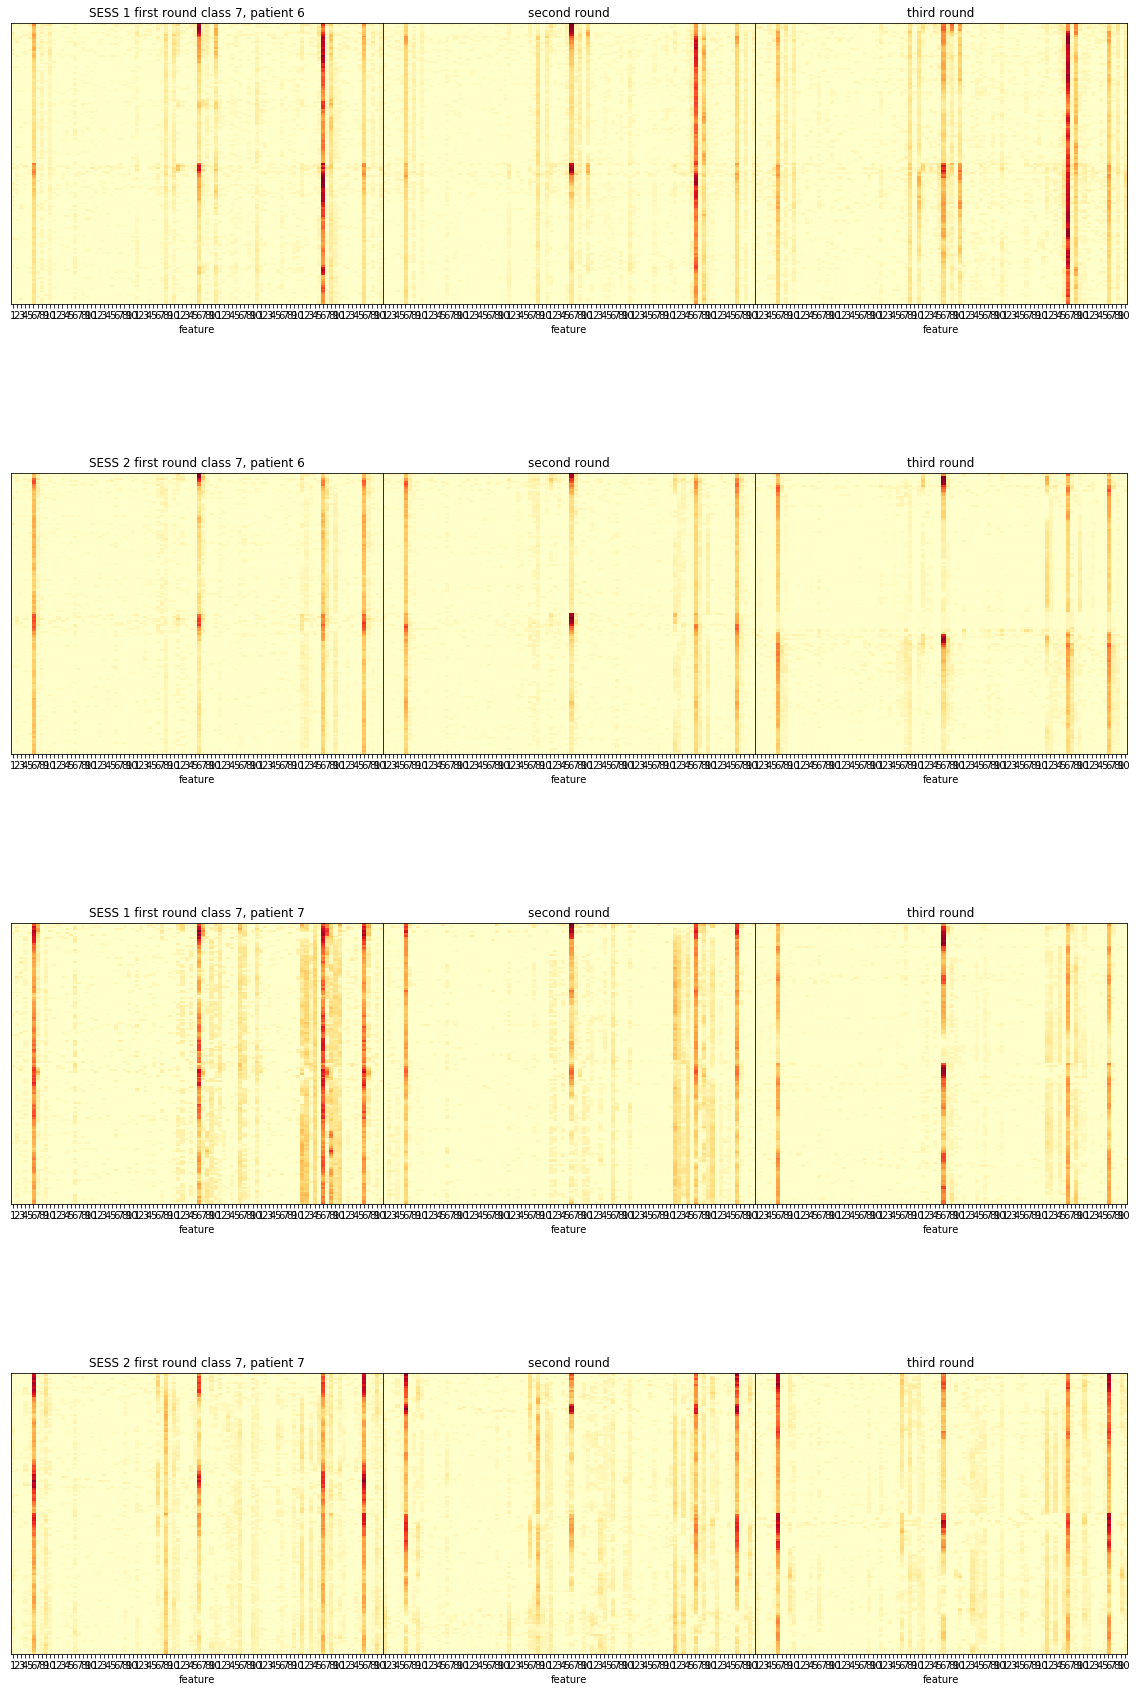

In [157]:
heigth=4;
width=3;
f, axes = plt.subplots(heigth, width,figsize=(20, 30))
f.subplots_adjust(hspace=0.6, wspace=0)
#i=0 #class

for i in range(8):
    for patient in range(2):

        value=(shap_values_LDA_ordered[patient+6][i][indexes[patient+6][i]:indexes[patient+6][i+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2,0].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2,0].set(xlabel='feature')
        axes[patient*2,0].set(title="SESS 1 first round class {}, patient {}".format(i, patient+6))
        axes[patient*2,0].set_xticks(list(range(0,num_features)))
        axes[patient*2,0].set_yticks([])
        axes[patient*2,0].set_xticklabels(channel)

        value=(shap_values_LDA_ordered[patient+6][i][indexes[patient+6][i+8]:indexes[patient+6][i+8+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2,1].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2,1].set(xlabel='feature')
        axes[patient*2,1].set(title="second round")
        axes[patient*2,1].set_xticks(list(range(0,num_features)))
        axes[patient*2,1].set_yticks([])
        axes[patient*2,1].set_xticklabels(channel)

        value=(shap_values_LDA_ordered[patient+6][i][indexes[patient+6][i+16]:indexes[patient+6][i+16+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2,2].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2,2].set(xlabel='feature')
        axes[patient*2,2].set(title="third round")
        axes[patient*2,2].set_xticks(list(range(0,num_features)))
        axes[patient*2,2].set_yticks([])
        axes[patient*2,2].set_xticklabels(channel)

        value=(shap_values_LDA_sess_2[patient][i][indexes_sess_2[patient][i]:indexes_sess_2[patient][i+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2+1,0].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2+1,0].set(xlabel='feature')
        axes[patient*2+1,0].set(title="SESS 2 first round class {}, patient {}".format(i, patient+6))
        axes[patient*2+1,0].set_xticks(list(range(0,num_features)))
        axes[patient*2+1,0].set_yticks([])
        axes[patient*2+1,0].set_xticklabels(channel)

        value=(shap_values_LDA_sess_2[patient][i][indexes_sess_2[patient][i+8]:indexes_sess_2[patient][i+8+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2+1,1].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2+1,1].set(xlabel='feature')
        axes[patient*2+1,1].set(title="second round")
        axes[patient*2+1,1].set_xticks(list(range(0,num_features)))
        axes[patient*2+1,1].set_yticks([])
        axes[patient*2+1,1].set_xticklabels(channel)

        value=(shap_values_LDA_sess_2[patient][i][indexes_sess_2[patient][i+16]:indexes_sess_2[patient][i+16+1]].abs())
        maximum=(value.max()).max()
        axes[patient*2+1,2].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient*2+1,2].set(xlabel='feature')
        axes[patient*2+1,2].set(title="third round")
        axes[patient*2+1,2].set_xticks(list(range(0,num_features)))
        axes[patient*2+1,2].set_yticks([])
        axes[patient*2+1,2].set_xticklabels(channel)
    plt.savefig(root_path+"/resources/results_ordered/SHAP_matrices/class_{}_LDA_ordered_sess12.svg".format(i))

In [181]:
#i=0 #class
from scipy import stats
p_val_tot=[]
for patient in range(2):
    for i in range(8):


        p_val1=[]
        p_val2=[]
        p_val3=[]
        value_r1=(shap_values_LDA_ordered[patient][i][indexes[patient+6][i]:indexes[patient+6][i+1]].abs())

        value_r2=(shap_values_LDA_ordered[patient][i][indexes[patient+6][i+8]:indexes[patient+6][i+8+1]].abs())

        value_r3=(shap_values_LDA_ordered[patient][i][indexes[patient+6][i+16]:indexes[patient+6][i+16+1]].abs())
        
        value_sess2_r1=shap_values_LDA_sess_2[patient][i][indexes_sess_2[patient][i]:indexes_sess_2[patient][i+1]].abs()

        value_sess2_r2=shap_values_LDA_sess_2[patient][i][indexes_sess_2[patient][i+8]:indexes_sess_2[patient][i+8+1]].abs()

        value_sess2_r3=shap_values_LDA_sess_2[patient][i][indexes_sess_2[patient][i+16]:indexes_sess_2[patient][i+16+1]].abs()
  
        min_val=min(len(value_r1), len(value_r2), len(value_r3), len(value_sess2_r1), len(value_sess2_r2), len(value_sess2_r3))
        
        print(np.mean(stats.f_oneway(value_r1.iloc[:min_val], value_r2.iloc[:min_val], value_r3.iloc[:min_val], value_sess2_r1.iloc[:min_val], value_sess2_r2.iloc[:min_val], value_sess2_r3.iloc[:min_val])[1]))
        print(np.mean(stats.f_oneway(value_r1.iloc[:min_val], value_r2.iloc[:min_val], value_r3.iloc[:min_val])[1]))
    
        #print("p value mean PATIENT {},  class {}: {}  var {}, dev {}".format(patient, i, np.mean(p_val1), np.mean(p_val2), np.mean(p_val3)))

#print(np.mean(p_val_tot))
        
       

0.03744614077291067
0.151662427117491
0.011205253061544558
0.17822827581476217
0.005550039070462014
0.10550649307741305
0.06386899601281147
0.10246189869370628
0.03725694595716533
0.17285628473096984
0.00047498714621039417
0.0354078256893902
0.0008819186528077141
0.0636560644732028
0.04743686540899716
0.13438413388900314
0.00013587411732442426
0.00537771872114764
0.006832757980195535
0.22391614412962096
0.0499032379248157
0.10358357149439236
0.03413611564870803
0.14821013961775217
0.0023935789282137406
0.10721594090355456
0.007582656256560559
0.051250418463113435
0.0059569230760238515
0.1211861812768353
0.0382599913008153
0.11412672865425125


In [ ]:
min_val=min(len(value_r1), len(value_r2), len(value_r3), len(value_sess2_r1), len(value_sess2_r2), len(value_sess2_r3))
for feature in range(value_r1.shape[1]):
    print(feature)
    print(stats.f_oneway(value_r1.iloc[:min_val,feature], value_r2.iloc[:min_val,feature], value_r3.iloc[:min_val,feature])[1])
    #print(len(stats.f_oneway(value_r1.iloc[:min_val,feature], value_r2.iloc[:min_val,feature], value_r3.iloc[:min_val,feature])[1]))
    print(stats.ttest_rel(value_r1.iloc[:min_val,feature], value_r2.iloc[:min_val,feature])[1])
    print(stats.ttest_rel(value_r2.iloc[:min_val,feature], value_r3.iloc[:min_val,feature])[1])
    print(stats.ttest_rel(value_r1.iloc[:min_val,feature], value_r3.iloc[:min_val,feature])[1])

In [182]:
patient=0
i=7
value_r1=(shap_values_LDA_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs())

value_r2=(shap_values_LDA_ordered[patient][i][indexes[patient][i+8]:indexes[patient][i+8+1]].abs())

value_r3=(shap_values_LDA_ordered[patient][i][indexes[patient][i+16]:indexes[patient][i+16+1]].abs())
np.mean(stats.f_oneway(value_r1, value_r2, value_r3)[1])

0.14516915981238873

In [167]:
min_val=min(len(value_r1), len(value_r2))
stats.ttest_rel(value_r1.iloc[:min_val], value_r2.iloc[:min_val])
np.mean(stats.ttest_rel(value_r1.iloc[:min_val], value_r2.iloc[:min_val])[1])

0.3061490272494145

# SVM

In [7]:
#file_path = root_path+ "resources/class_{}_XRT_ordered.svg".format(i).pkl"
#with open(file_path, 'rb') as f:
#    shap_values_LDA_ordered = pickle.load(f)

shap_values_SVM_ordered=[]

for patient in range(num_pat):
    file_path = root_path+'resources/results_ordered/SHAP_no_correlated_features/SHAP_SVM_{}.pkl'.format(patient)
    with open(file_path, 'rb') as f:
        shap_values = pickle.load(f)
    shap_values_SVM_ordered.append(shap_values)
feature=shap_values_SVM_ordered[0][0].columns.values.copy()
channel=shap_values_SVM_ordered[0][0].columns.values.copy()
for index in range(len(feature)):
    feature[index]=''.join([i for i in feature[index] if not i.isdigit()])
    channel[index]=''.join([i for i in channel[index] if i.isdigit()])
print(feature)
print(channel)
num_features=len(feature)

['ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'SSC' 'SSC' 'SSC' 'SSC'
 'SSC' 'SSC' 'SSC' 'SSC' 'SSC' 'SSC' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M'
 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C'
 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS'
 'RMS' 'RMS' 'RMS' 'RMS']
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '1' '2' '3' '4' '5' '6' '7' '8'
 '9' '10' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '1' '2' '3' '4' '5' '6'
 '7' '8' '9' '10' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10']


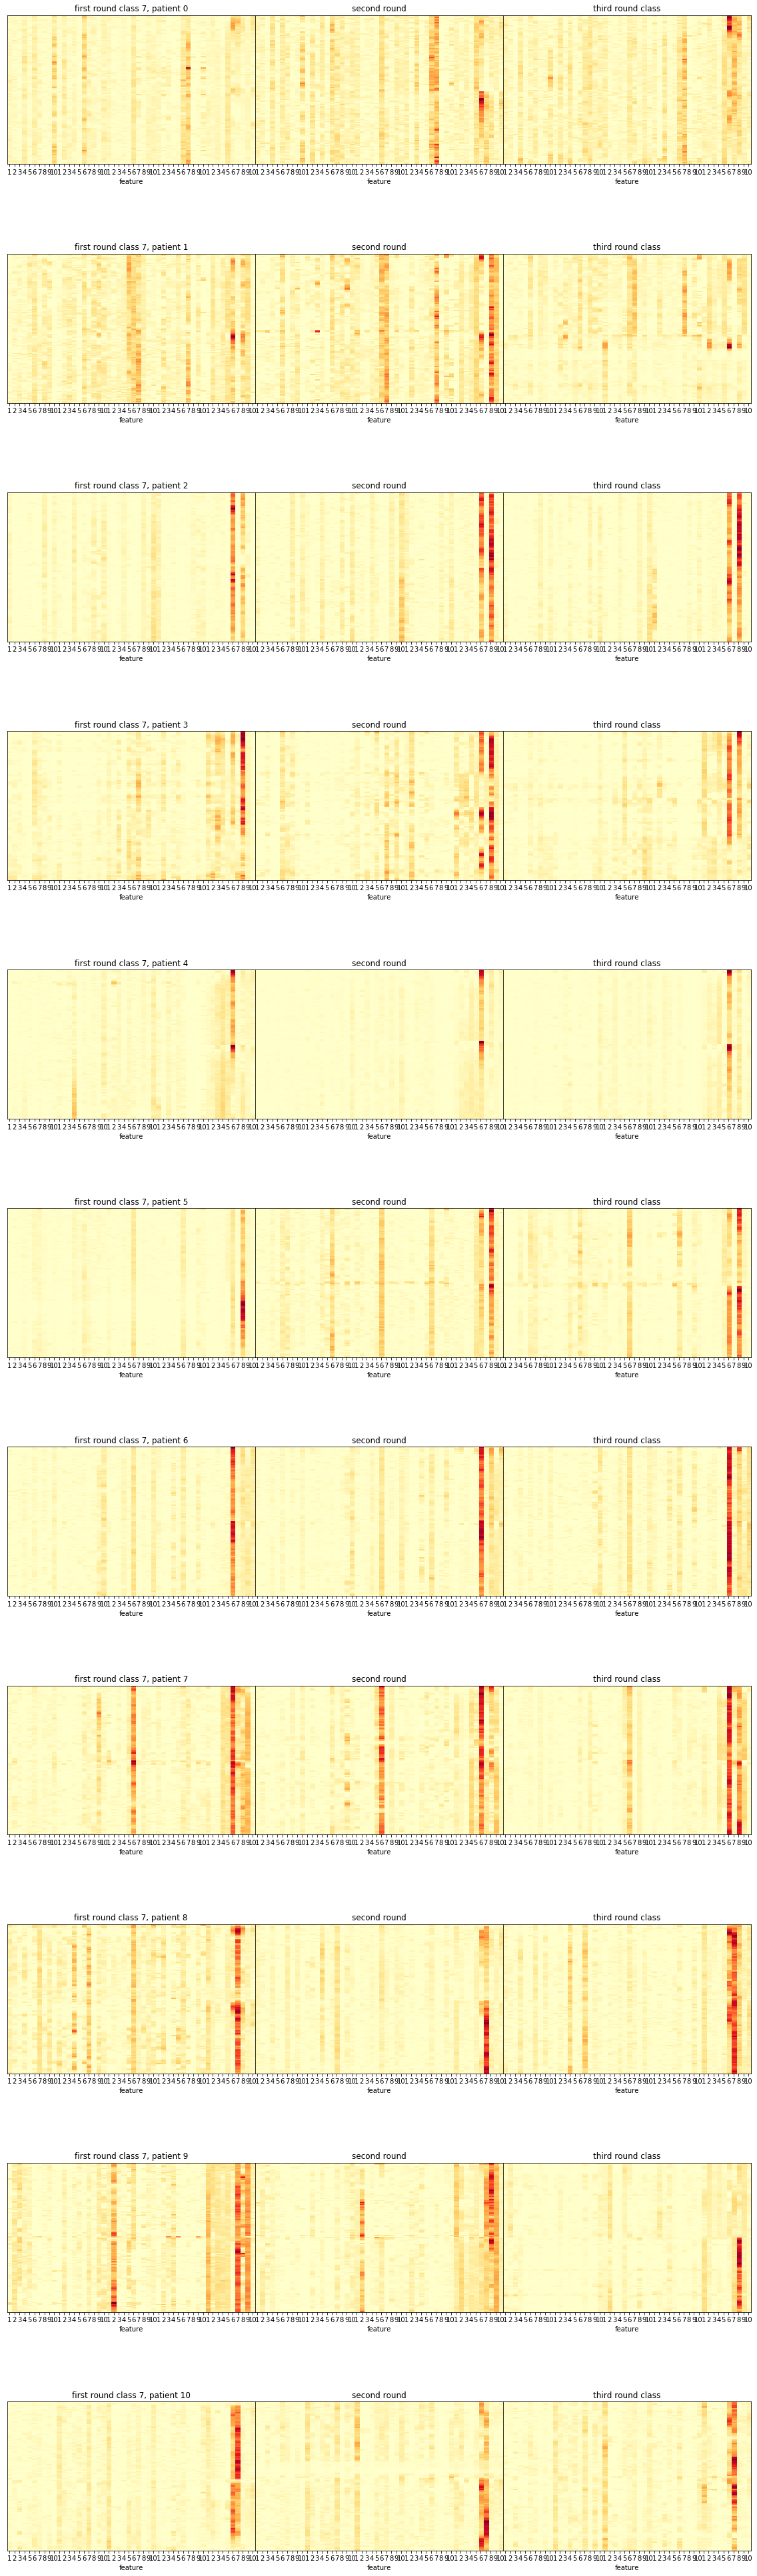

In [22]:
#patient=0
heigth=11;
width=3;
f, axes = plt.subplots(heigth, width,figsize=(20, 70))
f.subplots_adjust(hspace=0.6, wspace=0)
i=0#class
for i in range (8):
    for patient in range(11):

        value=(shap_values_SVM_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs())
        maximum=(value.max()).max()
        axes[patient,0].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient,0].set(xlabel='feature')
        axes[patient,0].set(title="first round class {}, patient {}".format(i, patient))
        axes[patient,0].set_xticks(list(range(0,num_features)))
        axes[patient,0].set_yticks([])
        axes[patient,0].set_xticklabels(channel)

        value=(shap_values_SVM_ordered[patient][i][indexes[patient][i+8]:indexes[patient][i+8+1]].abs())
        maximum=(value.max()).max()
        axes[patient,1].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient,1].set(xlabel='feature')
        axes[patient,1].set(title="second round")
        axes[patient,1].set_xticks(list(range(0,num_features)))
        axes[patient,1].set_yticks([])
        axes[patient,1].set_xticklabels(channel)

        value=(shap_values_SVM_ordered[patient][i][indexes[patient][i+16]:indexes[patient][i+16+1]].abs())
        maximum=(value.max()).max()
        axes[patient,2].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
        axes[patient,2].set(xlabel='feature')
        axes[patient,2].set(title="third round class")
        axes[patient,2].set_xticks(list(range(0,num_features)))
        axes[patient,2].set_yticks([])
        axes[patient,2].set_xticklabels(channel)

    plt.savefig(root_path+"resources/results_ordered/SHAP_matrices/class_{}_SVM_ordered_NOCORR.svg".format(i))

    

In [82]:
from scipy import stats
i=0
print("Statistical test comparing Round of the same patient averaged over time")
for i in range(8):
    for patient in range(11):

        value_r1=np.mean((shap_values_SVM_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs()), axis=0)

        value_r2=np.mean((shap_values_SVM_ordered[patient][i][indexes[patient][i+8]:indexes[patient][i+8+1]].abs()), axis=0)

        value_r3=np.mean((shap_values_SVM_ordered[patient][i][indexes[patient][i+16]:indexes[patient][i+16+1]].abs()), axis=0)

        p_val=stats.f_oneway(value_r1, value_r2, value_r3)
        p_val12=stats.ttest_rel(value_r1, value_r2)
        p_val23=stats.ttest_rel(value_r2, value_r3)
        p_val13=stats.ttest_rel(value_r1, value_r3)
        print("class:{}, Patient:{}, pval 1-2:{},pval 2-3:{}, pval 1-3:{} ".format(i, patient,p_val12[1], p_val23[1], p_val13[1]))

Statistical test comparing Round of the same patient averaged over time
class:0, Patient:0, pval 1-2:0.6001923554912478,pval 2-3:0.9159148726257318, pval 1-3:0.686270274978544 
class:0, Patient:1, pval 1-2:0.7869207039378463,pval 2-3:0.4886731705615397, pval 1-3:0.6592006645834838 
class:0, Patient:2, pval 1-2:0.7165670151066352,pval 2-3:0.9992634932296783, pval 1-3:0.8065674904875683 
class:0, Patient:3, pval 1-2:0.9587462042486751,pval 2-3:0.8783329296639565, pval 1-3:0.9595276750158068 
class:0, Patient:4, pval 1-2:0.4200099783085385,pval 2-3:0.35282939027518867, pval 1-3:0.9370872404854054 
class:0, Patient:5, pval 1-2:0.390288140128192,pval 2-3:0.5692425905269421, pval 1-3:0.3881162850891843 
class:0, Patient:6, pval 1-2:0.0004383927206245197,pval 2-3:0.47083549649599765, pval 1-3:0.10757918159316983 
class:0, Patient:7, pval 1-2:0.2104910974819649,pval 2-3:0.24943591845741073, pval 1-3:0.5411305586508599 
class:0, Patient:8, pval 1-2:0.6349712378967376,pval 2-3:0.7786546633983344

class:7, Patient:10, pval 1-2:0.282850935992205,pval 2-3:0.8966756701577923, pval 1-3:0.42759228612353917 


qui sotto:
per ogni classe prendiamo ogni paziente separando i round

in ogni round calcoliamo p value fra la distribuzione di ogni faeture separtamente nei 3 diversi round:
e.g. RMS7 in round 1 vs RMS in round 2 vs RMS in round 3

così per ogni feature, per vedere che le distribusioni non siano significativamente differenti
a quel punto lo facciamo per ogni paziente e mediamo

risultato: guardare per ogni classe quando sono diversi i risultati dipendenti per round
tutti UGUALI


In [ ]:
from scipy import stats
i=0
print("Statistical test comparing Round of the same patient averaged over time")
for i in range(8):
    p_val=[]
    for patient in range(11):
        
        value_r1=(shap_values_SVM_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs())

        value_r2=(shap_values_SVM_ordered[patient][i][indexes[patient][i+8]:indexes[patient][i+8+1]].abs())

        value_r3=(shap_values_SVM_ordered[patient][i][indexes[patient][i+16]:indexes[patient][i+16+1]].abs())
        min_val=min(len(value_r1), len(value_r2), len(value_r3))
        for feature in range(value_r1.shape[1]):
            p_val12=stats.ttest_rel(value_r1.iloc[:min_val,feature], value_r2.iloc[:min_val,feature])
            p_val.append(p_val12[1])
            p_val23=stats.ttest_rel(value_r2.iloc[:min_val,feature], value_r3.iloc[:min_val,feature])
            p_val.append(p_val23[1])
            p_val13=stats.ttest_rel(value_r1.iloc[:min_val,feature], value_r3.iloc[:min_val,feature])
            p_val.append(p_val13[1])
    
    print("p value mean class {}:{} ".format(i, (np.sum(p_val))/len(p_val)))

qui sotto:
per ogni classe prendiamo ogni paziente separando i round

in ogni round calcoliamo p value fra la distribuzione di ogni faeture separtamente nei 3 diversi round:
e.g. RMS7 in round 1 vs RMS in round 2 vs RMS in round 3

così per ogni feature, per vedere che le distribusioni non siano significativamente differenti
a quel punto lo facciamo per ogni paziente 

risultato: guardare per ogni classe, per ogni PAZIENTE quando sono diversi i risultati dipendenti per round
tutti UGUALI

In [29]:
print("Statistical test comparing Round of the same patient averaged over time")
for i in range(8):
    
    for patient in range(11):
        p_val=[]
        value_r1=(shap_values_SVM_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs())

        value_r2=(shap_values_SVM_ordered[patient][i][indexes[patient][i+8]:indexes[patient][i+8+1]].abs())

        value_r3=(shap_values_SVM_ordered[patient][i][indexes[patient][i+16]:indexes[patient][i+16+1]].abs())
        min_val=min(len(value_r1), len(value_r2), len(value_r3))
        for feature in range(value_r1.shape[1]):
            p_val12=stats.ttest_rel(value_r1.iloc[:min_val,feature], value_r2.iloc[:min_val,feature])
            p_val.append(p_val12[1])
            p_val23=stats.ttest_rel(value_r2.iloc[:min_val,feature], value_r3.iloc[:min_val,feature])
            p_val.append(p_val23[1])
            p_val13=stats.ttest_rel(value_r1.iloc[:min_val,feature], value_r3.iloc[:min_val,feature])
            p_val.append(p_val13[1])
    
        print("p value mean class {}, PATIENT {}:{} ".format(i, patient, (np.sum(p_val))/len(p_val)))

Statistical test comparing Round of the same patient averaged over time
p value mean class 0, PATIENT 0:0.12118206851197194 
p value mean class 0, PATIENT 1:0.08906460130168886 
p value mean class 0, PATIENT 2:0.11010106732184202 
p value mean class 0, PATIENT 3:0.14078194913362668 
p value mean class 0, PATIENT 4:0.1061432597905939 
p value mean class 0, PATIENT 5:0.12523688571128777 
p value mean class 0, PATIENT 6:0.08865747173866408 
p value mean class 0, PATIENT 7:0.07596720329078131 
p value mean class 0, PATIENT 8:0.07153670490456536 
p value mean class 0, PATIENT 9:0.08464050910884964 
p value mean class 0, PATIENT 10:0.12088635033244742 
p value mean class 1, PATIENT 0:0.18023892459594126 
p value mean class 1, PATIENT 1:0.15810926059990238 
p value mean class 1, PATIENT 2:0.22380363109284748 
p value mean class 1, PATIENT 3:0.18662804350055368 
p value mean class 1, PATIENT 4:0.14104839092772523 
p value mean class 1, PATIENT 5:0.2817825297943372 
p value mean class 1, PATIEN

In [34]:
#i=0 #class
from scipy import stats
print("result intersessio  patient 6 and 7")
for patient in range(2):
    
    for i in range(8):
        p_val=[]
        value_sess1_r1=(shap_values_LDA_ordered[patient+6][i][indexes[patient+6][i]:indexes[patient+6][i+1]].abs())

        value_sess1_r2=(shap_values_LDA_ordered[patient+6][i][indexes[patient+6][i+8]:indexes[patient+6][i+8+1]].abs())

        value_sess1_r3=(shap_values_LDA_ordered[patient+6][i][indexes[patient+6][i+16]:indexes[patient+6][i+16+1]].abs())

        value_sess2_r1=(shap_values_LDA_sess_2[patient][i][indexes_sess_2[patient][i]:indexes_sess_2[patient][i+1]].abs())

        value_sess2_r2=(shap_values_LDA_sess_2[patient][i][indexes_sess_2[patient][i+8]:indexes_sess_2[patient][i+8+1]].abs())

        value_sess2_r3=(shap_values_LDA_sess_2[patient][i][indexes_sess_2[patient][i+16]:indexes_sess_2[patient][i+16+1]].abs())
        
        min_val=min(len(value_sess1_r1), len(value_sess1_r2), len(value_sess1_r3), len(value_sess2_r1), len(value_sess2_r2), len(value_sess2_r3))
        for feature in range(value_r1.shape[1]):
            p_val1=stats.ttest_rel(value_sess1_r1.iloc[:min_val,feature], value_sess2_r1.iloc[:min_val,feature])
            p_val.append(p_val1[1])
            p_val2=stats.ttest_rel(value_sess1_r2.iloc[:min_val,feature], value_sess2_r2.iloc[:min_val,feature])
            p_val.append(p_val2[1])
            p_val3=stats.ttest_rel(value_sess1_r3.iloc[:min_val,feature], value_sess2_r3.iloc[:min_val,feature])
            p_val.append(p_val3[1])
    
        
        print("p value mean class {}, PATIENT {}:{} ".format(i, patient+6, (np.sum(p_val))/len(p_val)))
    

result intersessio  patient 6 and 7
p value mean class 0, PATIENT 6:0.14101768343100948 
p value mean class 1, PATIENT 6:0.2098653407799538 
p value mean class 2, PATIENT 6:0.11610695840302007 
p value mean class 3, PATIENT 6:0.21368673078357744 
p value mean class 4, PATIENT 6:0.12349905754868175 
p value mean class 5, PATIENT 6:0.0678346765939698 
p value mean class 6, PATIENT 6:0.07468969096141954 
p value mean class 7, PATIENT 6:0.2069006783507777 
p value mean class 0, PATIENT 7:0.161529798269881 
p value mean class 1, PATIENT 7:0.1085776844599108 
p value mean class 2, PATIENT 7:0.14485533216350444 
p value mean class 3, PATIENT 7:0.15301494195589582 
p value mean class 4, PATIENT 7:0.08110370351020589 
p value mean class 5, PATIENT 7:0.11100815937139966 
p value mean class 6, PATIENT 7:0.10791184217284462 
p value mean class 7, PATIENT 7:0.16805140927143625 


In [23]:
value_r1=(shap_values_SVM_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs())
len(value_r2)
min_val=min(len(value_r1), len(value_r2), len(value_r3))
min_val
#  print("class:{}, Patient:{}, pval 1-2:{},pval 2-3:{}, pval 1-3:{} ".format(i, patient,p_val12[1], p_val23[1], p_val13[1]))

130

In [61]:


for patient in range(11):
    for i in range(8):
        
        value_r1=(shap_values_SVM_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs())
        
        tmp=list(value_r1.iloc[time,:] for time in range(len(value_r1)))
        stat,p_val_r1=stats.f_oneway(*tmp)
        
        value_r2=(shap_values_SVM_ordered[patient][i][indexes[patient][i+8]:indexes[patient][i+8+1]].abs())
        tmp=list(value_r2.iloc[time,:] for time in range(len(value_r2)))
        stat,p_val_r2=stats.f_oneway(*tmp)
        
        value_r3=(shap_values_SVM_ordered[patient][i][indexes[patient][i+16]:indexes[patient][i+16+1]].abs())
        tmp=list(value_r3.iloc[time,:] for time in range(len(value_r3)))
        stat,p_val_r3=stats.f_oneway(*tmp)
        
        print("Patient:{}, class:{} statistical test r1: {}, r2: {} r3: {}".format(patient, i,p_val_r1, p_val_r2, p_val_r3))

Patient:0, class:0 statistical test r1: 0.9999999997523557, r2: 0.9999999999999999 r3: 0.9999999999999999
Patient:0, class:1 statistical test r1: 0.9999999999999999, r2: 0.9999999999999999 r3: 0.9999999999999999
Patient:0, class:2 statistical test r1: 0.9999999691513477, r2: 0.9429915703801967 r3: 0.9999999999999999
Patient:0, class:3 statistical test r1: 0.9999999999999999, r2: 0.9999996208485044 r3: 0.9999999999999999
Patient:0, class:4 statistical test r1: 0.9999999999999999, r2: 0.9999999999999999 r3: 0.9999948306724475
Patient:0, class:5 statistical test r1: 0.9999999999999999, r2: 0.9999999999999999 r3: 0.05985712361059822
Patient:0, class:6 statistical test r1: 4.165552895131448e-59, r2: 9.991095345496034e-11 r3: 1.103770893133803e-10
Patient:0, class:7 statistical test r1: 0.9999999999999999, r2: 0.9999999999999999 r3: 0.9999999999999999
Patient:1, class:0 statistical test r1: 0.9809607682793581, r2: 0.9999999999999999 r3: 0.9999999999999999
Patient:1, class:1 statistical test 

Patient:9, class:5 statistical test r1: 0.9999999999999999, r2: 0.9999999999999999 r3: 0.9999999999999999
Patient:9, class:6 statistical test r1: 0.9999999999999999, r2: 0.9994410164800929 r3: 0.9999999999999999
Patient:9, class:7 statistical test r1: 0.9999999999999999, r2: 0.9999999999999999 r3: 0.9999999999999999
Patient:10, class:0 statistical test r1: 1.1046847611026127e-07, r2: 0.0206415914510351 r3: 0.9999999999999999
Patient:10, class:1 statistical test r1: 0.9999990849471734, r2: 0.9999999999999999 r3: 0.9999999999999999
Patient:10, class:2 statistical test r1: 0.9999999999999999, r2: 0.9999766928883379 r3: 0.9992693567581812
Patient:10, class:3 statistical test r1: 0.9999999930302615, r2: 0.9999999999989804 r3: 0.05842725239946055
Patient:10, class:4 statistical test r1: 0.9999999999999999, r2: 0.9982458712399488 r3: 0.9998163378284586
Patient:10, class:5 statistical test r1: 0.9999999959081489, r2: 0.9999999980837992 r3: 0.9999233369049615
Patient:10, class:6 statistical tes

In [88]:
for i in range(8):
        
        value_r1=(shap_values_SVM_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs())
        print(value_r1)

          ZC1       ZC2       ZC3       ZC4       ZC5       ZC6       ZC7  \
0    0.000000  0.000000  0.016839  0.040018  0.064558  0.000000  0.014374   
1    0.000000  0.000000  0.020266  0.035747  0.059597  0.000000  0.006633   
2    0.000000  0.000000  0.007274  0.032227  0.045107  0.000000  0.012231   
3    0.000500  0.005931  0.005465  0.025857  0.039175  0.000000  0.003589   
4    0.009140  0.000000  0.005817  0.037121  0.028663  0.000000  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
141  0.008330  0.001239  0.008219  0.019255  0.008415  0.000000  0.000000   
142  0.000000  0.005453  0.007094  0.018373  0.000000  0.000000  0.000000   
143  0.003404  0.003850  0.000000  0.017909  0.000000  0.000000  0.000000   
144  0.011402  0.002040  0.000000  0.038661  0.000000  0.014798  0.000000   
145  0.005225  0.031654  0.017612  0.022762  0.000000  0.000000  0.000000   

          ZC8       ZC9      ZC10  ...      RMS1      RMS2      RMS3  \
0  

          ZC1       ZC2       ZC3       ZC4       ZC5       ZC6       ZC7  \
790  0.004113  0.000000  0.005091  0.000000  0.014382  0.002692  0.000000   
791  0.003500  0.007167  0.000000  0.013152  0.015010  0.003416  0.000000   
792  0.004388  0.001965  0.004185  0.017054  0.013126  0.008709  0.000000   
793  0.000000  0.002353  0.004965  0.004772  0.008162  0.007625  0.000000   
794  0.000000  0.000000  0.005320  0.015092  0.006531  0.004032  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
931  0.000000  0.011852  0.008817  0.011853  0.000000  0.019952  0.004011   
932  0.000000  0.008954  0.009056  0.000000  0.000000  0.008281  0.001808   
933  0.000000  0.006214  0.012544  0.000000  0.000000  0.015192  0.000869   
934  0.000000  0.000988  0.006863  0.000000  0.000000  0.000000  0.000000   
935  0.000000  0.011310  0.011933  0.003099  0.003387  0.003975  0.000000   

          ZC8       ZC9      ZC10  ...      RMS1      RMS2      RMS3  \
790

In [ ]:
i=0
value_r1=(shap_values_LDA_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs())

value_r1.shape

In [74]:
np.asarray(list_value)

array([[0.00259123, 0.01029112, 0.000634  , ..., 0.00628866, 0.00727786,
        0.00159056],
       [0.00736749, 0.01171938, 0.00171727, ..., 0.01070995, 0.00639761,
        0.00043427],
       [0.0086435 , 0.01512188, 0.00100995, ..., 0.00586022, 0.00784358,
        0.00206334],
       ...,
       [0.0161547 , 0.01095046, 0.00107912, ..., 0.03622787, 0.00699918,
        0.0286639 ],
       [0.01576517, 0.00821319, 0.00084711, ..., 0.03640982, 0.009129  ,
        0.02319659],
       [0.01744208, 0.00996856, 0.00061561, ..., 0.03791134, 0.00740897,
        0.01924522]])

In [ ]:
from scipy.stats import friedmanchisquare
list_value=[]
for instance in range(value_r1.shape[0]):
    list_value.append(pd.array(value_r1.iloc[instance,:]))
    friedmanchisquare(*(list_value))
len(list_value[1])

FriedmanchisquareResult(statistic=295.2069773412248, pvalue=2.5826275026877744e-12)

In [10]:
from statsmodels.stats.anova import AnovaRM

#perform the repeated measures ANOVA
print(AnovaRM(data=final_dataframe, depvar='value', subject='feature', within=['index']).fit())


                 Anova
      F Value  Num DF    Den DF  Pr > F
---------------------------------------
index  3.2599 145.0000 7105.0000 0.0000

